In [7]:
%load_ext autoreload
%autoreload 2

# add src to sys-path
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('./src')
from matplotlib.pyplot import figure
from geopy.distance import geodesic
from sklearn.decomposition import PCA

from data_processing.mtb_data_provider import MtbDataProvider
from data_processing.mtb_data_tagger import MtbDataTagger
from data_processing.mtb_classifier import MtbClassifier
from visualization.mtb_visualizer import MtbVisualizer
from data_processing.helpers import Helpers

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, SpectralClustering, MeanShift, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import geopandas as gpd
from geopandas import GeoDataFrame
from sklearn.utils import shuffle

from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(42)
seed(42)
np.random.seed(42)

SPEED_THRESHOLD = .3
LATITUDE_KEY = 'position_lat'
LONGITUDE_KEY = 'position_long'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
df = pd.read_csv('data/warngau_s2_labels_2.csv')

lats = df['latitude'].values
lons = df['longitude'].values

data = []
last_coordinates = (0,0)
for value_set in df.values:
    coordinates = (value_set[0], value_set[1])
    # Join the labels to one string
    new_value_set = np.hstack([value_set[:2], '-'.join(value_set[2:5]), value_set[-1]])
    
    # When changing labels, the app writes each change. Just take the latest label for one position in this case
    if coordinates == last_coordinates:
        data[-1] = new_value_set
    else:
        data.append(new_value_set)
        last_coordinates = coordinates
        

le = preprocessing.LabelEncoder()
data = np.array(data)
encoded_labels = le.fit_transform(data[:, 2])

labels, counts = np.unique(data[:, 2], return_counts=True)
counts > 3
labels = labels[counts>=5]
#data = data[data[:, 2] in labels]
#for d in data[:, 2] if d in labels
#len(data)
list(filter(lambda dic: dic[2] in labels, data))
    


[array([47.830058, 11.7437588, 'steepness1-roughness1-technical1', 12.198],
       dtype=object),
 array([47.8298553, 11.7456847, 'steepness1-roughness1-technical1', 7.504],
       dtype=object),
 array([47.8298525, 11.745677800000001, 'steepness2-roughness2-technical1',
        9.725], dtype=object),
 array([47.8298672, 11.7456774, 'steepness2-roughness2-technical2', 17.662],
       dtype=object),
 array([47.829806299999994, 11.745672599999999,
        'steepness2-roughness2-technical2', 12.665999999999999],
       dtype=object),
 array([47.82979520000001, 11.7456636, 'steepness2-roughness1-technical1',
        12.796], dtype=object),
 array([47.829751200000004, 11.7456246, 'steepness2-roughness1-technical1',
        18.676], dtype=object),
 array([47.82973079999999, 11.7455615, 'steepness2-roughness2-technical1',
        20.165], dtype=object),
 array([47.8297317, 11.7455082, 'steepness2-roughness2-technical1', 24.37],
       dtype=object),
 array([47.8297317, 11.7454041, 'steepness2

In [9]:
mtb_data_provider = MtbDataProvider()
mtb_data_tagger = MtbDataTagger()
mtb_visualizer = MtbVisualizer()
mtb_classifier = MtbClassifier()

## Data Export

In [38]:
warngau_files=['warngaus2_1', 'warngaus2_2']#'warngaus1_1', 'warngaus1_2', 'warngaus1_3', 
location_based_label_files=['warngau_s2_labels_2', 'warngau_s2_labels_2']
columns = ['SensorAccelerationX_HD', 'SensorAccelerationY_HD', 'SensorAccelerationZ_HD','altitude', 'speed', 'heart_rate', 'SensorHeading', LATITUDE_KEY, LONGITUDE_KEY]
window_lengths = [50, 150, 300]
sub_sample_lengths = [25, 75, 150]
nums_clusters = [3, 4, 6, 9]
prefix='warngau_s2'

In [ ]:
if False:
    mtb_data_provider.prepare_and_save_samples(
        warngau_files, 
        columns, 
        location_based_label_files=location_based_label_files, 
        prefix='warngau_s2', 
        window_lengths=window_lengths, 
        sub_sample_lengths=sub_sample_lengths, 
        force_overwrite=True,
        auto_padd_left_right=True,
        min_cluster_size=3)

## FI Clustering

----------------------------------------------------------------
window_length: 50
sub_sample_length: 25
clusters: 3
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([130,  61,  64,  58,  38,  43,  30, 132,  22,  46,  20,  16,  76]))


<Figure size 1200x400 with 0 Axes>

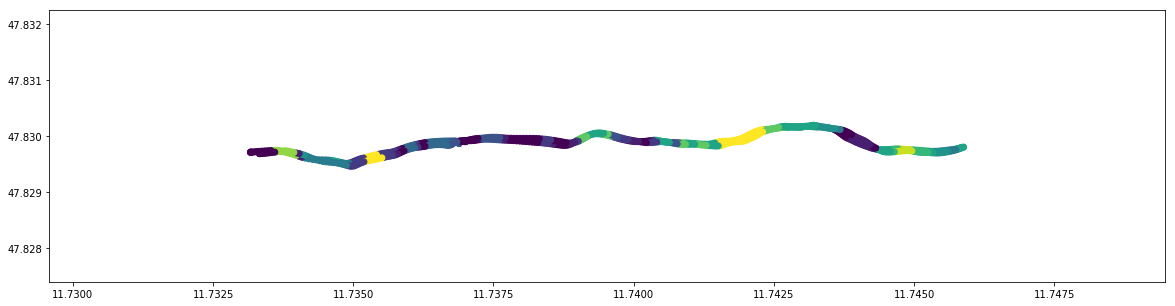


---- Cael2 ----
Filters: [ 32  64 128  15]
Input Shape: (52, 6)
(736, 52, 6) data.shape


Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
_________________________________________________________________
flatten_62 (Flatten)         (None, 768)               0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                11535     
_________________________________________________________________
embedding (Lambda)           (None, 15)                0         
____________________________

23/23 [==============================] - 0s 10ms/step - loss: 0.7014
Epoch 177/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7014
Epoch 178/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7012
Epoch 179/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7011
Epoch 180/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7010
Epoch 181/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7010
Epoch 182/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7009
Epoch 183/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7010
Epoch 184/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7009
Epoch 185/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7010
Epoch 186/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7010
Epoch 187/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7011
Epoch 188/500
23/2

23/23 [==============================] - 0s 10ms/step - loss: 0.6955
Epoch 373/500
23/23 [==============================] - 0s 12ms/step - loss: 0.6953
Epoch 374/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6952
Epoch 375/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6951
Epoch 376/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6949
Epoch 377/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6948
Epoch 378/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6949
Epoch 379/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6948
Epoch 380/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6948
Epoch 381/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6948
Epoch 382/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6948
Epoch 383/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6948
Epoch 384/500
23/2

<Figure size 1200x400 with 0 Axes>

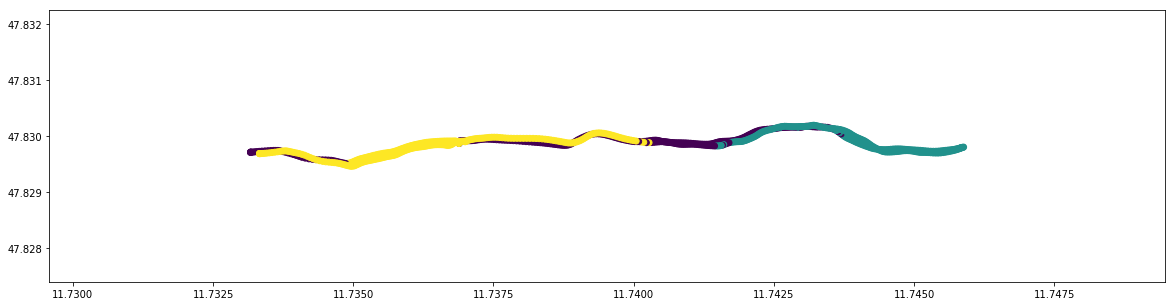

[['score_name', 'score_result'], ['adjusted_rand_score', 0.06551238443706535], ['adjusted_mutual_info_score', 0.16116281510072708], ['homogeneity_score', 0.12347708981202335], ['completeness_score', 0.26878782570236215], ['v_measure_score', 0.16921798092040635], ['fowlkes_mallows_score', 0.25412520295187546], ['silhouette_score', 0.10084822563749044], ['davies_bouldin_score', 2.5204531078244323], ['calinski_harabasz_score', 89.59340789216677]]

---- Cael2fi ----
Filters: [32, 64, 128]
Input Shape: (736, 15)
(736, 52, 6) data.shape


Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128

23/23 [==============================] - 0s 11ms/step - loss: 0.7050
Epoch 172/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7052
Epoch 173/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7051
Epoch 174/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7050
Epoch 175/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7051
Epoch 176/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7051
Epoch 177/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7050
Epoch 178/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7049
Epoch 179/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7048
Epoch 180/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7048
Epoch 181/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7047
Epoch 182/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7047
Epoch 183/500
23/2

23/23 [==============================] - 0s 10ms/step - loss: 0.6974
Epoch 368/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6974
Epoch 369/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6972
Epoch 370/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6972
Epoch 371/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6973
Epoch 372/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6972
Epoch 373/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6973
Epoch 374/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6972
Epoch 375/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6971
Epoch 376/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6971
Epoch 377/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6971
Epoch 378/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6971
Epoch 379/500
23/2

<Figure size 1200x400 with 0 Axes>

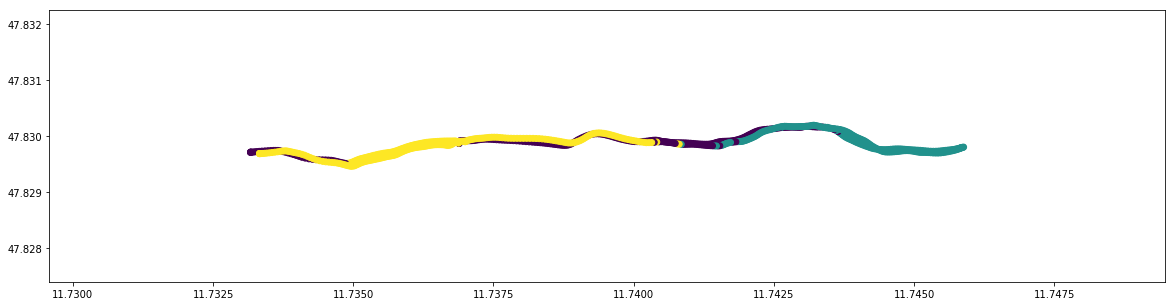

[['score_name', 'score_result'], ['adjusted_rand_score', 0.06817118758034456], ['adjusted_mutual_info_score', 0.16548815519017424], ['homogeneity_score', 0.12665365959177471], ['completeness_score', 0.27533064067063406], ['v_measure_score', 0.173497488413951], ['fowlkes_mallows_score', 0.2564159927188995], ['silhouette_score', 0.09943768937547912], ['davies_bouldin_score', 2.529921546604958], ['calinski_harabasz_score', 88.79797934346284]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 25
clusters: 3
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([44, 14, 16, 17, 17, 15, 11, 49,  6, 13,  7,  6, 24]))


<Figure size 1200x400 with 0 Axes>

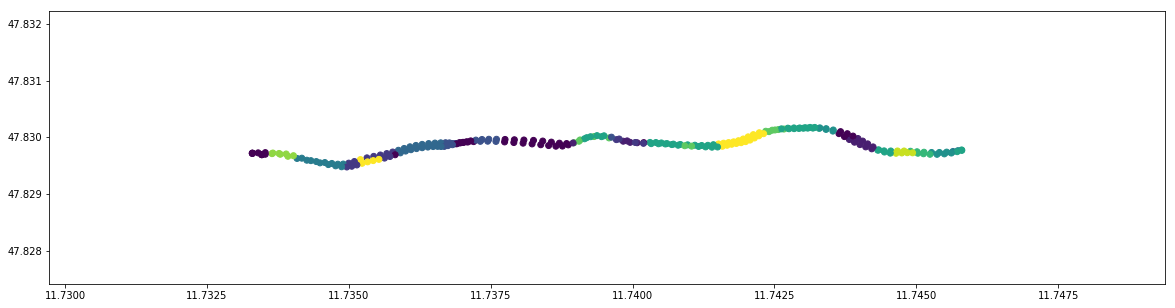


---- Cael2 ----
Filters: [ 32  64 128  15  15]
Input Shape: (152, 6)
(239, 152, 6) data.shape


Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________________________
flatten_64 (Flatten)         (None, 2432)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                36495     
_________________________________________________________________
embedding (Lambda)           (None, 15)                0         
______________________

8/8 [==============================] - 0s 9ms/step - loss: 0.7911
Epoch 183/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7908
Epoch 184/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7902
Epoch 185/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7900
Epoch 186/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7897
Epoch 187/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7893
Epoch 188/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7889
Epoch 189/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7884
Epoch 190/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7881
Epoch 191/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7877
Epoch 192/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7877
Epoch 193/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7873
Epoch 194/500
8/8 [============================

8/8 [==============================] - 0s 9ms/step - loss: 0.7585
Epoch 285/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7582
Epoch 286/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7583
Epoch 287/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7579
Epoch 288/500
8/8 [==============================] - 0s 13ms/step - loss: 0.7577
Epoch 289/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7573
Epoch 290/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7566
Epoch 291/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7562
Epoch 292/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7556
Epoch 293/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7551
Epoch 294/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7547
Epoch 295/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7545
Epoch 296/500
8/8 [=============================

8/8 [==============================] - 0s 9ms/step - loss: 0.7482
Epoch 387/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7482
Epoch 388/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7483
Epoch 389/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7485
Epoch 390/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7486
Epoch 391/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7490
Epoch 392/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7495
Epoch 393/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7493
Epoch 394/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7492
Epoch 395/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7489
Epoch 396/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7486
Epoch 397/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7483
Epoch 398/500
8/8 [============================

8/8 [==============================] - 0s 10ms/step - loss: 0.7465
Epoch 489/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7465
Epoch 490/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7468
Epoch 491/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7464
Epoch 492/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7460
Epoch 493/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7459
Epoch 494/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7455
Epoch 495/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7454
Epoch 496/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7453
Epoch 497/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7450
Epoch 498/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7448
Epoch 499/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7446
Epoch 500/500
8/8 [==============================] 

<Figure size 1200x400 with 0 Axes>

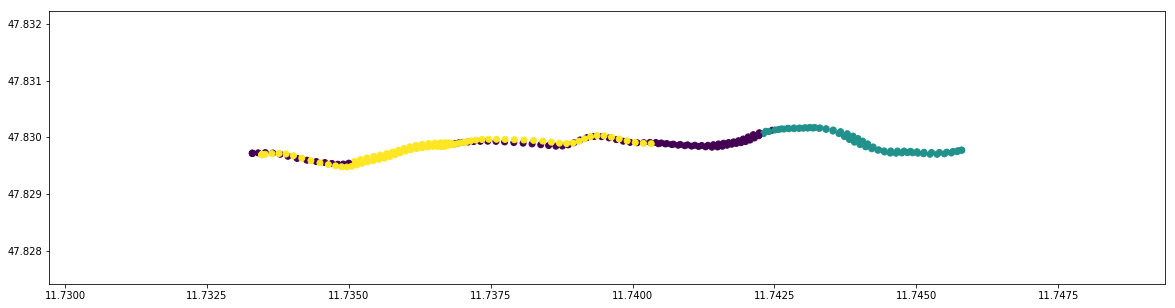

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08480047204128796], ['adjusted_mutual_info_score', 0.20547022191208253], ['homogeneity_score', 0.16886751632295854], ['completeness_score', 0.3634924027911724], ['v_measure_score', 0.2306036087906544], ['fowlkes_mallows_score', 0.2745412208513984], ['silhouette_score', 0.08863209892965719], ['davies_bouldin_score', 2.7045501004897106], ['calinski_harabasz_score', 27.74254784277433]]

---- Cael2fi ----
Filters: [32, 64, 128, 15]
Input Shape: (239, 15)
(239, 152, 6) data.shape


Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 

8/8 [==============================] - 0s 8ms/step - loss: 0.7692
Epoch 177/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7688
Epoch 178/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7685
Epoch 179/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7682
Epoch 180/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7680
Epoch 181/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7678
Epoch 182/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7677
Epoch 183/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7675
Epoch 184/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7674
Epoch 185/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7674
Epoch 186/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7673
Epoch 187/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7670
Epoch 188/500
8/8 [==============================] -

Epoch 380/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7491
Epoch 381/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7488
Epoch 382/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7488
Epoch 383/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7493
Epoch 384/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7491
Epoch 385/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7493
Epoch 386/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7495
Epoch 387/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7492
Epoch 388/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7487
Epoch 389/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7492
Epoch 390/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7490
Epoch 391/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7487
Epoch 392/500
8/8 [================

<Figure size 1200x400 with 0 Axes>

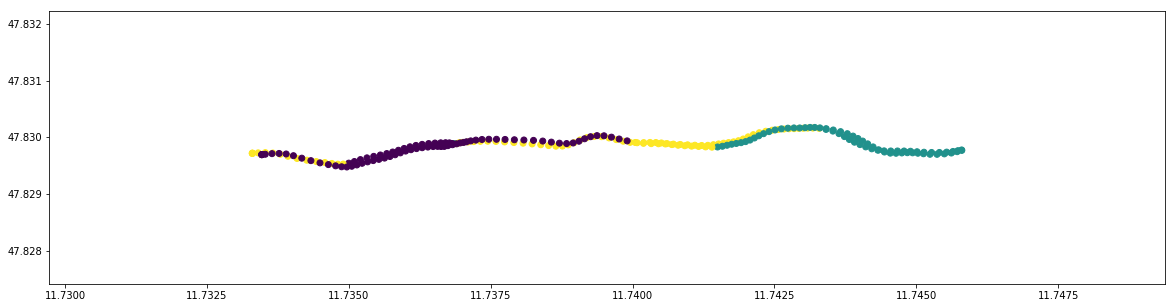

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08014461264257647], ['adjusted_mutual_info_score', 0.185813058235953], ['homogeneity_score', 0.15494897109267125], ['completeness_score', 0.33335471277140516], ['v_measure_score', 0.21156084403901504], ['fowlkes_mallows_score', 0.2699466503534373], ['silhouette_score', 0.09276172653983814], ['davies_bouldin_score', 2.5660375536995916], ['calinski_harabasz_score', 28.22194928664558]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 75
clusters: 3
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([44, 14, 16, 17, 17, 15, 11, 49,  6, 13,  7,  6, 24]))


<Figure size 1200x400 with 0 Axes>

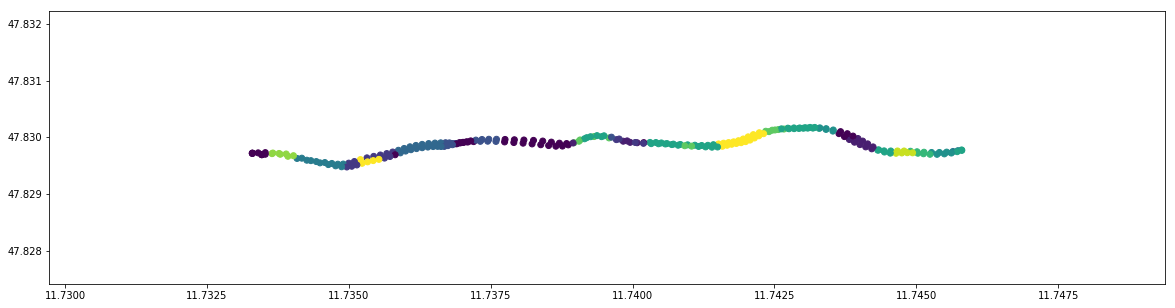


---- Cael2 ----
Filters: [ 32  64 128  15  15  15]
Input Shape: (152, 6)
(239, 152, 6) data.shape


Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________________________
flatten_66 (Flatten)         (None, 2432)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                36495     
_________________________________________________________________
embedding (Lambda)           (None, 15)                0         
__________________

8/8 [==============================] - 0s 9ms/step - loss: 0.7744
Epoch 183/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7743
Epoch 184/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7740
Epoch 185/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7738
Epoch 186/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7737
Epoch 187/500
8/8 [==============================] - 0s 7ms/step - loss: 0.7737
Epoch 188/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7735
Epoch 189/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7734
Epoch 190/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7732
Epoch 191/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7730
Epoch 192/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7728
Epoch 193/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7726
Epoch 194/500
8/8 [==============================

8/8 [==============================] - 0s 7ms/step - loss: 0.7645
Epoch 387/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7645
Epoch 388/500
8/8 [==============================] - 0s 7ms/step - loss: 0.7645
Epoch 389/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7645
Epoch 390/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7645
Epoch 391/500
8/8 [==============================] - 0s 7ms/step - loss: 0.7644
Epoch 392/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7645
Epoch 393/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7646
Epoch 394/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7647
Epoch 395/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7646
Epoch 396/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7647
Epoch 397/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7647
Epoch 398/500
8/8 [==============================] - 0

<Figure size 1200x400 with 0 Axes>

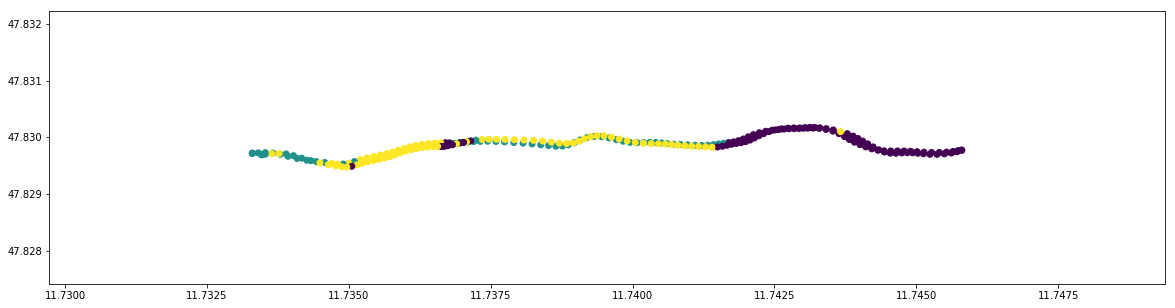

[['score_name', 'score_result'], ['adjusted_rand_score', 0.061315081997918026], ['adjusted_mutual_info_score', 0.14579323417712103], ['homogeneity_score', 0.1264421285020794], ['completeness_score', 0.2731472319921523], ['v_measure_score', 0.17286404905686964], ['fowlkes_mallows_score', 0.2528799694267574], ['silhouette_score', 0.06905024585033248], ['davies_bouldin_score', 3.022261491052524], ['calinski_harabasz_score', 24.32357799597807]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15]
Input Shape: (239, 15)
(239, 152, 6) data.shape


Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 

Epoch 75/500
8/8 [==============================] - 0s 8ms/step - loss: 0.8247
Epoch 76/500
8/8 [==============================] - 0s 8ms/step - loss: 0.8247
Epoch 77/500
8/8 [==============================] - 0s 9ms/step - loss: 0.8246
Epoch 78/500
8/8 [==============================] - 0s 7ms/step - loss: 0.8237
Epoch 79/500
8/8 [==============================] - 0s 6ms/step - loss: 0.8229
Epoch 80/500
8/8 [==============================] - 0s 6ms/step - loss: 0.8227
Epoch 81/500
8/8 [==============================] - 0s 7ms/step - loss: 0.8228
Epoch 82/500
8/8 [==============================] - 0s 8ms/step - loss: 0.8226
Epoch 83/500
8/8 [==============================] - 0s 7ms/step - loss: 0.8223
Epoch 84/500
8/8 [==============================] - 0s 7ms/step - loss: 0.8224
Epoch 85/500
8/8 [==============================] - 0s 8ms/step - loss: 0.8219
Epoch 86/500
8/8 [==============================] - 0s 8ms/step - loss: 0.8215
Epoch 87/500
8/8 [==============================] - 

8/8 [==============================] - 0s 8ms/step - loss: 0.7716
Epoch 280/500
8/8 [==============================] - 0s 7ms/step - loss: 0.7716
Epoch 281/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7716
Epoch 282/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7715
Epoch 283/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7714
Epoch 284/500
8/8 [==============================] - 0s 7ms/step - loss: 0.7713
Epoch 285/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7711
Epoch 286/500
8/8 [==============================] - 0s 7ms/step - loss: 0.7711
Epoch 287/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7711
Epoch 288/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7711
Epoch 289/500
8/8 [==============================] - 0s 7ms/step - loss: 0.7711
Epoch 290/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7711
Epoch 291/500
8/8 [==============================] - 0

8/8 [==============================] - 0s 7ms/step - loss: 0.7517
Epoch 484/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7516
Epoch 485/500
8/8 [==============================] - 0s 7ms/step - loss: 0.7516
Epoch 486/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7515
Epoch 487/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7515
Epoch 488/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7514
Epoch 489/500
8/8 [==============================] - 0s 7ms/step - loss: 0.7514
Epoch 490/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7514
Epoch 491/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7513
Epoch 492/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7513
Epoch 493/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7513
Epoch 494/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7513
Epoch 495/500
8/8 [==============================] - 

<Figure size 1200x400 with 0 Axes>

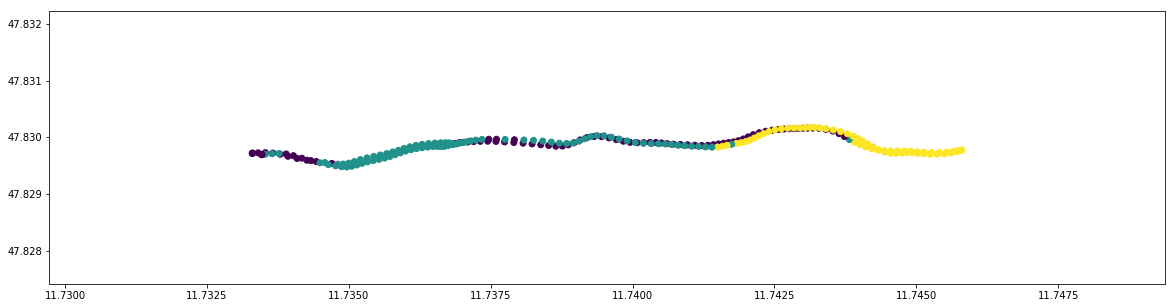

[['score_name', 'score_result'], ['adjusted_rand_score', 0.06307373904163101], ['adjusted_mutual_info_score', 0.1631242597478841], ['homogeneity_score', 0.13861625140679165], ['completeness_score', 0.300361918628995], ['v_measure_score', 0.1896907229911176], ['fowlkes_mallows_score', 0.2551312295561585], ['silhouette_score', 0.08431224645237424], ['davies_bouldin_score', 2.8397583325571816], ['calinski_harabasz_score', 25.421484339158763]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 150
clusters: 3
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([44, 14, 16, 17, 17, 15, 11, 49,  6, 13,  7,  6, 24]))


<Figure size 1200x400 with 0 Axes>

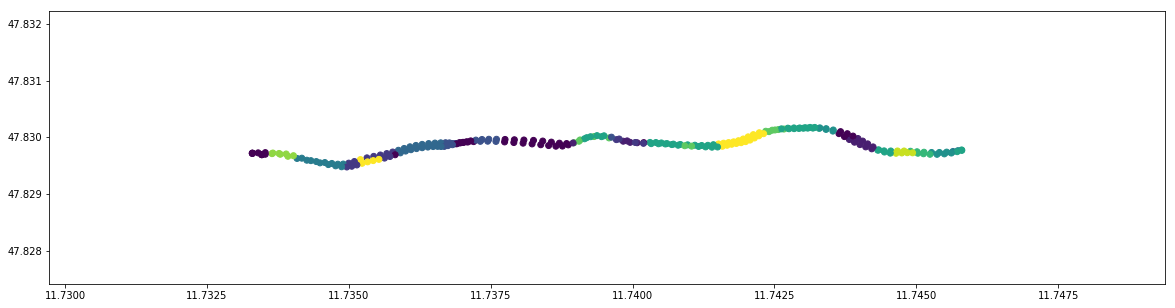


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15]
Input Shape: (152, 6)
(239, 152, 6) data.shape


Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________________________
flatten_68 (Flatten)         (None, 2432)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                36495     
_________________________________________________________________
embedding (Lambda)           (None, 15)                0         
______________

8/8 [==============================] - 0s 10ms/step - loss: 0.7155
Epoch 181/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7156
Epoch 182/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7148
Epoch 183/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7138
Epoch 184/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7131
Epoch 185/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7130
Epoch 186/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7119
Epoch 187/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7114
Epoch 188/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7107
Epoch 189/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7100
Epoch 190/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7094
Epoch 191/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7089
Epoch 192/500
8/8 [========================

8/8 [==============================] - 0s 10ms/step - loss: 0.6821
Epoch 383/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6821
Epoch 384/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6819
Epoch 385/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6817
Epoch 386/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6815
Epoch 387/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6815
Epoch 388/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6814
Epoch 389/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6814
Epoch 390/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6812
Epoch 391/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6810
Epoch 392/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6810
Epoch 393/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6810
Epoch 394/500
8/8 [=========================

<Figure size 1200x400 with 0 Axes>

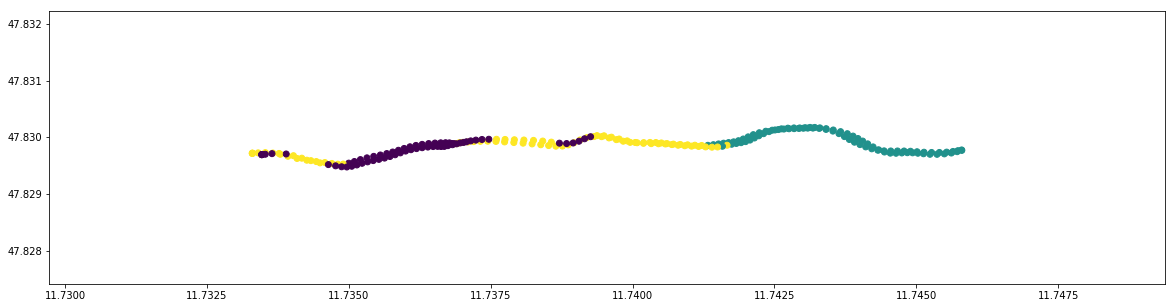

[['score_name', 'score_result'], ['adjusted_rand_score', 0.10114564455284367], ['adjusted_mutual_info_score', 0.2237772979852956], ['homogeneity_score', 0.1817575230595234], ['completeness_score', 0.3919874162583073], ['v_measure_score', 0.24835656741242162], ['fowlkes_mallows_score', 0.29072097784532436], ['silhouette_score', 0.09599562308511224], ['davies_bouldin_score', 2.581321934731289], ['calinski_harabasz_score', 29.36411959592881]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15]
Input Shape: (239, 15)
(239, 152, 6) data.shape


Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (Non

Epoch 176/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7411
Epoch 177/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7401
Epoch 178/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7391
Epoch 179/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7382
Epoch 180/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7377
Epoch 181/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7374
Epoch 182/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7367
Epoch 183/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7360
Epoch 184/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7354
Epoch 185/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7351
Epoch 186/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7347
Epoch 187/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7345
Epoch 188/500
8/8 [==============

8/8 [==============================] - 0s 10ms/step - loss: 0.7086
Epoch 379/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7085
Epoch 380/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7084
Epoch 381/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7083
Epoch 382/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7082
Epoch 383/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7080
Epoch 384/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7078
Epoch 385/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7077
Epoch 386/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7076
Epoch 387/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7075
Epoch 388/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7075
Epoch 389/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7075
Epoch 390/500
8/8 [========================

<Figure size 1200x400 with 0 Axes>

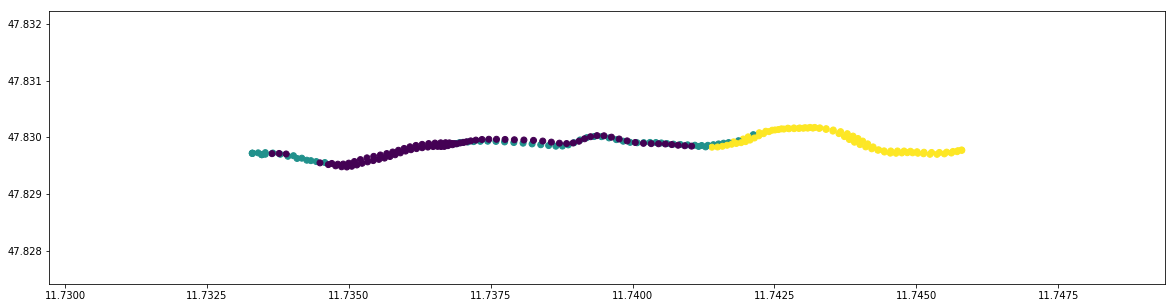

[['score_name', 'score_result'], ['adjusted_rand_score', 0.07684303902725921], ['adjusted_mutual_info_score', 0.18602246265573116], ['homogeneity_score', 0.15507671339379067], ['completeness_score', 0.3338072851184774], ['v_measure_score', 0.21177104114925732], ['fowlkes_mallows_score', 0.26688977342222875], ['silhouette_score', 0.09092532231982738], ['davies_bouldin_score', 2.7598553366920098], ['calinski_harabasz_score', 27.62182130661205]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 25
clusters: 3
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([24, 10, 11,  5,  8,  8,  1, 26,  6,  3,  2,  2, 12]))


<Figure size 1200x400 with 0 Axes>

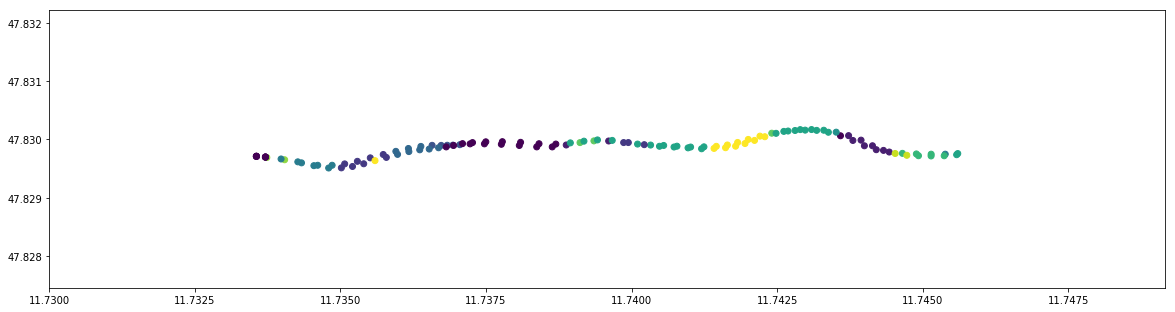


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15]
Input Shape: (300, 6)
(118, 300, 6) data.shape


Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________________________
flatten_70 (Flatten)         (None, 4736)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                71055     
_________________________________________________________________
embedding (Lambda)           (None, 15)                0         
__________

4/4 [==============================] - 0s 12ms/step - loss: 0.6797
Epoch 181/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6789
Epoch 182/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6782
Epoch 183/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6776
Epoch 184/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6769
Epoch 185/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6763
Epoch 186/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6757
Epoch 187/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6753
Epoch 188/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6747
Epoch 189/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6745
Epoch 190/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6738
Epoch 191/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6734
Epoch 192/500
4/4 [=======================

4/4 [==============================] - 0s 12ms/step - loss: 0.6466
Epoch 383/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6464
Epoch 384/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6466
Epoch 385/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6467
Epoch 386/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6465
Epoch 387/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6467
Epoch 388/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6468
Epoch 389/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6468
Epoch 390/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6473
Epoch 391/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6471
Epoch 392/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6471
Epoch 393/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6471
Epoch 394/500
4/4 [========================

<Figure size 1200x400 with 0 Axes>

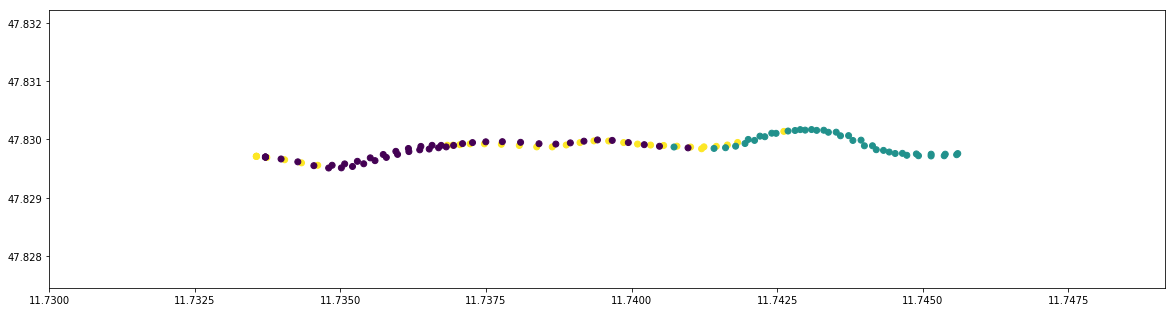

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08829583816691919], ['adjusted_mutual_info_score', 0.20048539500607265], ['homogeneity_score', 0.19113217869331645], ['completeness_score', 0.3929511530485658], ['v_measure_score', 0.2571742966135998], ['fowlkes_mallows_score', 0.2842716460880715], ['silhouette_score', 0.0849399654190154], ['davies_bouldin_score', 2.6797287336545867], ['calinski_harabasz_score', 13.487085451734648]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15]
Input Shape: (118, 15)
(118, 300, 6) data.shape


Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)              

4/4 [==============================] - 0s 11ms/step - loss: 0.8133
Epoch 75/500
4/4 [==============================] - 0s 12ms/step - loss: 0.8131
Epoch 76/500
4/4 [==============================] - 0s 12ms/step - loss: 0.8130
Epoch 77/500
4/4 [==============================] - 0s 12ms/step - loss: 0.8125
Epoch 78/500
4/4 [==============================] - 0s 16ms/step - loss: 0.8127
Epoch 79/500
4/4 [==============================] - 0s 12ms/step - loss: 0.8120
Epoch 80/500
4/4 [==============================] - 0s 13ms/step - loss: 0.8115
Epoch 81/500
4/4 [==============================] - 0s 14ms/step - loss: 0.8116
Epoch 82/500
4/4 [==============================] - 0s 13ms/step - loss: 0.8117
Epoch 83/500
4/4 [==============================] - 0s 14ms/step - loss: 0.8114
Epoch 84/500
4/4 [==============================] - 0s 10ms/step - loss: 0.8113
Epoch 85/500
4/4 [==============================] - 0s 10ms/step - loss: 0.8101
Epoch 86/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 11ms/step - loss: 0.6818
Epoch 277/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6815
Epoch 278/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6813
Epoch 279/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6810
Epoch 280/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6808
Epoch 281/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6805
Epoch 282/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6804
Epoch 283/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6803
Epoch 284/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6802
Epoch 285/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6800
Epoch 286/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6799
Epoch 287/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6798
Epoch 288/500
4/4 [=======================

4/4 [==============================] - 0s 11ms/step - loss: 0.6367
Epoch 479/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6366
Epoch 480/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6366
Epoch 481/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6365
Epoch 482/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6365
Epoch 483/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6365
Epoch 484/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6365
Epoch 485/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6364
Epoch 486/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6364
Epoch 487/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6365
Epoch 488/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6365
Epoch 489/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6365
Epoch 490/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

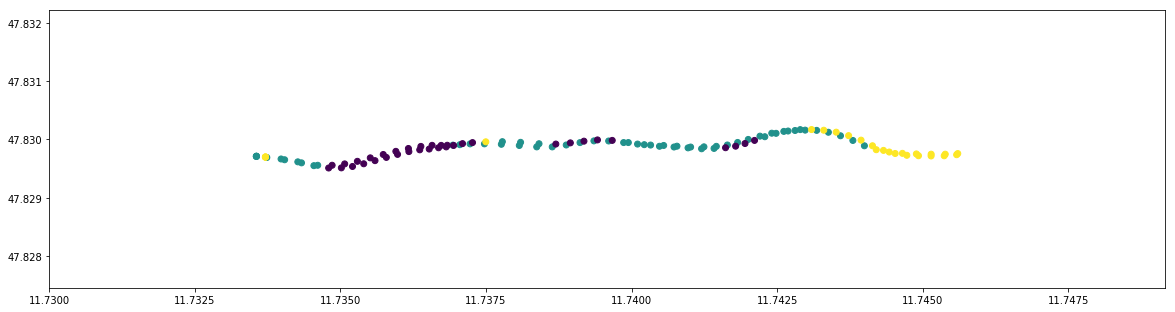

[['score_name', 'score_result'], ['adjusted_rand_score', 0.07732500654070015], ['adjusted_mutual_info_score', 0.17787779025857142], ['homogeneity_score', 0.17312069286583864], ['completeness_score', 0.3738587179307263], ['v_measure_score', 0.23665490511917434], ['fowlkes_mallows_score', 0.2862452070866809], ['silhouette_score', 0.07413144237965495], ['davies_bouldin_score', 2.8642869849852173], ['calinski_harabasz_score', 9.273687625188673]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 75
clusters: 3
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([24, 10, 11,  5,  8,  8,  1, 26,  6,  3,  2,  2, 12]))


<Figure size 1200x400 with 0 Axes>

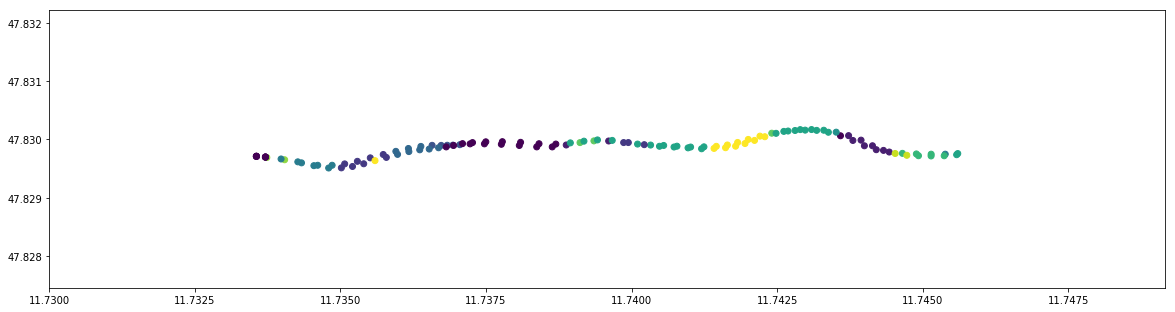


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15]
Input Shape: (300, 6)
(118, 300, 6) data.shape


Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________________________
flatten_72 (Flatten)         (None, 4736)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                71055     
_________________________________________________________________
embedding (Lambda)           (None, 15)                0         
______

4/4 [==============================] - 0s 12ms/step - loss: 0.6727
Epoch 181/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6719
Epoch 182/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6713
Epoch 183/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6704
Epoch 184/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6694
Epoch 185/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6690
Epoch 186/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6684
Epoch 187/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6677
Epoch 188/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6671
Epoch 189/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6661
Epoch 190/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6655
Epoch 191/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6646
Epoch 192/500
4/4 [=======================

4/4 [==============================] - 0s 14ms/step - loss: 0.6298
Epoch 383/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6298
Epoch 384/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6298
Epoch 385/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6297
Epoch 386/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6297
Epoch 387/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6298
Epoch 388/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6298
Epoch 389/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6297
Epoch 390/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6297
Epoch 391/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6298
Epoch 392/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6298
Epoch 393/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6298
Epoch 394/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

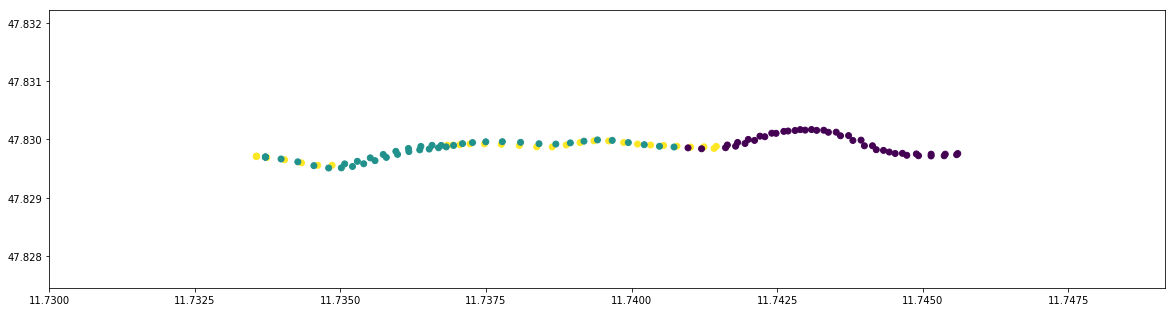

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09869311448618986], ['adjusted_mutual_info_score', 0.2086119831348268], ['homogeneity_score', 0.196538911396472], ['completeness_score', 0.4054840999597687], ['v_measure_score', 0.26475201808361926], ['fowlkes_mallows_score', 0.2946755808262635], ['silhouette_score', 0.08490899613377972], ['davies_bouldin_score', 2.7147452973543693], ['calinski_harabasz_score', 13.633775487462813]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15]
Input Shape: (118, 15)
(118, 300, 6) data.shape


Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)           

Epoch 74/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7788
Epoch 75/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7788
Epoch 76/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7786
Epoch 77/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7787
Epoch 78/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7779
Epoch 79/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7778
Epoch 80/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7776
Epoch 81/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7769
Epoch 82/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7766
Epoch 83/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7771
Epoch 84/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7778
Epoch 85/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7802
Epoch 86/500
4/4 [======================

4/4 [==============================] - 0s 10ms/step - loss: 0.6182
Epoch 277/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6179
Epoch 278/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6177
Epoch 279/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6172
Epoch 280/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6168
Epoch 281/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6165
Epoch 282/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6163
Epoch 283/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6160
Epoch 284/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6158
Epoch 285/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6152
Epoch 286/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6149
Epoch 287/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6149
Epoch 288/500
4/4 [=======================

4/4 [==============================] - 0s 11ms/step - loss: 0.5917
Epoch 479/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5917
Epoch 480/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5917
Epoch 481/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5917
Epoch 482/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5918
Epoch 483/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5917
Epoch 484/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5918
Epoch 485/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5917
Epoch 486/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5917
Epoch 487/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5917
Epoch 488/500
4/4 [==============================] - 0s 15ms/step - loss: 0.5917
Epoch 489/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5917
Epoch 490/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

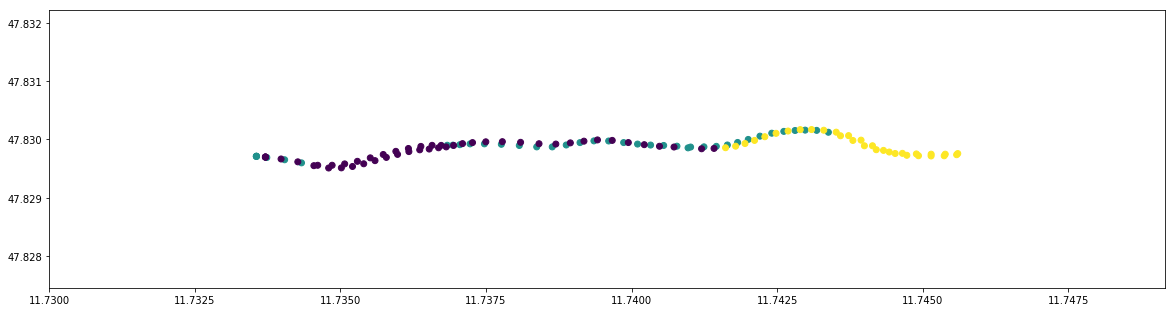

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0801392736186815], ['adjusted_mutual_info_score', 0.19952714679084643], ['homogeneity_score', 0.19008211961776936], ['completeness_score', 0.39357643706493695], ['v_measure_score', 0.2563548243483825], ['fowlkes_mallows_score', 0.27852719721911945], ['silhouette_score', 0.08750167747022694], ['davies_bouldin_score', 2.6314446124887856], ['calinski_harabasz_score', 13.338784389860033]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 150
clusters: 3
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([24, 10, 11,  5,  8,  8,  1, 26,  6,  3,  2,  2, 12]))


<Figure size 1200x400 with 0 Axes>

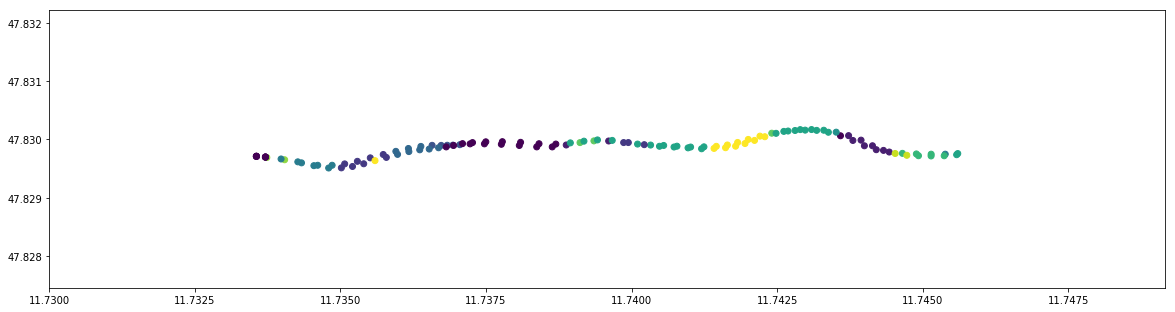


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15]
Input Shape: (300, 6)
(118, 300, 6) data.shape


Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________________________
flatten_74 (Flatten)         (None, 4736)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                71055     
_________________________________________________________________
embedding (Lambda)           (None, 15)                0         
__

4/4 [==============================] - 0s 12ms/step - loss: 0.6911
Epoch 181/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6909
Epoch 182/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6903
Epoch 183/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6895
Epoch 184/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6889
Epoch 185/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6877
Epoch 186/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6869
Epoch 187/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6865
Epoch 188/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6857
Epoch 189/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6854
Epoch 190/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6847
Epoch 191/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6843
Epoch 192/500
4/4 [=======================

4/4 [==============================] - 0s 11ms/step - loss: 0.6550
Epoch 383/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6549
Epoch 384/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6549
Epoch 385/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6549
Epoch 386/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6549
Epoch 387/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6548
Epoch 388/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6548
Epoch 389/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6548
Epoch 390/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6548
Epoch 391/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6548
Epoch 392/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6548
Epoch 393/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6548
Epoch 394/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

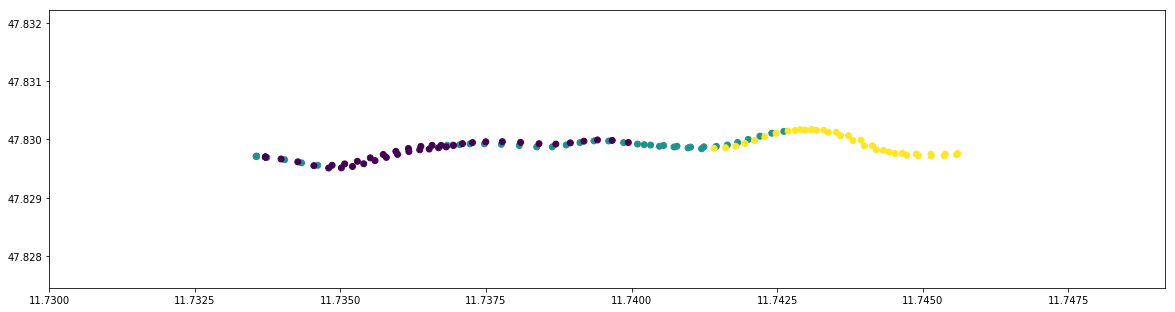

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08769787151921982], ['adjusted_mutual_info_score', 0.20388392581283815], ['homogeneity_score', 0.19378164762168412], ['completeness_score', 0.3962560768938171], ['v_measure_score', 0.26027880005008497], ['fowlkes_mallows_score', 0.2823640924215192], ['silhouette_score', 0.08810242361531444], ['davies_bouldin_score', 2.6462250958880174], ['calinski_harabasz_score', 13.881190413876348]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15]
Input Shape: (118, 15)
(118, 300, 6) data.shape


Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)    

4/4 [==============================] - 0s 11ms/step - loss: 0.6992
Epoch 175/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6982
Epoch 176/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6972
Epoch 177/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6962
Epoch 178/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6971
Epoch 179/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6962
Epoch 180/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6949
Epoch 181/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6939
Epoch 182/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6928
Epoch 183/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6916
Epoch 184/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6905
Epoch 185/500
4/4 [==============================] - 0s 16ms/step - loss: 0.6896
Epoch 186/500
4/4 [=======================

4/4 [==============================] - 0s 13ms/step - loss: 0.6531
Epoch 377/500
4/4 [==============================] - 0s 16ms/step - loss: 0.6530
Epoch 378/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6528
Epoch 379/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6527
Epoch 380/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6525
Epoch 381/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6524
Epoch 382/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6523
Epoch 383/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6523
Epoch 384/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6523
Epoch 385/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6524
Epoch 386/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6521
Epoch 387/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6522
Epoch 388/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

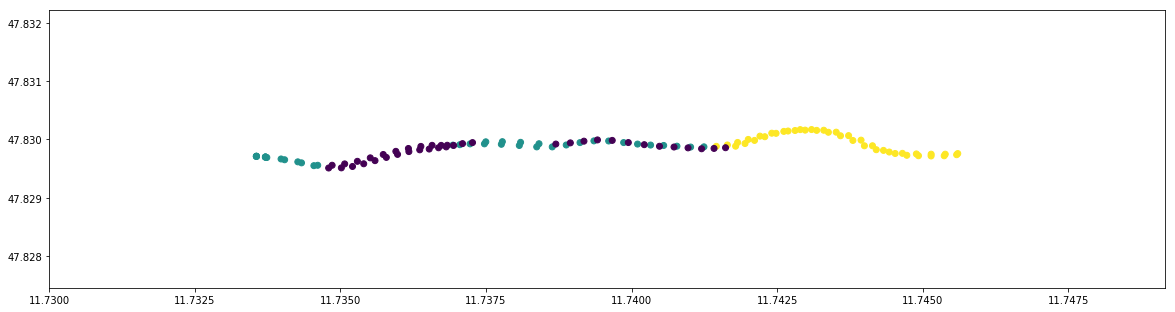

[['score_name', 'score_result'], ['adjusted_rand_score', 0.13000211223722852], ['adjusted_mutual_info_score', 0.24209460933350238], ['homogeneity_score', 0.22030579038321546], ['completeness_score', 0.44986718274140614], ['v_measure_score', 0.2957694482940191], ['fowlkes_mallows_score', 0.32093873159101627], ['silhouette_score', 0.09071095523930178], ['davies_bouldin_score', 2.7670893088123094], ['calinski_harabasz_score', 13.944666633805978]]
----------------------------------------------------------------
window_length: 50
sub_sample_length: 25
clusters: 4
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([130,  61,  64,  58,  38,  43,  30, 132,  22,  46,  20,  16,  76]))


<Figure size 1200x400 with 0 Axes>

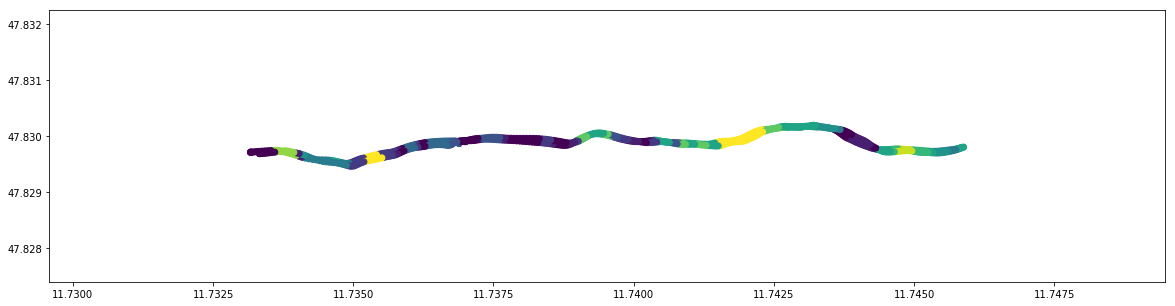


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15]
Input Shape: (52, 6)
(736, 52, 6) data.shape


Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
_________________________________________________________________
flatten_76 (Flatten)         (None, 768)               0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                11535     
_________________________________________________________________
embedding (Lambda)           (None, 15)                0         


23/23 [==============================] - 0s 11ms/step - loss: 0.7319
Epoch 177/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7319
Epoch 178/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7320
Epoch 179/500
23/23 [==============================] - 0s 9ms/step - loss: 0.7320
Epoch 180/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7320
Epoch 181/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7319
Epoch 182/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7321
Epoch 183/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7321
Epoch 184/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7321
Epoch 185/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7321
Epoch 186/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7321
Epoch 187/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7321
Epoch 188/500
23/23

23/23 [==============================] - 0s 10ms/step - loss: 0.7126
Epoch 373/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7126
Epoch 374/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7127
Epoch 375/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7127
Epoch 376/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7128
Epoch 377/500
23/23 [==============================] - 0s 12ms/step - loss: 0.7128
Epoch 378/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7128
Epoch 379/500
23/23 [==============================] - 0s 12ms/step - loss: 0.7128
Epoch 380/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7129
Epoch 381/500
23/23 [==============================] - 0s 12ms/step - loss: 0.7128
Epoch 382/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7128
Epoch 383/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7128
Epoch 384/500
23/2

<Figure size 1200x400 with 0 Axes>

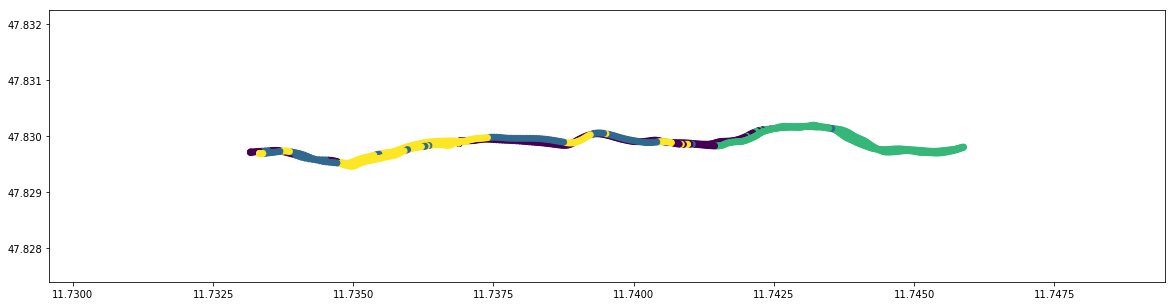

[['score_name', 'score_result'], ['adjusted_rand_score', 0.07106784210159495], ['adjusted_mutual_info_score', 0.17328351547510196], ['homogeneity_score', 0.1442726916944034], ['completeness_score', 0.2559622147837452], ['v_measure_score', 0.1845334182561015], ['fowlkes_mallows_score', 0.23703761220371194], ['silhouette_score', 0.08447436768277002], ['davies_bouldin_score', 2.371285427534158], ['calinski_harabasz_score', 75.76050898552546]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (736, 15)
(736, 52, 6) data.shape


Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)    

23/23 [==============================] - 0s 10ms/step - loss: 0.7334
Epoch 73/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7328
Epoch 74/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7313
Epoch 75/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7299
Epoch 76/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7281
Epoch 77/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7267
Epoch 78/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7256
Epoch 79/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7250
Epoch 80/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7240
Epoch 81/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7228
Epoch 82/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7218
Epoch 83/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7216
Epoch 84/500
23/23 [=========

23/23 [==============================] - 0s 11ms/step - loss: 0.6683
Epoch 270/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6685
Epoch 271/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6683
Epoch 272/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6682
Epoch 273/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6682
Epoch 274/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6682
Epoch 275/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6682
Epoch 276/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6682
Epoch 277/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6683
Epoch 278/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6683
Epoch 279/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6680
Epoch 280/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6680
Epoch 281/500
23/2

23/23 [==============================] - 0s 11ms/step - loss: 0.6634
Epoch 466/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6633
Epoch 467/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6632
Epoch 468/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6630
Epoch 469/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6631
Epoch 470/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6632
Epoch 471/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6632
Epoch 472/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6632
Epoch 473/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6632
Epoch 474/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6630
Epoch 475/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6628
Epoch 476/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6627
Epoch 477/500
23/2

<Figure size 1200x400 with 0 Axes>

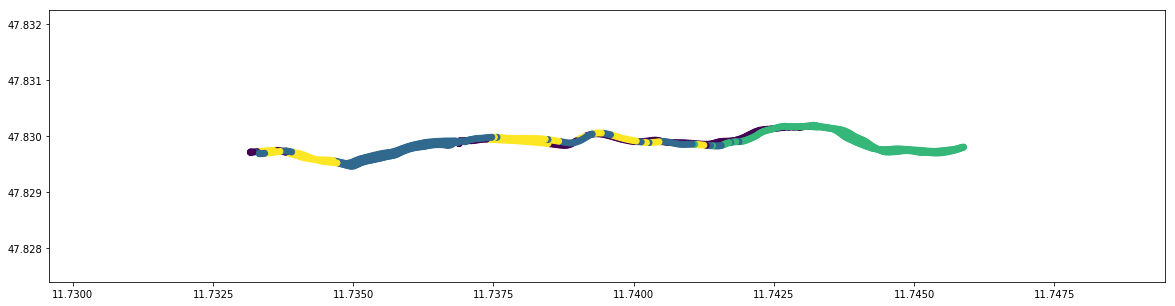

[['score_name', 'score_result'], ['adjusted_rand_score', 0.06465236455405633], ['adjusted_mutual_info_score', 0.17601205353276633], ['homogeneity_score', 0.14677250383514429], ['completeness_score', 0.2582586259864927], ['v_measure_score', 0.1871721079303405], ['fowlkes_mallows_score', 0.22937645238290702], ['silhouette_score', 0.08741828267966154], ['davies_bouldin_score', 2.341340547255811], ['calinski_harabasz_score', 77.13716217928135]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 25
clusters: 4
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([44, 14, 16, 17, 17, 15, 11, 49,  6, 13,  7,  6, 24]))


<Figure size 1200x400 with 0 Axes>

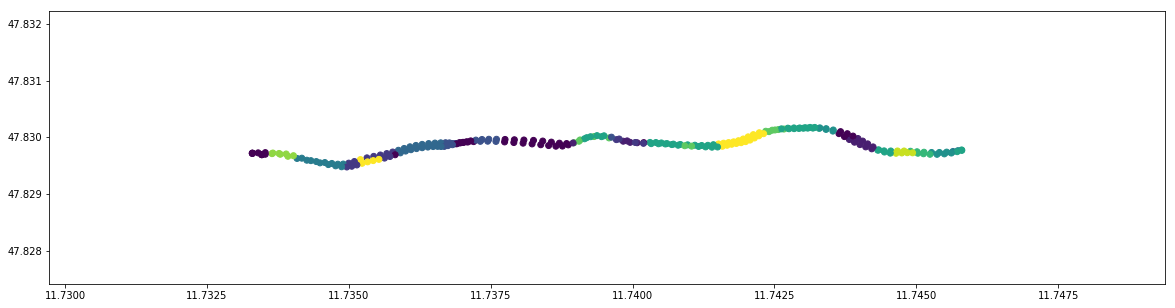


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15]
Input Shape: (152, 6)
(239, 152, 6) data.shape


Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________________________
flatten_78 (Flatten)         (None, 2432)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                36495     
_________________________________________________________________
embedding (Lambda)           (None, 15)                0    

8/8 [==============================] - 0s 10ms/step - loss: 0.7469
Epoch 181/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7464
Epoch 182/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7460
Epoch 183/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7454
Epoch 184/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7453
Epoch 185/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7449
Epoch 186/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7449
Epoch 187/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7449
Epoch 188/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7445
Epoch 189/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7439
Epoch 190/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7436
Epoch 191/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7432
Epoch 192/500
8/8 [============================

8/8 [==============================] - 0s 9ms/step - loss: 0.7250
Epoch 383/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7248
Epoch 384/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7247
Epoch 385/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7246
Epoch 386/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7244
Epoch 387/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7244
Epoch 388/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7243
Epoch 389/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7244
Epoch 390/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7244
Epoch 391/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7244
Epoch 392/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7244
Epoch 393/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7244
Epoch 394/500
8/8 [===========================

<Figure size 1200x400 with 0 Axes>

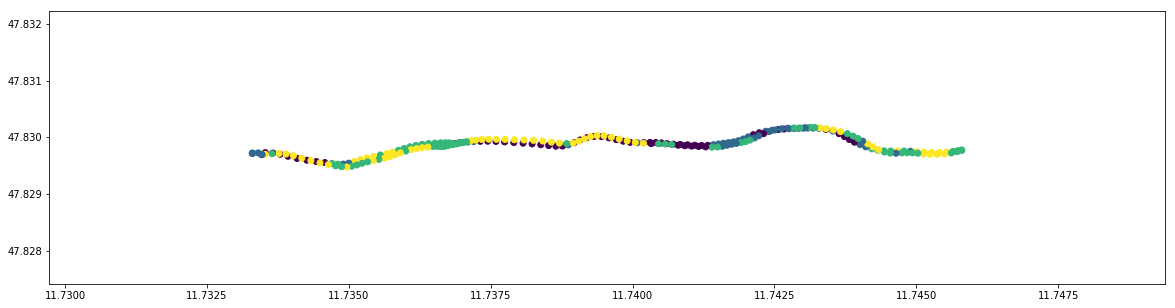

[['score_name', 'score_result'], ['adjusted_rand_score', 0.03534403607149832], ['adjusted_mutual_info_score', 0.08349782275335604], ['homogeneity_score', 0.09884839014020168], ['completeness_score', 0.16823645427178935], ['v_measure_score', 0.1245289878148954], ['fowlkes_mallows_score', 0.19888254733550098], ['silhouette_score', 0.023172777189810645], ['davies_bouldin_score', 3.780704101764262], ['calinski_harabasz_score', 12.227153416435206]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (239, 15)
(239, 152, 6) data.shape


Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Co

8/8 [==============================] - 0s 10ms/step - loss: 0.7775
Epoch 75/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7774
Epoch 76/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7775
Epoch 77/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7777
Epoch 78/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7775
Epoch 79/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7773
Epoch 80/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7773
Epoch 81/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7771
Epoch 82/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7770
Epoch 83/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7770
Epoch 84/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7771
Epoch 85/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7770
Epoch 86/500
8/8 [==============================] - 0s 9ms/s

8/8 [==============================] - 0s 9ms/step - loss: 0.7650
Epoch 177/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7650
Epoch 178/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7651
Epoch 179/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7648
Epoch 180/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7646
Epoch 181/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7643
Epoch 182/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7638
Epoch 183/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7636
Epoch 184/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7633
Epoch 185/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7631
Epoch 186/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7630
Epoch 187/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7627
Epoch 188/500
8/8 [=========================

8/8 [==============================] - 0s 9ms/step - loss: 0.7327
Epoch 379/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7326
Epoch 380/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7325
Epoch 381/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7324
Epoch 382/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7323
Epoch 383/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7323
Epoch 384/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7322
Epoch 385/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7321
Epoch 386/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7321
Epoch 387/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7323
Epoch 388/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7322
Epoch 389/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7324
Epoch 390/500
8/8 [============================

<Figure size 1200x400 with 0 Axes>

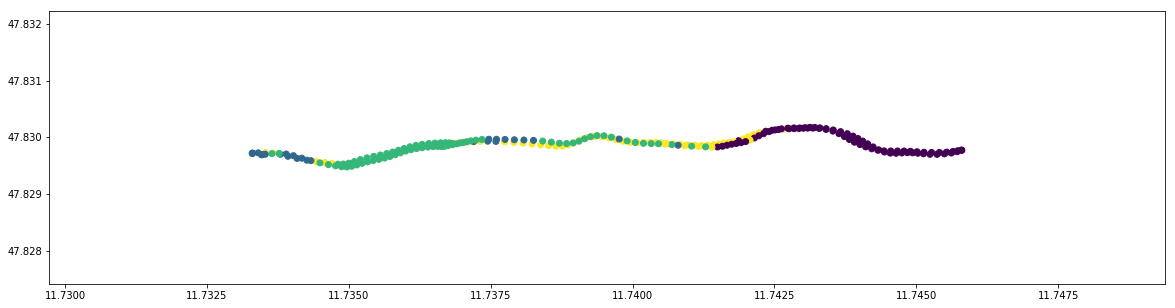

[['score_name', 'score_result'], ['adjusted_rand_score', 0.07744401978224272], ['adjusted_mutual_info_score', 0.1993278585626845], ['homogeneity_score', 0.18445773402395663], ['completeness_score', 0.3270533227814234], ['v_measure_score', 0.23587961207345115], ['fowlkes_mallows_score', 0.24646882133651118], ['silhouette_score', 0.07712992041172018], ['davies_bouldin_score', 2.521902261044737], ['calinski_harabasz_score', 22.491684238799554]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 75
clusters: 4
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([44, 14, 16, 17, 17, 15, 11, 49,  6, 13,  7,  6, 24]))


<Figure size 1200x400 with 0 Axes>

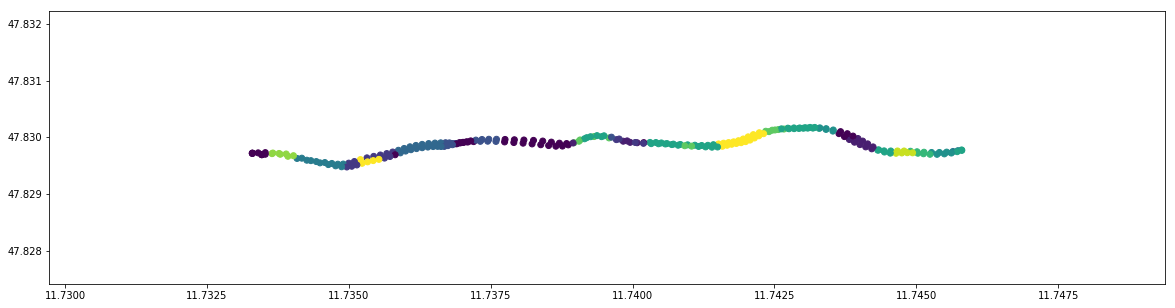


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15]
Input Shape: (152, 6)
(239, 152, 6) data.shape


Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________________________
flatten_80 (Flatten)         (None, 2432)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                36495     
_________________________________________________________________
embedding (Lambda)           (None, 15)                0

8/8 [==============================] - 0s 9ms/step - loss: 0.7364
Epoch 181/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7360
Epoch 182/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7357
Epoch 183/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7354
Epoch 184/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7351
Epoch 185/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7351
Epoch 186/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7352
Epoch 187/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7354
Epoch 188/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7350
Epoch 189/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7355
Epoch 190/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7349
Epoch 191/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7345
Epoch 192/500
8/8 [==========================

8/8 [==============================] - 0s 10ms/step - loss: 0.7274
Epoch 383/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7273
Epoch 384/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7273
Epoch 385/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7272
Epoch 386/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7271
Epoch 387/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7272
Epoch 388/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7271
Epoch 389/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7271
Epoch 390/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7270
Epoch 391/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7269
Epoch 392/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7269
Epoch 393/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7269
Epoch 394/500
8/8 [==========================

<Figure size 1200x400 with 0 Axes>

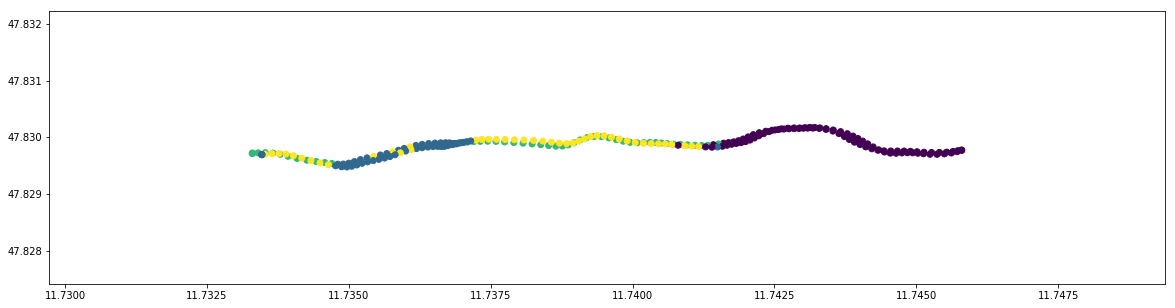

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0916334499590067], ['adjusted_mutual_info_score', 0.20647335388662855], ['homogeneity_score', 0.1905969241994616], ['completeness_score', 0.33335227176430954], ['v_measure_score', 0.2425270165986615], ['fowlkes_mallows_score', 0.2580140298457044], ['silhouette_score', 0.0660455211018553], ['davies_bouldin_score', 2.815279242223062], ['calinski_harabasz_score', 22.833729302228598]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (239, 15)
(239, 152, 6) data.shape


Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Con

8/8 [==============================] - 0s 9ms/step - loss: 0.7186
Epoch 175/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7177
Epoch 176/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7179
Epoch 177/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7173
Epoch 178/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7155
Epoch 179/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7140
Epoch 180/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7136
Epoch 181/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7126
Epoch 182/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7114
Epoch 183/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7101
Epoch 184/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7086
Epoch 185/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7075
Epoch 186/500
8/8 [=========================

8/8 [==============================] - 0s 9ms/step - loss: 0.6542
Epoch 377/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6541
Epoch 378/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6539
Epoch 379/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6540
Epoch 380/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6538
Epoch 381/500
8/8 [==============================] - 0s 12ms/step - loss: 0.6537
Epoch 382/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6540
Epoch 383/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6537
Epoch 384/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6538
Epoch 385/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6540
Epoch 386/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6537
Epoch 387/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6534
Epoch 388/500
8/8 [===========================

<Figure size 1200x400 with 0 Axes>

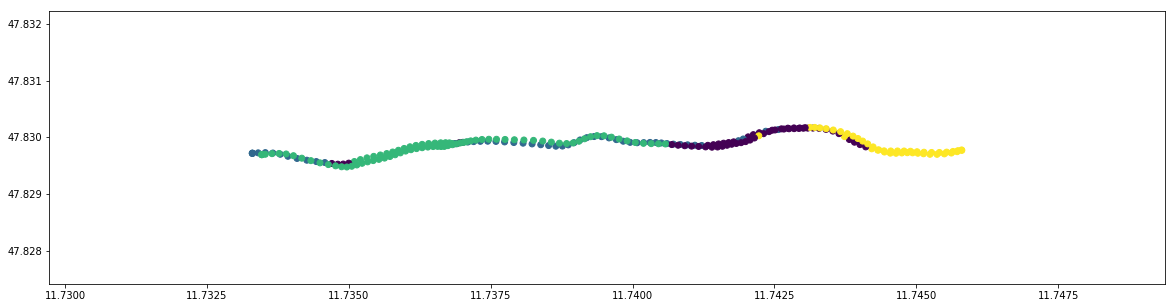

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08652974560605832], ['adjusted_mutual_info_score', 0.20222766305152245], ['homogeneity_score', 0.18773336082428838], ['completeness_score', 0.326360388302887], ['v_measure_score', 0.2383562633859772], ['fowlkes_mallows_score', 0.2515293643453364], ['silhouette_score', 0.07376424814676313], ['davies_bouldin_score', 2.7780558985928567], ['calinski_harabasz_score', 23.1931029778023]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 150
clusters: 4
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([44, 14, 16, 17, 17, 15, 11, 49,  6, 13,  7,  6, 24]))


<Figure size 1200x400 with 0 Axes>

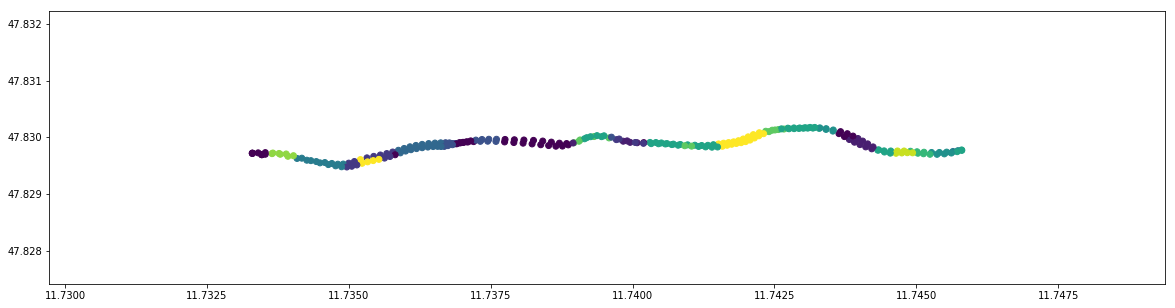


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15]
Input Shape: (152, 6)
(239, 152, 6) data.shape


Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________________________
flatten_82 (Flatten)         (None, 2432)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                36495     
_________________________________________________________________
embedding (Lambda)           (None, 15)             

8/8 [==============================] - 0s 10ms/step - loss: 0.7345
Epoch 181/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7342
Epoch 182/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7333
Epoch 183/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7326
Epoch 184/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7323
Epoch 185/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7323
Epoch 186/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7322
Epoch 187/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7313
Epoch 188/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7306
Epoch 189/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7300
Epoch 190/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7296
Epoch 191/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7292
Epoch 192/500
8/8 [========================

8/8 [==============================] - 0s 10ms/step - loss: 0.7067
Epoch 383/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7064
Epoch 384/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7064
Epoch 385/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7063
Epoch 386/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7063
Epoch 387/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7062
Epoch 388/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7061
Epoch 389/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7061
Epoch 390/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7061
Epoch 391/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7061
Epoch 392/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7062
Epoch 393/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7061
Epoch 394/500
8/8 [===========================

<Figure size 1200x400 with 0 Axes>

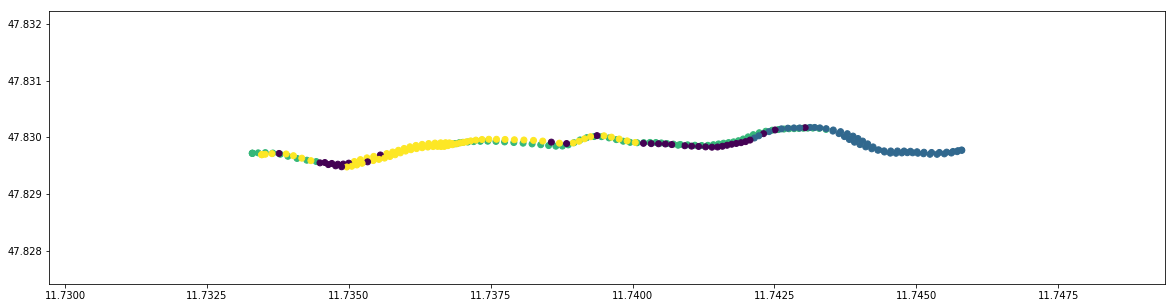

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08955487820895199], ['adjusted_mutual_info_score', 0.20730325492507132], ['homogeneity_score', 0.19140745756238592], ['completeness_score', 0.3335049302562956], ['v_measure_score', 0.24322280161895807], ['fowlkes_mallows_score', 0.25408679346132396], ['silhouette_score', 0.047447419519371516], ['davies_bouldin_score', 3.7711308632088114], ['calinski_harabasz_score', 19.616897200100485]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (239, 15)
(239, 152, 6) data.shape


Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________


8/8 [==============================] - 0s 10ms/step - loss: 0.7299
Epoch 175/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7289
Epoch 176/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7282
Epoch 177/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7278
Epoch 178/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7263
Epoch 179/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7256
Epoch 180/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7250
Epoch 181/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7247
Epoch 182/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7240
Epoch 183/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7233
Epoch 184/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7230
Epoch 185/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7220
Epoch 186/500
8/8 [=======================

8/8 [==============================] - 0s 10ms/step - loss: 0.6967
Epoch 377/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6967
Epoch 378/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6968
Epoch 379/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6970
Epoch 380/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6971
Epoch 381/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6971
Epoch 382/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6969
Epoch 383/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6971
Epoch 384/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6972
Epoch 385/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6970
Epoch 386/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6968
Epoch 387/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6969
Epoch 388/500
8/8 [==========================

<Figure size 1200x400 with 0 Axes>

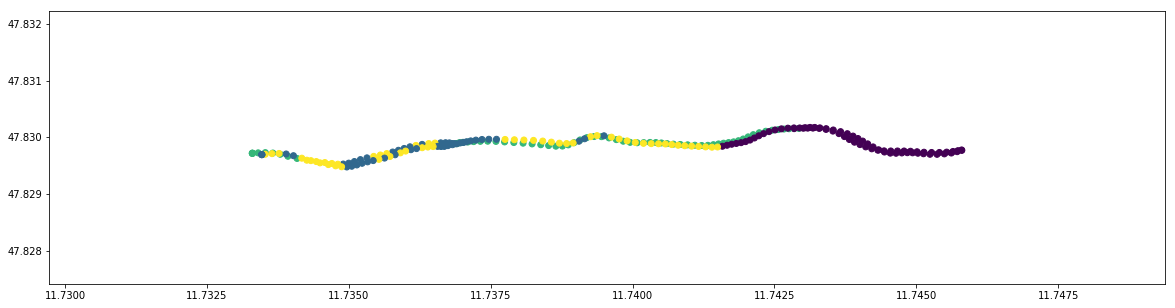

[['score_name', 'score_result'], ['adjusted_rand_score', 0.07557351787750974], ['adjusted_mutual_info_score', 0.18786842118763586], ['homogeneity_score', 0.1776858560871502], ['completeness_score', 0.30424180453715066], ['v_measure_score', 0.22434680518919825], ['fowlkes_mallows_score', 0.23723834168472543], ['silhouette_score', 0.06251816874589311], ['davies_bouldin_score', 2.971064746424253], ['calinski_harabasz_score', 21.64429031217258]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 25
clusters: 4
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([24, 10, 11,  5,  8,  8,  1, 26,  6,  3,  2,  2, 12]))


<Figure size 1200x400 with 0 Axes>

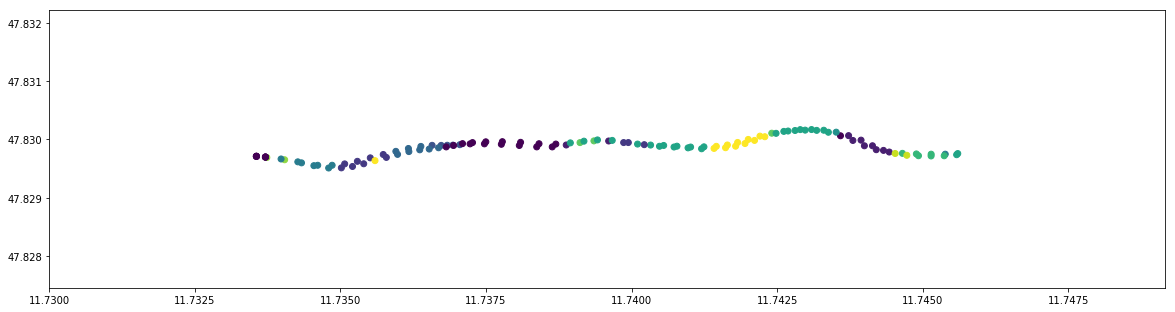


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15]
Input Shape: (300, 6)
(118, 300, 6) data.shape


Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________________________
flatten_84 (Flatten)         (None, 4736)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                71055     
_________________________________________________________________
embedding (Lambda)           (None, 15)         

4/4 [==============================] - 0s 14ms/step - loss: 0.6997
Epoch 181/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6985
Epoch 182/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6978
Epoch 183/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6968
Epoch 184/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6961
Epoch 185/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6951
Epoch 186/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6943
Epoch 187/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6935
Epoch 188/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6928
Epoch 189/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6922
Epoch 190/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6914
Epoch 191/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6912
Epoch 192/500
4/4 [=======================

4/4 [==============================] - 0s 12ms/step - loss: 0.6564
Epoch 282/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6560
Epoch 283/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6560
Epoch 284/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6558
Epoch 285/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6554
Epoch 286/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6549
Epoch 287/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6546
Epoch 288/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6545
Epoch 289/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6542
Epoch 290/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6538
Epoch 291/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6540
Epoch 292/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6535
Epoch 293/500
4/4 [=======================

4/4 [==============================] - 0s 14ms/step - loss: 0.6281
Epoch 484/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6281
Epoch 485/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6280
Epoch 486/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6280
Epoch 487/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6280
Epoch 488/500
4/4 [==============================] - 0s 16ms/step - loss: 0.6278
Epoch 489/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6278
Epoch 490/500
4/4 [==============================] - 0s 16ms/step - loss: 0.6277
Epoch 491/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6277
Epoch 492/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6276
Epoch 493/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6275
Epoch 494/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6275
Epoch 495/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

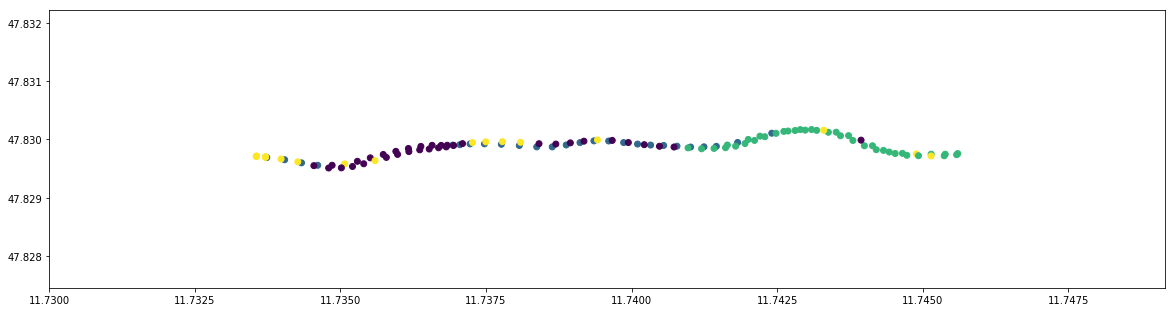

[['score_name', 'score_result'], ['adjusted_rand_score', 0.1087148290420559], ['adjusted_mutual_info_score', 0.20739837856643645], ['homogeneity_score', 0.22798146588340262], ['completeness_score', 0.37657197519929897], ['v_measure_score', 0.28401601937056953], ['fowlkes_mallows_score', 0.2751928896736775], ['silhouette_score', 0.06869350205592105], ['davies_bouldin_score', 2.862647692022718], ['calinski_harabasz_score', 9.433954079324359]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (118, 15)
(118, 300, 6) data.shape


Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________


4/4 [==============================] - 0s 12ms/step - loss: 0.6961
Epoch 175/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6948
Epoch 176/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6934
Epoch 177/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6924
Epoch 178/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6914
Epoch 179/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6903
Epoch 180/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6893
Epoch 181/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6885
Epoch 182/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6877
Epoch 183/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6868
Epoch 184/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6861
Epoch 185/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6853
Epoch 186/500
4/4 [=======================

4/4 [==============================] - 0s 12ms/step - loss: 0.6287
Epoch 377/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6285
Epoch 378/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6285
Epoch 379/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6285
Epoch 380/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6285
Epoch 381/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6283
Epoch 382/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6282
Epoch 383/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6282
Epoch 384/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6284
Epoch 385/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6282
Epoch 386/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6281
Epoch 387/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6280
Epoch 388/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

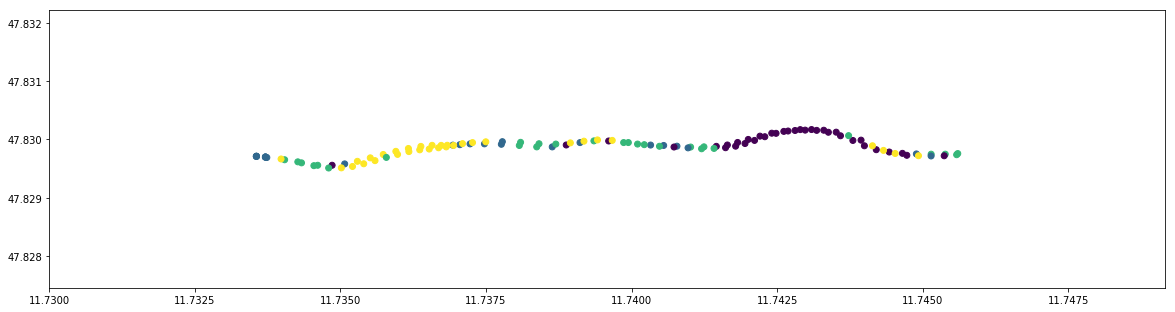

[['score_name', 'score_result'], ['adjusted_rand_score', 0.10315586360125278], ['adjusted_mutual_info_score', 0.17153124298156192], ['homogeneity_score', 0.20292621364978783], ['completeness_score', 0.33075138511229113], ['v_measure_score', 0.25153061097541873], ['fowlkes_mallows_score', 0.2668188002295426], ['silhouette_score', 0.04752126247664625], ['davies_bouldin_score', 3.247380753209855], ['calinski_harabasz_score', 6.944214982786952]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 75
clusters: 4
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([24, 10, 11,  5,  8,  8,  1, 26,  6,  3,  2,  2, 12]))


<Figure size 1200x400 with 0 Axes>

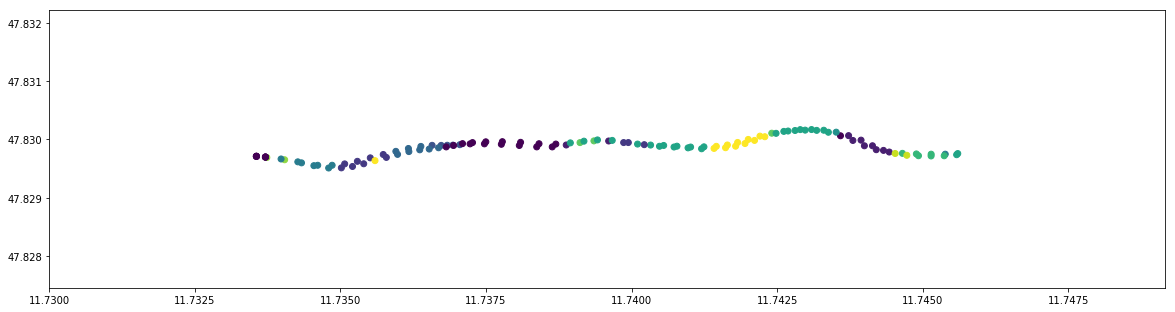


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15]
Input Shape: (300, 6)
(118, 300, 6) data.shape


Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________________________
flatten_86 (Flatten)         (None, 4736)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                71055     
_________________________________________________________________
embedding (Lambda)           (None, 15)     

4/4 [==============================] - 0s 12ms/step - loss: 0.7907
Epoch 80/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7892
Epoch 81/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7880
Epoch 82/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7867
Epoch 83/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7856
Epoch 84/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7848
Epoch 85/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7838
Epoch 86/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7828
Epoch 87/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7817
Epoch 88/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7807
Epoch 89/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7797
Epoch 90/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7785
Epoch 91/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 14ms/step - loss: 0.6429
Epoch 282/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6428
Epoch 283/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6428
Epoch 284/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6428
Epoch 285/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6431
Epoch 286/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6430
Epoch 287/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6427
Epoch 288/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6426
Epoch 289/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6425
Epoch 290/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6425
Epoch 291/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6426
Epoch 292/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6426
Epoch 293/500
4/4 [=======================

4/4 [==============================] - 0s 15ms/step - loss: 0.6353
Epoch 484/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6357
Epoch 485/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6356
Epoch 486/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6357
Epoch 487/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6356
Epoch 488/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6355
Epoch 489/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6355
Epoch 490/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6353
Epoch 491/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6354
Epoch 492/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6356
Epoch 493/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6358
Epoch 494/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6357
Epoch 495/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

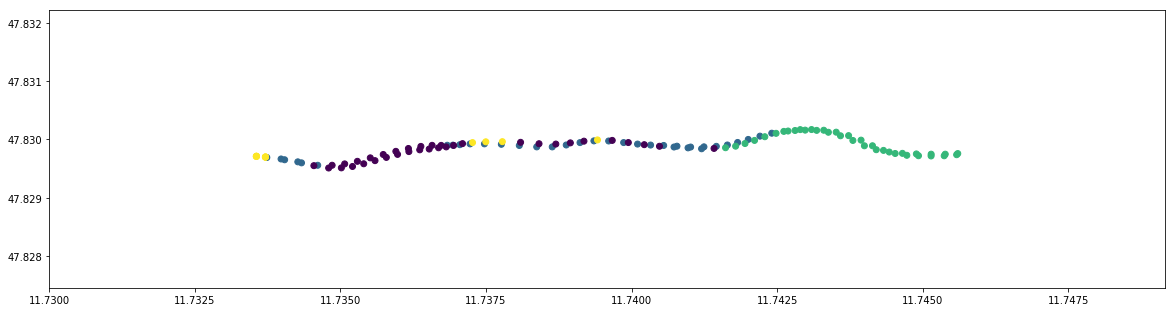

[['score_name', 'score_result'], ['adjusted_rand_score', 0.10202666050385215], ['adjusted_mutual_info_score', 0.23843997759229382], ['homogeneity_score', 0.24724772046037397], ['completeness_score', 0.421418008513388], ['v_measure_score', 0.31164941599683565], ['fowlkes_mallows_score', 0.27515668411750677], ['silhouette_score', 0.08838977673976309], ['davies_bouldin_score', 2.49374205285539], ['calinski_harabasz_score', 11.244497782618582]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (118, 15)
(118, 300, 6) data.shape


Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
______________________________________________________________

4/4 [==============================] - 0s 10ms/step - loss: 0.7171
Epoch 175/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7161
Epoch 176/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7137
Epoch 177/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7110
Epoch 178/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7091
Epoch 179/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7068
Epoch 180/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7046
Epoch 181/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7030
Epoch 182/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7017
Epoch 183/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7006
Epoch 184/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6995
Epoch 185/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6984
Epoch 186/500
4/4 [=======================

4/4 [==============================] - 0s 11ms/step - loss: 0.6596
Epoch 377/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6596
Epoch 378/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6596
Epoch 379/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6596
Epoch 380/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6596
Epoch 381/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6596
Epoch 382/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6596
Epoch 383/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6597
Epoch 384/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6596
Epoch 385/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6597
Epoch 386/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6597
Epoch 387/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6596
Epoch 388/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

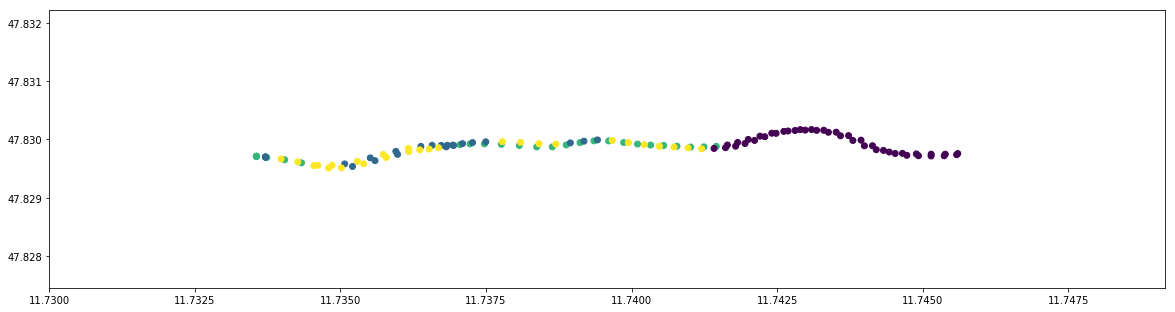

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09979968914261701], ['adjusted_mutual_info_score', 0.21905287657420422], ['homogeneity_score', 0.23648376408853394], ['completeness_score', 0.3907301980659451], ['v_measure_score', 0.29464059653358043], ['fowlkes_mallows_score', 0.267871779465979], ['silhouette_score', 0.06237509431481723], ['davies_bouldin_score', 3.101146018695309], ['calinski_harabasz_score', 10.554683443798421]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 150
clusters: 4
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([24, 10, 11,  5,  8,  8,  1, 26,  6,  3,  2,  2, 12]))


<Figure size 1200x400 with 0 Axes>

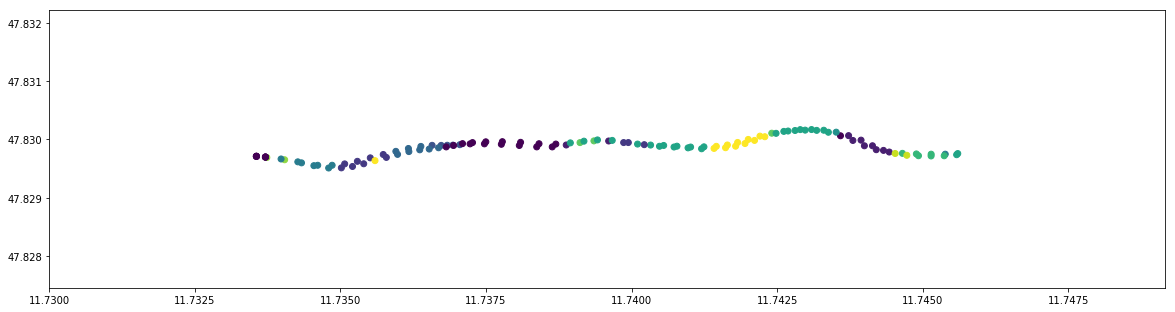


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15]
Input Shape: (300, 6)
(118, 300, 6) data.shape


Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________________________
flatten_88 (Flatten)         (None, 4736)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                71055     
_________________________________________________________________
embedding (Lambda)           (None, 15) 

4/4 [==============================] - 0s 11ms/step - loss: 0.7843
Epoch 80/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7849
Epoch 81/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7842
Epoch 82/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7835
Epoch 83/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7831
Epoch 84/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7826
Epoch 85/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7824
Epoch 86/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7819
Epoch 87/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7816
Epoch 88/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7815
Epoch 89/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7815
Epoch 90/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7809
Epoch 91/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 11ms/step - loss: 0.6424
Epoch 282/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6417
Epoch 283/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6414
Epoch 284/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6412
Epoch 285/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6410
Epoch 286/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6405
Epoch 287/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6404
Epoch 288/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6398
Epoch 289/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6394
Epoch 290/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6392
Epoch 291/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6390
Epoch 292/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6384
Epoch 293/500
4/4 [=======================

4/4 [==============================] - 0s 11ms/step - loss: 0.6084
Epoch 484/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6083
Epoch 485/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6084
Epoch 486/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6086
Epoch 487/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6085
Epoch 488/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6083
Epoch 489/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6083
Epoch 490/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6080
Epoch 491/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6081
Epoch 492/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6083
Epoch 493/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6082
Epoch 494/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6083
Epoch 495/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

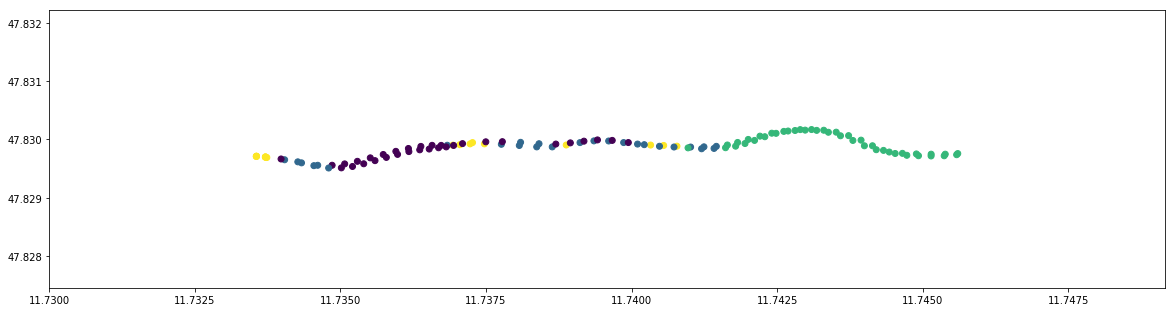

[['score_name', 'score_result'], ['adjusted_rand_score', 0.1076303712850137], ['adjusted_mutual_info_score', 0.21807024417792215], ['homogeneity_score', 0.23474116492613187], ['completeness_score', 0.39232504913304184], ['v_measure_score', 0.29373242250459225], ['fowlkes_mallows_score', 0.2773555909990149], ['silhouette_score', 0.07684635760439981], ['davies_bouldin_score', 2.721465309954495], ['calinski_harabasz_score', 10.778950660904075]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (118, 15)
(118, 300, 6) data.shape


Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________

4/4 [==============================] - 0s 12ms/step - loss: 0.7260
Epoch 175/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7239
Epoch 176/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7227
Epoch 177/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7209
Epoch 178/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7199
Epoch 179/500
4/4 [==============================] - 0s 15ms/step - loss: 0.7185
Epoch 180/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7168
Epoch 181/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7151
Epoch 182/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7132
Epoch 183/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7117
Epoch 184/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7107
Epoch 185/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7094
Epoch 186/500
4/4 [=======================

4/4 [==============================] - 0s 10ms/step - loss: 0.6420
Epoch 377/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6419
Epoch 378/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6418
Epoch 379/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6414
Epoch 380/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6414
Epoch 381/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6414
Epoch 382/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6412
Epoch 383/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6411
Epoch 384/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6412
Epoch 385/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6411
Epoch 386/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6411
Epoch 387/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6413
Epoch 388/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

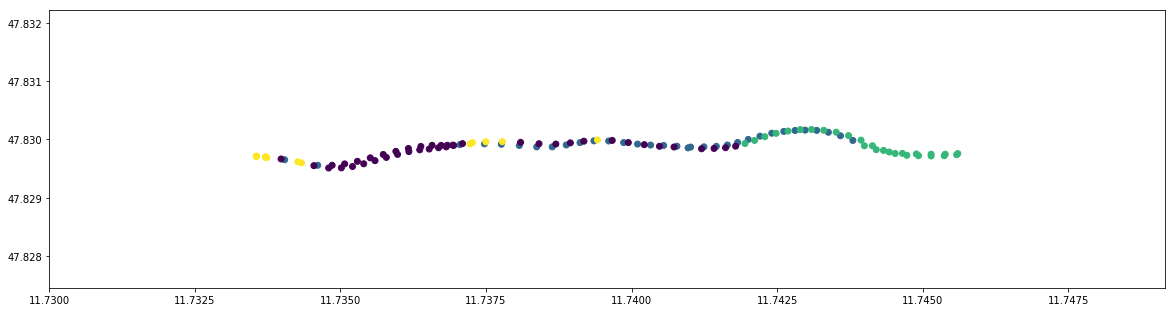

[['score_name', 'score_result'], ['adjusted_rand_score', 0.10310183836002015], ['adjusted_mutual_info_score', 0.238171275327765], ['homogeneity_score', 0.24856261777156596], ['completeness_score', 0.4183129678987478], ['v_measure_score', 0.31183317723108056], ['fowlkes_mallows_score', 0.2746914305482877], ['silhouette_score', 0.08492469733476482], ['davies_bouldin_score', 2.454549367504664], ['calinski_harabasz_score', 11.569399262872258]]
----------------------------------------------------------------
window_length: 50
sub_sample_length: 25
clusters: 6
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([130,  61,  64,  58,  38,  43,  30, 132,  22,  46,  20,  16,  76]))


<Figure size 1200x400 with 0 Axes>

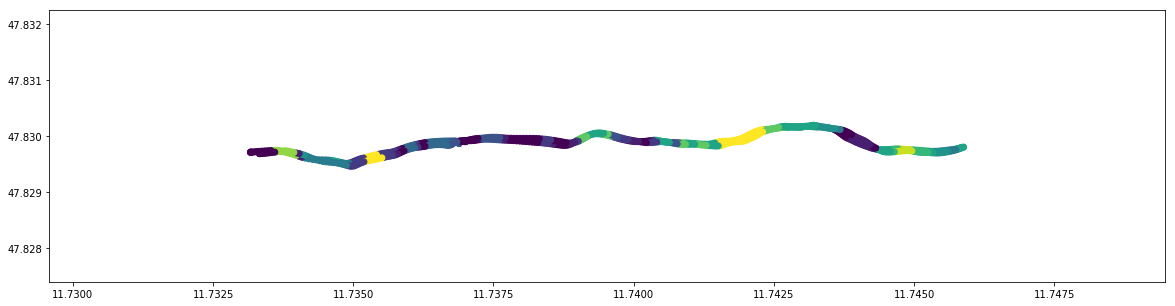


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15]
Input Shape: (52, 6)
(736, 52, 6) data.shape


Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
_________________________________________________________________
flatten_90 (Flatten)         (None, 768)               0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                11535     
_________________________________________________________________
embedding (Lambda)           (None, 15

23/23 [==============================] - 0s 10ms/step - loss: 0.6937
Epoch 177/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6938
Epoch 178/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6935
Epoch 179/500
23/23 [==============================] - 0s 9ms/step - loss: 0.6933
Epoch 180/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6930
Epoch 181/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6932
Epoch 182/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6933
Epoch 183/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6931
Epoch 184/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6929
Epoch 185/500
23/23 [==============================] - 0s 12ms/step - loss: 0.6928
Epoch 186/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6928
Epoch 187/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6926
Epoch 188/500
23/23

23/23 [==============================] - 0s 10ms/step - loss: 0.6898
Epoch 373/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6898
Epoch 374/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6897
Epoch 375/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6898
Epoch 376/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6899
Epoch 377/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6898
Epoch 378/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6899
Epoch 379/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6899
Epoch 380/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6899
Epoch 381/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6898
Epoch 382/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6898
Epoch 383/500
23/23 [==============================] - 0s 9ms/step - loss: 0.6897
Epoch 384/500
23/23

<Figure size 1200x400 with 0 Axes>

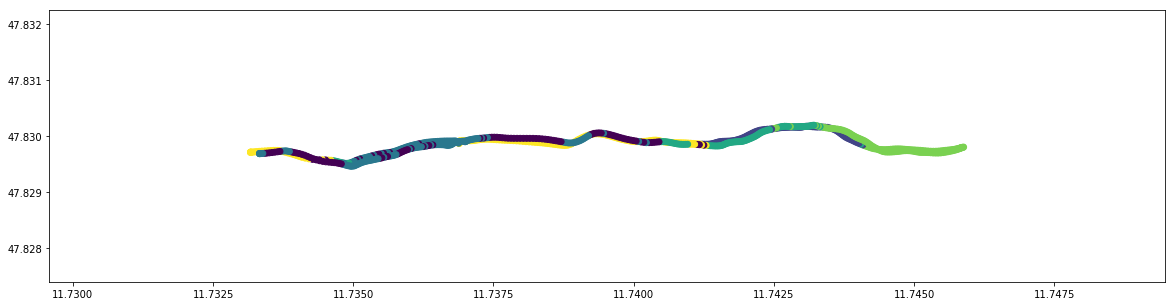

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09504379276543953], ['adjusted_mutual_info_score', 0.23135304077205823], ['homogeneity_score', 0.21539993019732492], ['completeness_score', 0.29004798560959794], ['v_measure_score', 0.24721168650756714], ['fowlkes_mallows_score', 0.22159864896827466], ['silhouette_score', 0.05575389698398856], ['davies_bouldin_score', 3.3390062972757533], ['calinski_harabasz_score', 57.98737061593573]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (736, 15)
(736, 52, 6) data.shape


Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
____________________________________________________

23/23 [==============================] - 0s 11ms/step - loss: 0.6591
Epoch 171/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6586
Epoch 172/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6584
Epoch 173/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6583
Epoch 174/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6580
Epoch 175/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6576
Epoch 176/500
23/23 [==============================] - 0s 9ms/step - loss: 0.6573
Epoch 177/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6574
Epoch 178/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6570
Epoch 179/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6570
Epoch 180/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6569
Epoch 181/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6568
Epoch 182/500
23/23

Epoch 367/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6446
Epoch 368/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6444
Epoch 369/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6444
Epoch 370/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6445
Epoch 371/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6444
Epoch 372/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6443
Epoch 373/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6442
Epoch 374/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6442
Epoch 375/500
23/23 [==============================] - 0s 9ms/step - loss: 0.6445
Epoch 376/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6446
Epoch 377/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6445
Epoch 378/500
23/23 [==============================] - 0s 9ms/step - loss: 0.6445
Epoch 

<Figure size 1200x400 with 0 Axes>

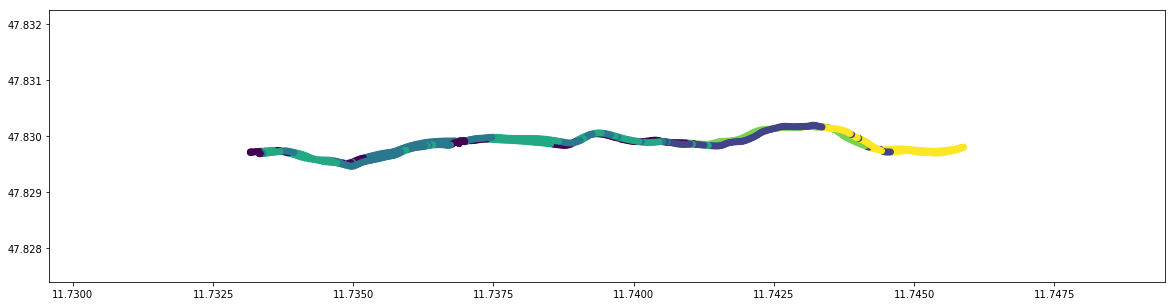

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09200818490886624], ['adjusted_mutual_info_score', 0.23124743309994938], ['homogeneity_score', 0.21556368983501148], ['completeness_score', 0.28937103352954074], ['v_measure_score', 0.2470730763111457], ['fowlkes_mallows_score', 0.21831479493876993], ['silhouette_score', 0.06427510035556262], ['davies_bouldin_score', 3.3523986365967313], ['calinski_harabasz_score', 58.33712235415267]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 25
clusters: 6
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([44, 14, 16, 17, 17, 15, 11, 49,  6, 13,  7,  6, 24]))


<Figure size 1200x400 with 0 Axes>

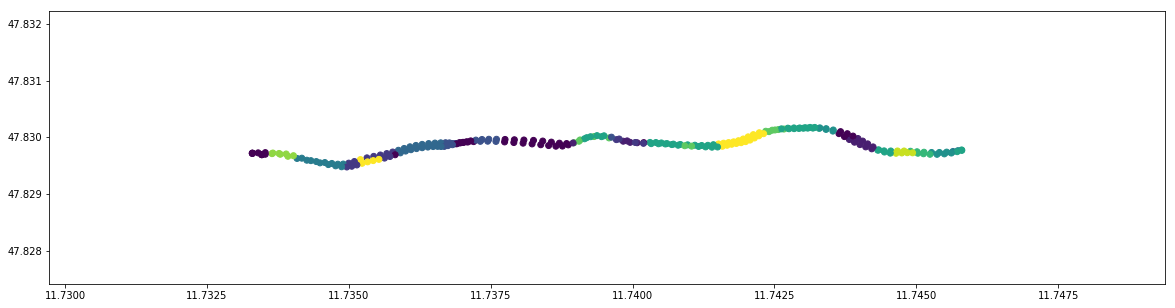


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15]
Input Shape: (152, 6)
(239, 152, 6) data.shape


Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________________________
flatten_92 (Flatten)         (None, 2432)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                36495     
_________________________________________________________________
embedding (Lambda)           (N

8/8 [==============================] - 0s 10ms/step - loss: 0.7614
Epoch 182/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7611
Epoch 183/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7606
Epoch 184/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7604
Epoch 185/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7600
Epoch 186/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7597
Epoch 187/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7594
Epoch 188/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7590
Epoch 189/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7587
Epoch 190/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7584
Epoch 191/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7580
Epoch 192/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7572
Epoch 193/500
8/8 [==============================

Epoch 283/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7340
Epoch 284/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7339
Epoch 285/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7337
Epoch 286/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7337
Epoch 287/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7338
Epoch 288/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7337
Epoch 289/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7336
Epoch 290/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7336
Epoch 291/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7336
Epoch 292/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7336
Epoch 293/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7336
Epoch 294/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7335
Epoch 295/500
8/8 [===================

8/8 [==============================] - 0s 9ms/step - loss: 0.7320
Epoch 487/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7321
Epoch 488/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7320
Epoch 489/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7321
Epoch 490/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7321
Epoch 491/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7320
Epoch 492/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7320
Epoch 493/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7319
Epoch 494/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7320
Epoch 495/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7321
Epoch 496/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7324
Epoch 497/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7325
Epoch 498/500
8/8 [==============================

<Figure size 1200x400 with 0 Axes>

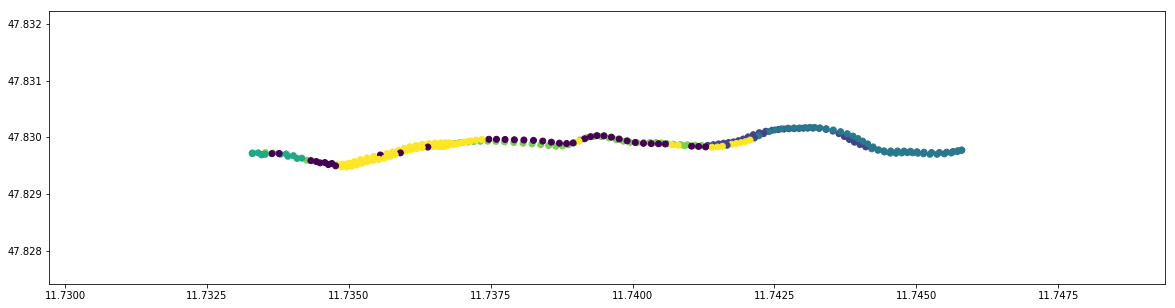

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09510649502084721], ['adjusted_mutual_info_score', 0.23643088649069194], ['homogeneity_score', 0.2513018576927546], ['completeness_score', 0.34215128070078354], ['v_measure_score', 0.28977267753547115], ['fowlkes_mallows_score', 0.22706297313979593], ['silhouette_score', 0.06195763665784927], ['davies_bouldin_score', 2.6809783076658213], ['calinski_harabasz_score', 18.33163243351132]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (239, 15)
(239, 152, 6) data.shape


Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
________________________________________________

8/8 [==============================] - 0s 10ms/step - loss: 0.7410
Epoch 176/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7409
Epoch 177/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7406
Epoch 178/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7403
Epoch 179/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7401
Epoch 180/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7401
Epoch 181/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7400
Epoch 182/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7399
Epoch 183/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7397
Epoch 184/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7395
Epoch 185/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7395
Epoch 186/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7394
Epoch 187/500
8/8 [==========================

8/8 [==============================] - 0s 9ms/step - loss: 0.7346
Epoch 278/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7345
Epoch 279/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7344
Epoch 280/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7344
Epoch 281/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7343
Epoch 282/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7342
Epoch 283/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7341
Epoch 284/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7341
Epoch 285/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7341
Epoch 286/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7341
Epoch 287/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7341
Epoch 288/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7342
Epoch 289/500
8/8 [==============================]

8/8 [==============================] - 0s 9ms/step - loss: 0.7329
Epoch 380/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7329
Epoch 381/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7329
Epoch 382/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7329
Epoch 383/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7329
Epoch 384/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7329
Epoch 385/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7329
Epoch 386/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7328
Epoch 387/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7328
Epoch 388/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7328
Epoch 389/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7328
Epoch 390/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7328
Epoch 391/500
8/8 [==============================] -

<Figure size 1200x400 with 0 Axes>

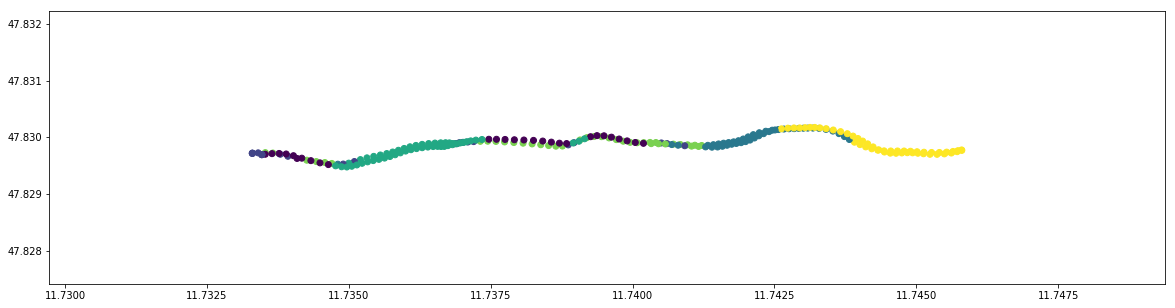

[['score_name', 'score_result'], ['adjusted_rand_score', 0.13938047151206154], ['adjusted_mutual_info_score', 0.2759104239018555], ['homogeneity_score', 0.28487634080565505], ['completeness_score', 0.3822165845008582], ['v_measure_score', 0.3264446611776317], ['fowlkes_mallows_score', 0.26330180006049553], ['silhouette_score', 0.06926841964448849], ['davies_bouldin_score', 2.707944482074939], ['calinski_harabasz_score', 19.45863757834683]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 75
clusters: 6
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([44, 14, 16, 17, 17, 15, 11, 49,  6, 13,  7,  6, 24]))


<Figure size 1200x400 with 0 Axes>

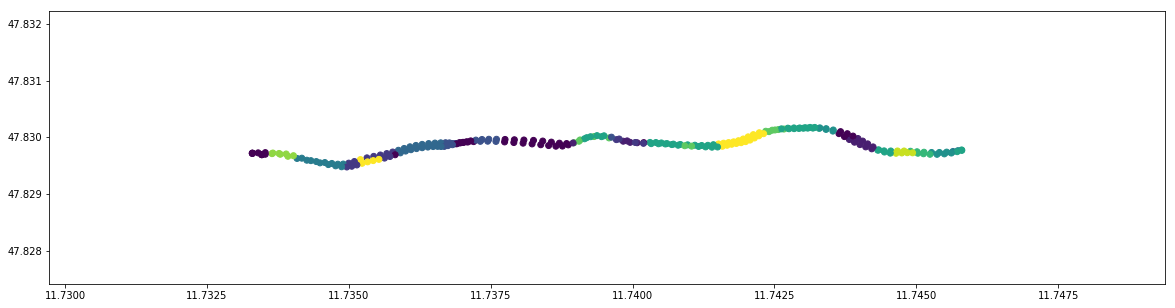


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15  15]
Input Shape: (152, 6)
(239, 152, 6) data.shape


Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________________________
flatten_94 (Flatten)         (None, 2432)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                36495     
_________________________________________________________________
embedding (Lambda)         

8/8 [==============================] - 0s 9ms/step - loss: 0.7225
Epoch 182/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7210
Epoch 183/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7199
Epoch 184/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7184
Epoch 185/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7174
Epoch 186/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7172
Epoch 187/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7169
Epoch 188/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7161
Epoch 189/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7153
Epoch 190/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7143
Epoch 191/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7136
Epoch 192/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7125
Epoch 193/500
8/8 [==============================]

8/8 [==============================] - 0s 10ms/step - loss: 0.6745
Epoch 284/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6752
Epoch 285/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6747
Epoch 286/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6744
Epoch 287/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6740
Epoch 288/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6742
Epoch 289/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6743
Epoch 290/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6743
Epoch 291/500
8/8 [==============================] - 0s 8ms/step - loss: 0.6740
Epoch 292/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6732
Epoch 293/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6725
Epoch 294/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6721
Epoch 295/500
8/8 [==============================

8/8 [==============================] - 0s 10ms/step - loss: 0.6613
Epoch 386/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6610
Epoch 387/500
8/8 [==============================] - 0s 8ms/step - loss: 0.6609
Epoch 388/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6606
Epoch 389/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6605
Epoch 390/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6605
Epoch 391/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6601
Epoch 392/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6601
Epoch 393/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6596
Epoch 394/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6592
Epoch 395/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6591
Epoch 396/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6591
Epoch 397/500
8/8 [==============================

8/8 [==============================] - 0s 10ms/step - loss: 0.6505
Epoch 488/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6501
Epoch 489/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6502
Epoch 490/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6505
Epoch 491/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6506
Epoch 492/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6503
Epoch 493/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6499
Epoch 494/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6497
Epoch 495/500
8/8 [==============================] - 0s 8ms/step - loss: 0.6494
Epoch 496/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6493
Epoch 497/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6492
Epoch 498/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6490
Epoch 499/500
8/8 [============================

<Figure size 1200x400 with 0 Axes>

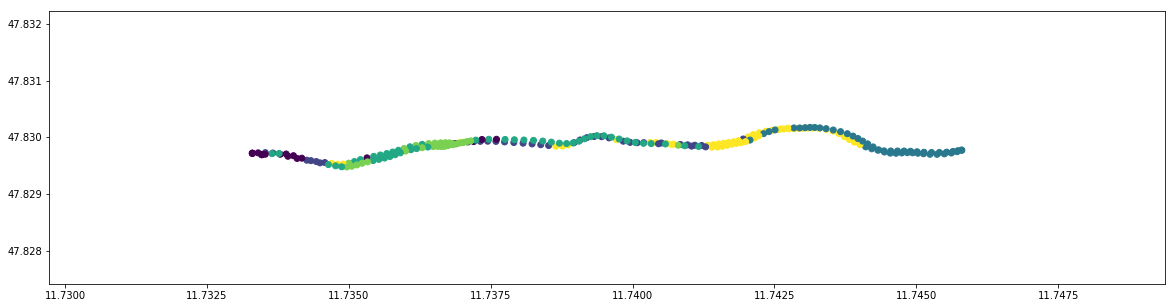

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08351744189910706], ['adjusted_mutual_info_score', 0.19731336210208053], ['homogeneity_score', 0.22062772729423383], ['completeness_score', 0.2976861038957773], ['v_measure_score', 0.253428732159468], ['fowlkes_mallows_score', 0.21511841181697908], ['silhouette_score', 0.06469295348523287], ['davies_bouldin_score', 2.690373211862374], ['calinski_harabasz_score', 18.23110197808388]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (239, 15)
(239, 152, 6) data.shape


Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_______________________________________________

Epoch 175/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7413
Epoch 176/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7414
Epoch 177/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7414
Epoch 178/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7412
Epoch 179/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7411
Epoch 180/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7405
Epoch 181/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7401
Epoch 182/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7395
Epoch 183/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7388
Epoch 184/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7387
Epoch 185/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7382
Epoch 186/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7380
Epoch 187/500
8/8 [===========

8/8 [==============================] - 0s 10ms/step - loss: 0.7154
Epoch 378/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7154
Epoch 379/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7154
Epoch 380/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7155
Epoch 381/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7155
Epoch 382/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7153
Epoch 383/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7152
Epoch 384/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7151
Epoch 385/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7150
Epoch 386/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7150
Epoch 387/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7150
Epoch 388/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7149
Epoch 389/500
8/8 [============================

<Figure size 1200x400 with 0 Axes>

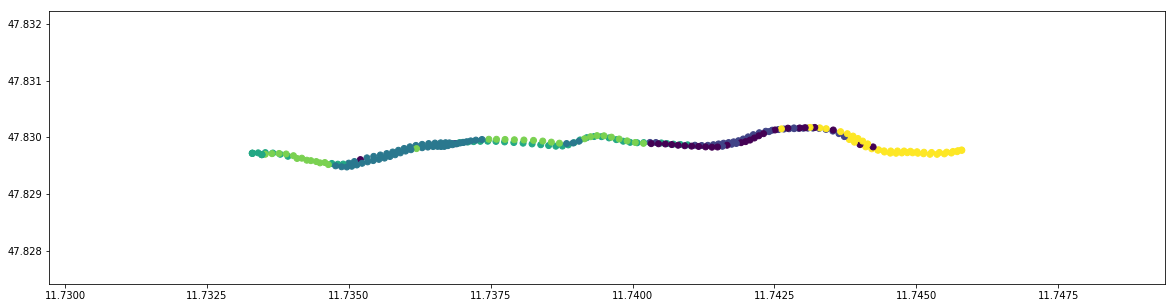

[['score_name', 'score_result'], ['adjusted_rand_score', 0.1465838839409392], ['adjusted_mutual_info_score', 0.2864375300073304], ['homogeneity_score', 0.29431487668432504], ['completeness_score', 0.39176608993767614], ['v_measure_score', 0.3361194787746786], ['fowlkes_mallows_score', 0.26782766534841423], ['silhouette_score', 0.05289067055500025], ['davies_bouldin_score', 3.3484414962225713], ['calinski_harabasz_score', 18.51136332655398]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 150
clusters: 6
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([44, 14, 16, 17, 17, 15, 11, 49,  6, 13,  7,  6, 24]))


<Figure size 1200x400 with 0 Axes>

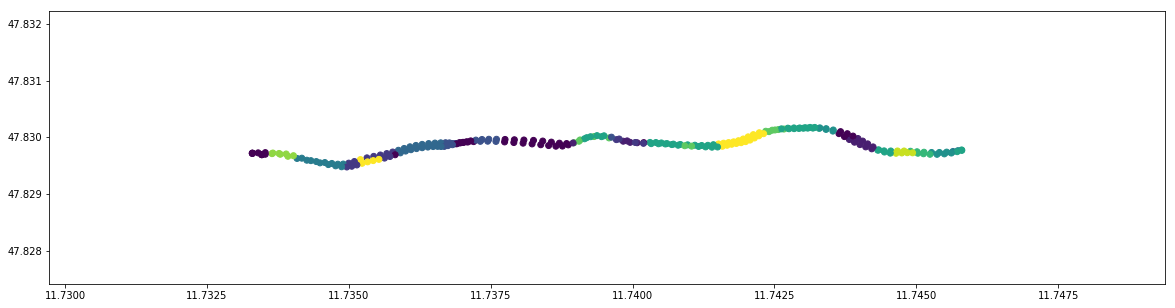


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15  15  15]
Input Shape: (152, 6)
(239, 152, 6) data.shape


Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________________________
flatten_96 (Flatten)         (None, 2432)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                36495     
_________________________________________________________________
embedding (Lambda)     

8/8 [==============================] - 0s 11ms/step - loss: 0.7678
Epoch 181/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7673
Epoch 182/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7669
Epoch 183/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7665
Epoch 184/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7663
Epoch 185/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7662
Epoch 186/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7662
Epoch 187/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7660
Epoch 188/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7658
Epoch 189/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7657
Epoch 190/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7656
Epoch 191/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7654
Epoch 192/500
8/8 [=========================

8/8 [==============================] - 0s 9ms/step - loss: 0.7511
Epoch 383/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7512
Epoch 384/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7512
Epoch 385/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7511
Epoch 386/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7511
Epoch 387/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7510
Epoch 388/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7509
Epoch 389/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7509
Epoch 390/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7509
Epoch 391/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7508
Epoch 392/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7508
Epoch 393/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7509
Epoch 394/500
8/8 [==========================

<Figure size 1200x400 with 0 Axes>

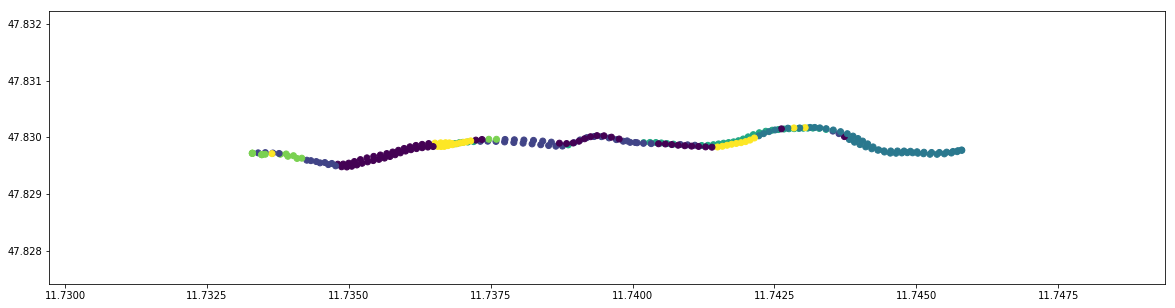

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08780991887009587], ['adjusted_mutual_info_score', 0.2205636684904025], ['homogeneity_score', 0.23829161983256933], ['completeness_score', 0.32541061028493884], ['v_measure_score', 0.2751190869666726], ['fowlkes_mallows_score', 0.22131521044836414], ['silhouette_score', 0.0693757168331507], ['davies_bouldin_score', 2.6795956358843367], ['calinski_harabasz_score', 17.92410913634162]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (239, 15)
(239, 152, 6) data.shape


Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
__________________________________________

8/8 [==============================] - 0s 11ms/step - loss: 0.7783
Epoch 175/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7776
Epoch 176/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7767
Epoch 177/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7765
Epoch 178/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7764
Epoch 179/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7760
Epoch 180/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7755
Epoch 181/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7750
Epoch 182/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7744
Epoch 183/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7739
Epoch 184/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7736
Epoch 185/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7731
Epoch 186/500
8/8 [=======================

8/8 [==============================] - 0s 10ms/step - loss: 0.7586
Epoch 377/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7585
Epoch 378/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7584
Epoch 379/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7582
Epoch 380/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7581
Epoch 381/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7580
Epoch 382/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7579
Epoch 383/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7579
Epoch 384/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7578
Epoch 385/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7577
Epoch 386/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7576
Epoch 387/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7576
Epoch 388/500
8/8 [==========================

<Figure size 1200x400 with 0 Axes>

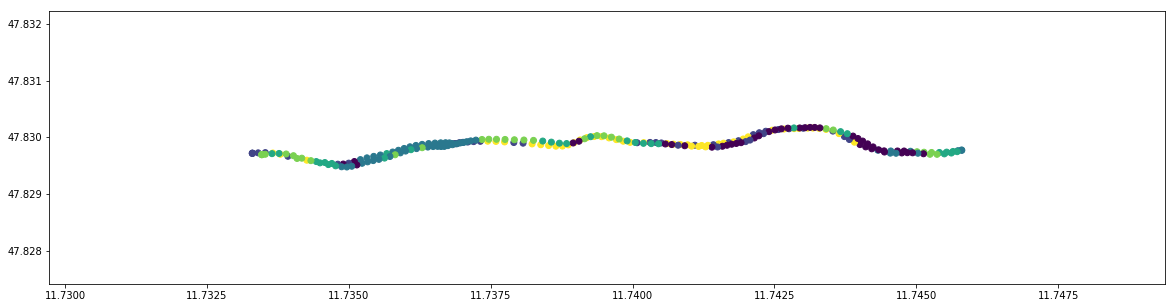

[['score_name', 'score_result'], ['adjusted_rand_score', 0.06466392162449901], ['adjusted_mutual_info_score', 0.1454646457421803], ['homogeneity_score', 0.17972807554549386], ['completeness_score', 0.23816461503850067], ['v_measure_score', 0.2048605725268101], ['fowlkes_mallows_score', 0.1942262135701079], ['silhouette_score', 0.01402328405796875], ['davies_bouldin_score', 4.249099297850381], ['calinski_harabasz_score', 9.67100809320446]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 25
clusters: 6
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([24, 10, 11,  5,  8,  8,  1, 26,  6,  3,  2,  2, 12]))


<Figure size 1200x400 with 0 Axes>

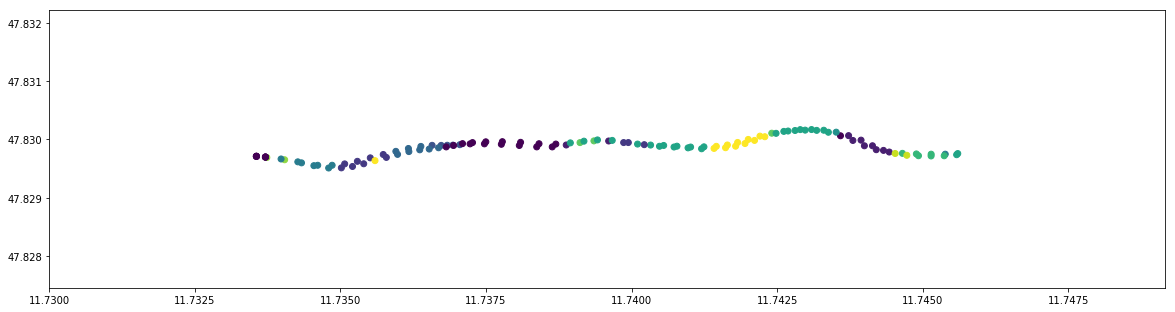


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15  15  15  15]
Input Shape: (300, 6)
(118, 300, 6) data.shape


Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________________________
flatten_98 (Flatten)         (None, 4736)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                71055     
_________________________________________________________________
embedding (Lambda) 

4/4 [==============================] - 0s 11ms/step - loss: 0.6944
Epoch 180/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6921
Epoch 181/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6901
Epoch 182/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6892
Epoch 183/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6876
Epoch 184/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6863
Epoch 185/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6851
Epoch 186/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6836
Epoch 187/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6825
Epoch 188/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6813
Epoch 189/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6797
Epoch 190/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6786
Epoch 191/500
4/4 [=======================

4/4 [==============================] - 0s 11ms/step - loss: 0.6262
Epoch 281/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6257
Epoch 282/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6254
Epoch 283/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6252
Epoch 284/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6249
Epoch 285/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6247
Epoch 286/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6244
Epoch 287/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6243
Epoch 288/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6241
Epoch 289/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6239
Epoch 290/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6238
Epoch 291/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6238
Epoch 292/500
4/4 [=======================

4/4 [==============================] - 0s 12ms/step - loss: 0.6040
Epoch 483/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6040
Epoch 484/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6041
Epoch 485/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6041
Epoch 486/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6041
Epoch 487/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6040
Epoch 488/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6040
Epoch 489/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6040
Epoch 490/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6040
Epoch 491/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6040
Epoch 492/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6040
Epoch 493/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6039
Epoch 494/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

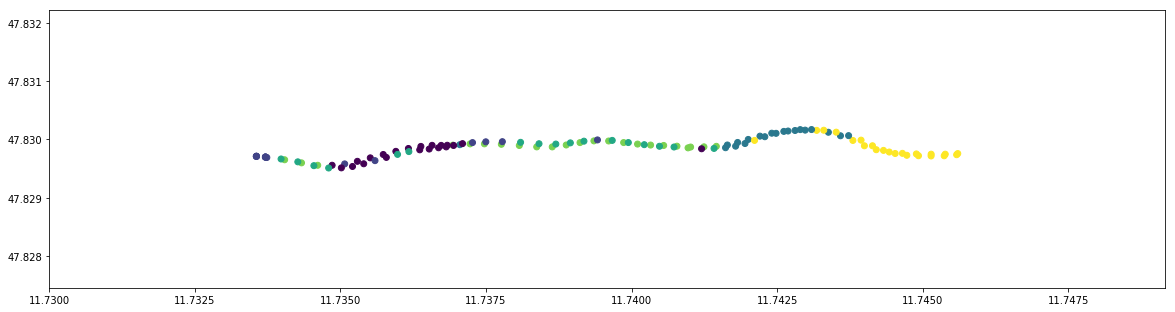

[['score_name', 'score_result'], ['adjusted_rand_score', 0.13763118578760558], ['adjusted_mutual_info_score', 0.2386971489347365], ['homogeneity_score', 0.3097163857658999], ['completeness_score', 0.3898937038950055], ['v_measure_score', 0.3452107697925586], ['fowlkes_mallows_score', 0.2613299518885476], ['silhouette_score', 0.06287049590974605], ['davies_bouldin_score', 2.7138102572131046], ['calinski_harabasz_score', 9.189470088241874]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (118, 15)
(118, 300, 6) data.shape


Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
________________________________________

4/4 [==============================] - 0s 14ms/step - loss: 0.6769
Epoch 175/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6770
Epoch 176/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6756
Epoch 177/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6758
Epoch 178/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6759
Epoch 179/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6751
Epoch 180/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6761
Epoch 181/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6739
Epoch 182/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6738
Epoch 183/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6733
Epoch 184/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6719
Epoch 185/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6699
Epoch 186/500
4/4 [=======================

4/4 [==============================] - 0s 13ms/step - loss: 0.5897
Epoch 377/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5896
Epoch 378/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5896
Epoch 379/500
4/4 [==============================] - 0s 14ms/step - loss: 0.5894
Epoch 380/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5895
Epoch 381/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5894
Epoch 382/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5893
Epoch 383/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5892
Epoch 384/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5895
Epoch 385/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5894
Epoch 386/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5897
Epoch 387/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5896
Epoch 388/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

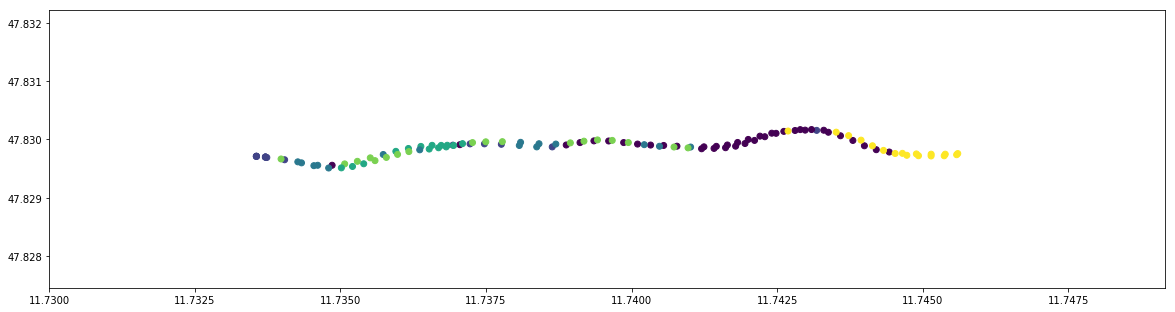

[['score_name', 'score_result'], ['adjusted_rand_score', 0.17888377955586243], ['adjusted_mutual_info_score', 0.3052768033715244], ['homogeneity_score', 0.3555740040867195], ['completeness_score', 0.4644019951618867], ['v_measure_score', 0.4027661226106407], ['fowlkes_mallows_score', 0.308630762986546], ['silhouette_score', 0.07229592423672053], ['davies_bouldin_score', 2.8048057195038005], ['calinski_harabasz_score', 8.958314356639884]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 75
clusters: 6
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([24, 10, 11,  5,  8,  8,  1, 26,  6,  3,  2,  2, 12]))


<Figure size 1200x400 with 0 Axes>

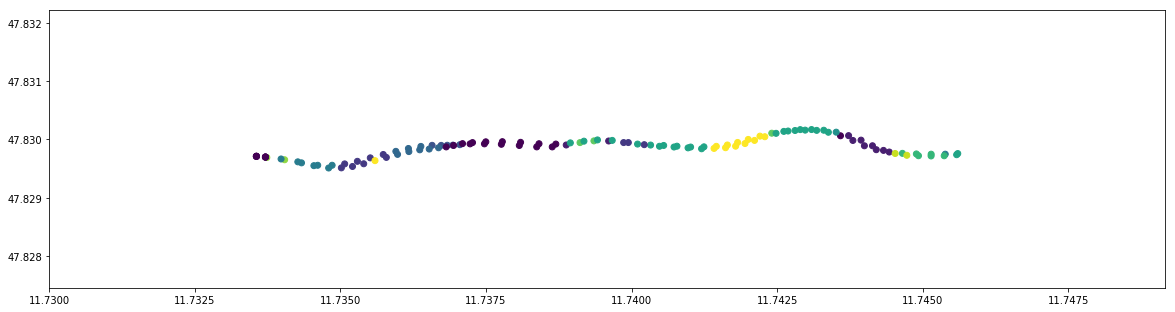


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15  15  15  15  15]
Input Shape: (300, 6)
(118, 300, 6) data.shape


Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________________________
flatten_100 (Flatten)        (None, 4736)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                71055     
_________________________________________________________________
embedding (Lam

4/4 [==============================] - 0s 14ms/step - loss: 0.6662
Epoch 180/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6654
Epoch 181/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6647
Epoch 182/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6643
Epoch 183/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6637
Epoch 184/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6633
Epoch 185/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6623
Epoch 186/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6615
Epoch 187/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6608
Epoch 188/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6606
Epoch 189/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6599
Epoch 190/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6592
Epoch 191/500
4/4 [=======================

4/4 [==============================] - 0s 13ms/step - loss: 0.6193
Epoch 382/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6195
Epoch 383/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6195
Epoch 384/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6195
Epoch 385/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6198
Epoch 386/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6198
Epoch 387/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6197
Epoch 388/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6197
Epoch 389/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6198
Epoch 390/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6196
Epoch 391/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6198
Epoch 392/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6194
Epoch 393/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

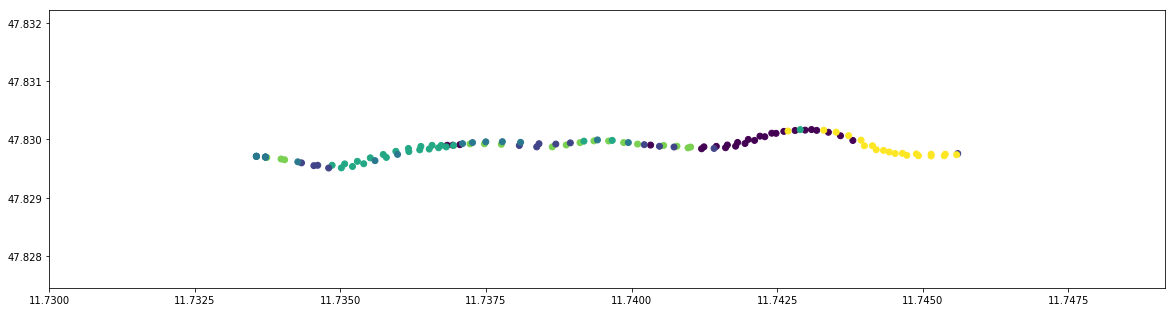

[['score_name', 'score_result'], ['adjusted_rand_score', 0.1865063775816858], ['adjusted_mutual_info_score', 0.29478465906992146], ['homogeneity_score', 0.35214369126197964], ['completeness_score', 0.4456905514061814], ['v_measure_score', 0.39343289003963694], ['fowlkes_mallows_score', 0.30518380491879227], ['silhouette_score', 0.0647379693054114], ['davies_bouldin_score', 2.7104403275801996], ['calinski_harabasz_score', 8.649623513467395]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (118, 15)
(118, 300, 6) data.shape


Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________

4/4 [==============================] - 0s 13ms/step - loss: 0.6649
Epoch 175/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6642
Epoch 176/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6632
Epoch 177/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6624
Epoch 178/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6614
Epoch 179/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6618
Epoch 180/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6617
Epoch 181/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6603
Epoch 182/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6590
Epoch 183/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6573
Epoch 184/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6557
Epoch 185/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6545
Epoch 186/500
4/4 [=======================

4/4 [==============================] - 0s 14ms/step - loss: 0.5964
Epoch 377/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5963
Epoch 378/500
4/4 [==============================] - 0s 14ms/step - loss: 0.5963
Epoch 379/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5961
Epoch 380/500
4/4 [==============================] - 0s 14ms/step - loss: 0.5960
Epoch 381/500
4/4 [==============================] - 0s 16ms/step - loss: 0.5959
Epoch 382/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5959
Epoch 383/500
4/4 [==============================] - 0s 14ms/step - loss: 0.5961
Epoch 384/500
4/4 [==============================] - 0s 14ms/step - loss: 0.5962
Epoch 385/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5962
Epoch 386/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5960
Epoch 387/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5958
Epoch 388/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

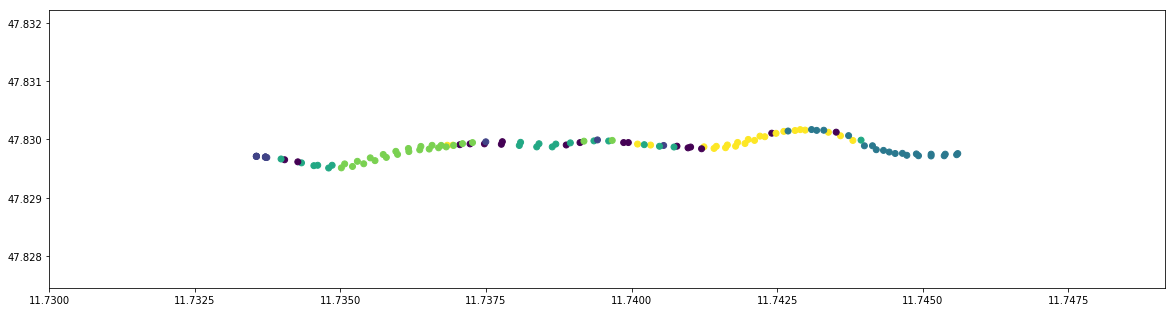

[['score_name', 'score_result'], ['adjusted_rand_score', 0.16665024007726262], ['adjusted_mutual_info_score', 0.2994811581012748], ['homogeneity_score', 0.35511442201678806], ['completeness_score', 0.4510218016544943], ['v_measure_score', 0.397362980867155], ['fowlkes_mallows_score', 0.28864607953010757], ['silhouette_score', 0.069209168479513], ['davies_bouldin_score', 2.856144934760381], ['calinski_harabasz_score', 8.819353479986729]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 150
clusters: 6
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([24, 10, 11,  5,  8,  8,  1, 26,  6,  3,  2,  2, 12]))


<Figure size 1200x400 with 0 Axes>

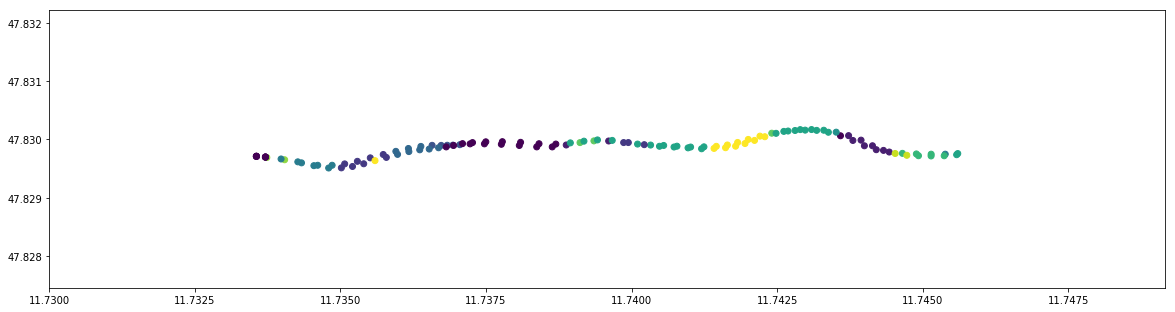


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15  15  15  15  15  15]
Input Shape: (300, 6)
(118, 300, 6) data.shape


Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________________________
flatten_102 (Flatten)        (None, 4736)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                71055     
_________________________________________________________________
embedding 

4/4 [==============================] - 0s 11ms/step - loss: 0.7505
Epoch 180/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7500
Epoch 181/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7494
Epoch 182/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7489
Epoch 183/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7483
Epoch 184/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7478
Epoch 185/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7474
Epoch 186/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7476
Epoch 187/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7470
Epoch 188/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7464
Epoch 189/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7459
Epoch 190/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7458
Epoch 191/500
4/4 [=======================

4/4 [==============================] - 0s 12ms/step - loss: 0.6974
Epoch 382/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6973
Epoch 383/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6973
Epoch 384/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6973
Epoch 385/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6972
Epoch 386/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6972
Epoch 387/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6971
Epoch 388/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6971
Epoch 389/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6971
Epoch 390/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6971
Epoch 391/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6970
Epoch 392/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6970
Epoch 393/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

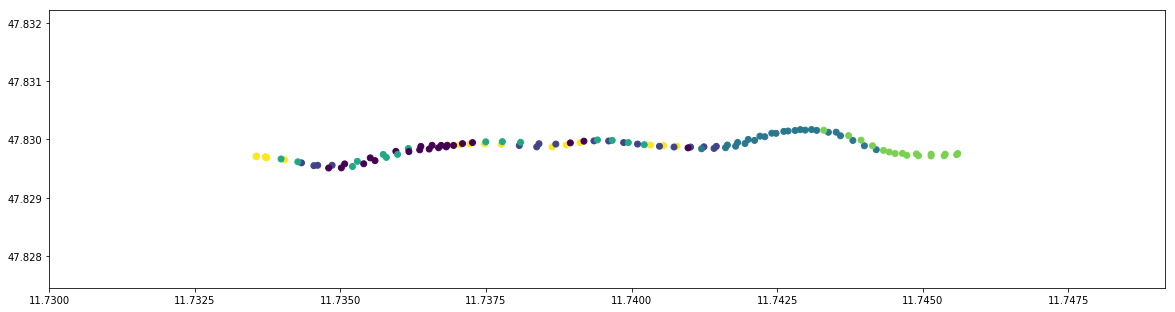

[['score_name', 'score_result'], ['adjusted_rand_score', 0.14143349870966415], ['adjusted_mutual_info_score', 0.24914573219217015], ['homogeneity_score', 0.3174696545122865], ['completeness_score', 0.40054512848166274], ['v_measure_score', 0.3542014080139753], ['fowlkes_mallows_score', 0.2652577374837718], ['silhouette_score', 0.05731734903011329], ['davies_bouldin_score', 2.7288448045798255], ['calinski_harabasz_score', 9.217637471001586]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (118, 15)
(118, 300, 6) data.shape


Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_____________________________

4/4 [==============================] - 0s 11ms/step - loss: 0.8086
Epoch 74/500
4/4 [==============================] - 0s 11ms/step - loss: 0.8081
Epoch 75/500
4/4 [==============================] - 0s 14ms/step - loss: 0.8081
Epoch 76/500
4/4 [==============================] - 0s 13ms/step - loss: 0.8067
Epoch 77/500
4/4 [==============================] - 0s 15ms/step - loss: 0.8058
Epoch 78/500
4/4 [==============================] - 0s 14ms/step - loss: 0.8051
Epoch 79/500
4/4 [==============================] - 0s 13ms/step - loss: 0.8043
Epoch 80/500
4/4 [==============================] - 0s 12ms/step - loss: 0.8033
Epoch 81/500
4/4 [==============================] - 0s 11ms/step - loss: 0.8024
Epoch 82/500
4/4 [==============================] - 0s 14ms/step - loss: 0.8014
Epoch 83/500
4/4 [==============================] - 0s 14ms/step - loss: 0.8005
Epoch 84/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7998
Epoch 85/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 13ms/step - loss: 0.6310
Epoch 276/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6310
Epoch 277/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6311
Epoch 278/500
4/4 [==============================] - 0s 16ms/step - loss: 0.6309
Epoch 279/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6307
Epoch 280/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6305
Epoch 281/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6306
Epoch 282/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6305
Epoch 283/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6304
Epoch 284/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6303
Epoch 285/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6307
Epoch 286/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6309
Epoch 287/500
4/4 [=======================

4/4 [==============================] - 0s 13ms/step - loss: 0.6201
Epoch 478/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6201
Epoch 479/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6201
Epoch 480/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6201
Epoch 481/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6201
Epoch 482/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6201
Epoch 483/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6201
Epoch 484/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6202
Epoch 485/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6201
Epoch 486/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6201
Epoch 487/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6202
Epoch 488/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6202
Epoch 489/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

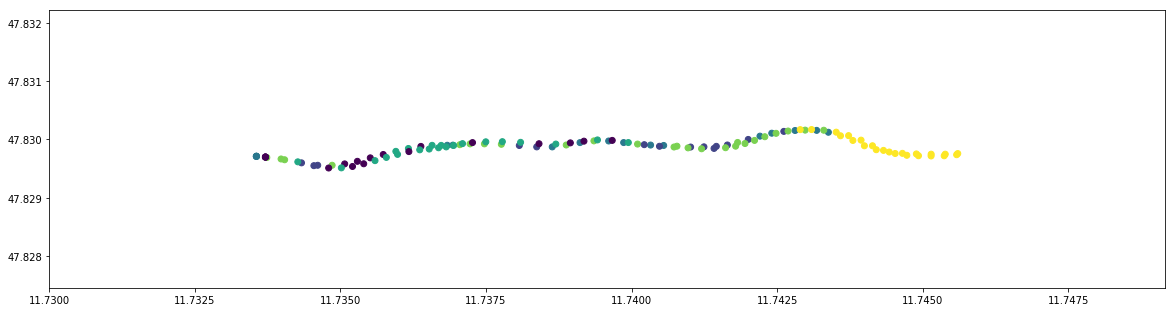

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08959346253053024], ['adjusted_mutual_info_score', 0.18932398464319197], ['homogeneity_score', 0.27107192923860196], ['completeness_score', 0.3427242501050718], ['v_measure_score', 0.30271587474583217], ['fowlkes_mallows_score', 0.22077955966306922], ['silhouette_score', 0.02908022868185899], ['davies_bouldin_score', 4.226171602365067], ['calinski_harabasz_score', 6.384336426786332]]
----------------------------------------------------------------
window_length: 50
sub_sample_length: 25
clusters: 9
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([130,  61,  64,  58,  38,  43,  30, 132,  22,  46,  20,  16,  76]))


<Figure size 1200x400 with 0 Axes>

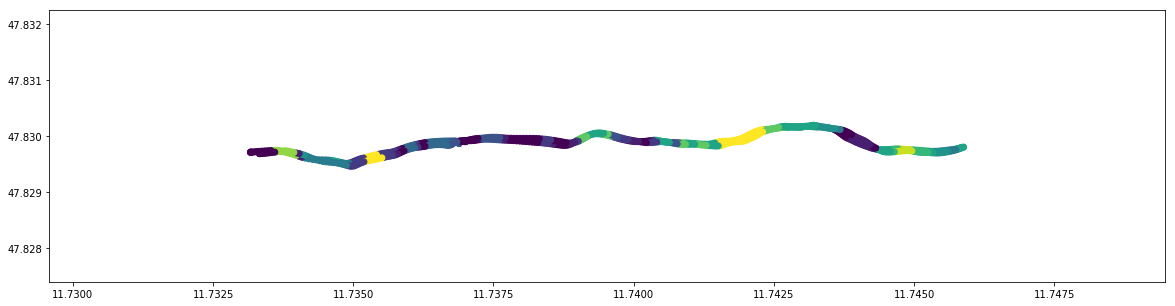


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15  15  15  15  15  15  15]
Input Shape: (52, 6)
(736, 52, 6) data.shape


Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 6, 128)            24704     
_________________________________________________________________
flatten_104 (Flatten)        (None, 768)               0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                11535     
_________________________________________________________________
embeddin

23/23 [==============================] - 0s 11ms/step - loss: 0.7137
Epoch 176/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7107
Epoch 177/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7083
Epoch 178/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7065
Epoch 179/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7055
Epoch 180/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7036
Epoch 181/500
23/23 [==============================] - 0s 10ms/step - loss: 0.7026
Epoch 182/500
23/23 [==============================] - 0s 11ms/step - loss: 0.7017
Epoch 183/500
23/23 [==============================] - 0s 12ms/step - loss: 0.7005
Epoch 184/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6995
Epoch 185/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6988
Epoch 186/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6979
Epoch 187/500
23/2

23/23 [==============================] - 0s 11ms/step - loss: 0.6712
Epoch 372/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6712
Epoch 373/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6711
Epoch 374/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6709
Epoch 375/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6710
Epoch 376/500
23/23 [==============================] - 0s 12ms/step - loss: 0.6712
Epoch 377/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6714
Epoch 378/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6714
Epoch 379/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6715
Epoch 380/500
23/23 [==============================] - 0s 12ms/step - loss: 0.6717
Epoch 381/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6718
Epoch 382/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6717
Epoch 383/500
23/2

<Figure size 1200x400 with 0 Axes>

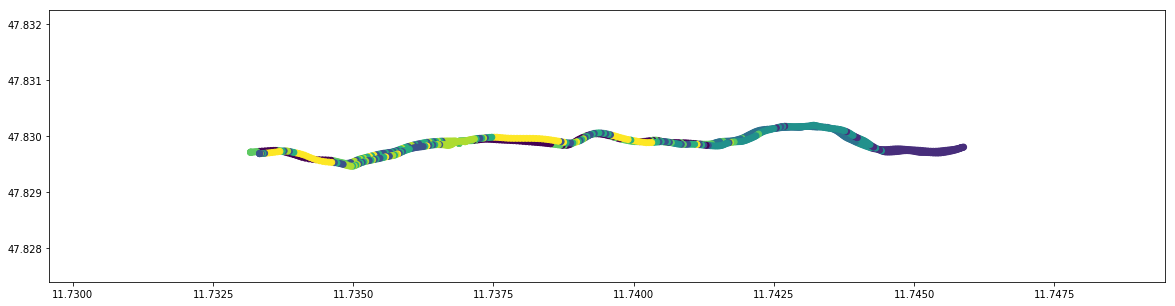

[['score_name', 'score_result'], ['adjusted_rand_score', 0.06967976035669014], ['adjusted_mutual_info_score', 0.18560981206450627], ['homogeneity_score', 0.20208209237614147], ['completeness_score', 0.21976591710092014], ['v_measure_score', 0.21055335269102637], ['fowlkes_mallows_score', 0.17189083954703455], ['silhouette_score', 0.036364299930832115], ['davies_bouldin_score', 4.268354547877229], ['calinski_harabasz_score', 41.90243458803655]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (736, 15)
(736, 52, 6) data.shape


Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 26, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 13, 64)            10304     
_______________________

23/23 [==============================] - 0s 10ms/step - loss: 0.6842
Epoch 171/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6838
Epoch 172/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6834
Epoch 173/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6835
Epoch 174/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6832
Epoch 175/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6832
Epoch 176/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6829
Epoch 177/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6826
Epoch 178/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6824
Epoch 179/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6824
Epoch 180/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6823
Epoch 181/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6819
Epoch 182/500
23/2

23/23 [==============================] - 0s 11ms/step - loss: 0.6620
Epoch 367/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6618
Epoch 368/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6618
Epoch 369/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6618
Epoch 370/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6617
Epoch 371/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6617
Epoch 372/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6616
Epoch 373/500
23/23 [==============================] - 0s 12ms/step - loss: 0.6619
Epoch 374/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6621
Epoch 375/500
23/23 [==============================] - 0s 10ms/step - loss: 0.6625
Epoch 376/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6623
Epoch 377/500
23/23 [==============================] - 0s 11ms/step - loss: 0.6625
Epoch 378/500
23/2

<Figure size 1200x400 with 0 Axes>

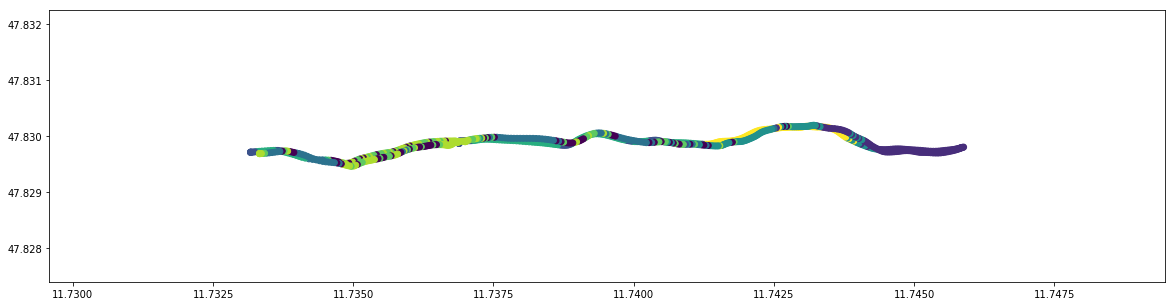

[['score_name', 'score_result'], ['adjusted_rand_score', 0.0790122052591493], ['adjusted_mutual_info_score', 0.20661434401980558], ['homogeneity_score', 0.22078714962341453], ['completeness_score', 0.24237122423868984], ['v_measure_score', 0.2310762571522888], ['fowlkes_mallows_score', 0.182254445640166], ['silhouette_score', 0.04076226650108703], ['davies_bouldin_score', 4.226793312968088], ['calinski_harabasz_score', 42.78819885398126]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 25
clusters: 9
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([44, 14, 16, 17, 17, 15, 11, 49,  6, 13,  7,  6, 24]))


<Figure size 1200x400 with 0 Axes>

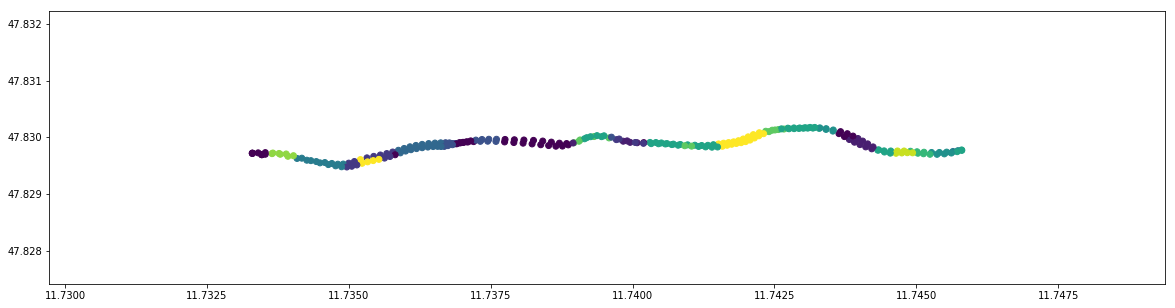


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15  15  15  15  15  15  15  15]
Input Shape: (152, 6)
(239, 152, 6) data.shape


Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________________________
flatten_106 (Flatten)        (None, 2432)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                36495     
_________________________________________________________________
em

8/8 [==============================] - 0s 12ms/step - loss: 0.7162
Epoch 180/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7156
Epoch 181/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7152
Epoch 182/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7146
Epoch 183/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7141
Epoch 184/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7136
Epoch 185/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7132
Epoch 186/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7123
Epoch 187/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7118
Epoch 188/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7116
Epoch 189/500
8/8 [==============================] - 0s 13ms/step - loss: 0.7114
Epoch 190/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7107
Epoch 191/500
8/8 [========================

8/8 [==============================] - 0s 10ms/step - loss: 0.6846
Epoch 382/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6844
Epoch 383/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6844
Epoch 384/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6844
Epoch 385/500
8/8 [==============================] - 0s 12ms/step - loss: 0.6844
Epoch 386/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6844
Epoch 387/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6847
Epoch 388/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6846
Epoch 389/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6848
Epoch 390/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6847
Epoch 391/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6848
Epoch 392/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6855
Epoch 393/500
8/8 [=======================

<Figure size 1200x400 with 0 Axes>

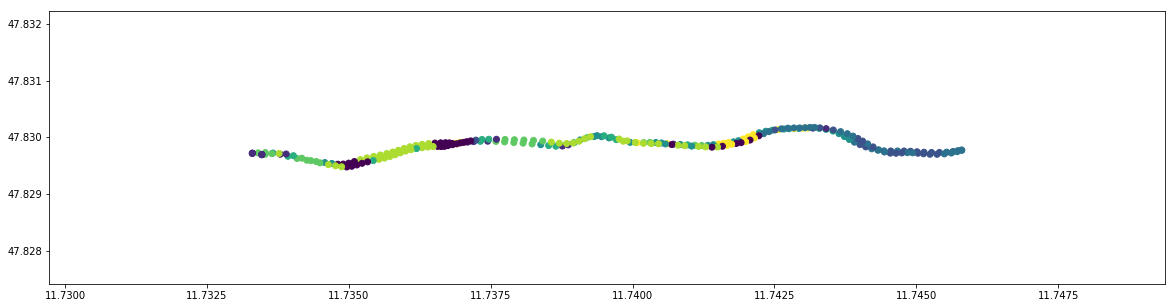

[['score_name', 'score_result'], ['adjusted_rand_score', 0.10182712125674741], ['adjusted_mutual_info_score', 0.21561485455211105], ['homogeneity_score', 0.2839073893565852], ['completeness_score', 0.3096177140471421], ['v_measure_score', 0.2962056916870951], ['fowlkes_mallows_score', 0.2044310171348863], ['silhouette_score', 0.018540857863172108], ['davies_bouldin_score', 3.8046422733321474], ['calinski_harabasz_score', 10.85055912645768]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (239, 15)
(239, 152, 6) data.shape


Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_____________________

8/8 [==============================] - 0s 10ms/step - loss: 0.7774
Epoch 74/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7776
Epoch 75/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7773
Epoch 76/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7773
Epoch 77/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7774
Epoch 78/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7776
Epoch 79/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7775
Epoch 80/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7776
Epoch 81/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7776
Epoch 82/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7775
Epoch 83/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7773
Epoch 84/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7773
Epoch 85/500
8/8 [==============================] - 0s 10

8/8 [==============================] - 0s 12ms/step - loss: 0.7641
Epoch 276/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7644
Epoch 277/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7642
Epoch 278/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7646
Epoch 279/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7643
Epoch 280/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7646
Epoch 281/500
8/8 [==============================] - 0s 14ms/step - loss: 0.7648
Epoch 282/500
8/8 [==============================] - 0s 13ms/step - loss: 0.7641
Epoch 283/500
8/8 [==============================] - 0s 13ms/step - loss: 0.7640
Epoch 284/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7643
Epoch 285/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7643
Epoch 286/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7640
Epoch 287/500
8/8 [=======================

8/8 [==============================] - 0s 12ms/step - loss: 0.7532
Epoch 478/500
8/8 [==============================] - 0s 13ms/step - loss: 0.7532
Epoch 479/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7531
Epoch 480/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7531
Epoch 481/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7531
Epoch 482/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7532
Epoch 483/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7532
Epoch 484/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7532
Epoch 485/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7532
Epoch 486/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7535
Epoch 487/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7536
Epoch 488/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7535
Epoch 489/500
8/8 [=========================

<Figure size 1200x400 with 0 Axes>

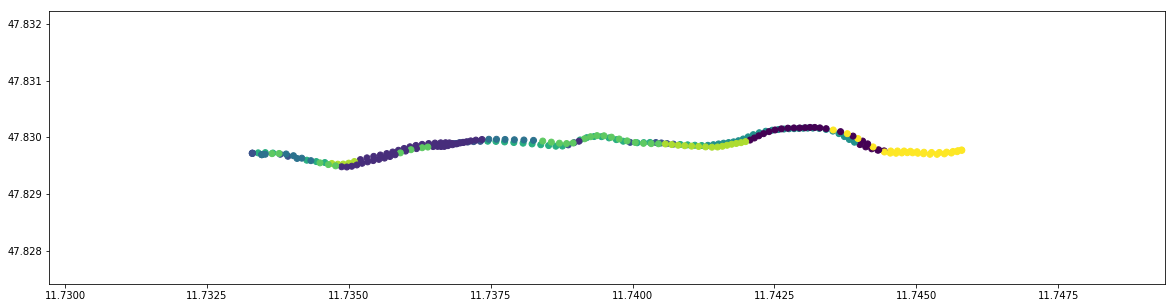

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09386030477081725], ['adjusted_mutual_info_score', 0.23464036184434625], ['homogeneity_score', 0.30028086614956634], ['completeness_score', 0.3273225729539021], ['v_measure_score', 0.31321914314971816], ['fowlkes_mallows_score', 0.1971491799773988], ['silhouette_score', 0.04005510534288408], ['davies_bouldin_score', 3.07413574450439], ['calinski_harabasz_score', 13.617721149243266]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 75
clusters: 9
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([44, 14, 16, 17, 17, 15, 11, 49,  6, 13,  7,  6, 24]))


<Figure size 1200x400 with 0 Axes>

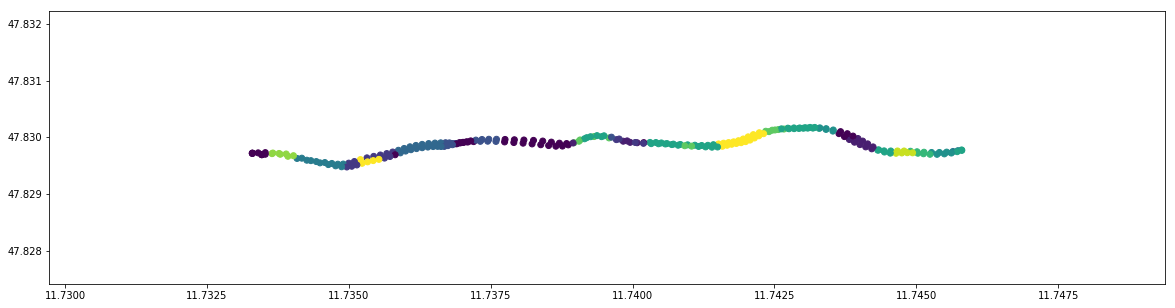


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15  15  15  15  15  15  15  15  15]
Input Shape: (152, 6)
(239, 152, 6) data.shape


Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________________________
flatten_108 (Flatten)        (None, 2432)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                36495     
________________________________________________________________

8/8 [==============================] - 0s 10ms/step - loss: 0.7684
Epoch 180/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7679
Epoch 181/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7677
Epoch 182/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7671
Epoch 183/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7669
Epoch 184/500
8/8 [==============================] - 0s 8ms/step - loss: 0.7666
Epoch 185/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7665
Epoch 186/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7666
Epoch 187/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7656
Epoch 188/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7650
Epoch 189/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7647
Epoch 190/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7640
Epoch 191/500
8/8 [=========================

8/8 [==============================] - 0s 10ms/step - loss: 0.7386
Epoch 382/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7386
Epoch 383/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7386
Epoch 384/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7386
Epoch 385/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7386
Epoch 386/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7385
Epoch 387/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7385
Epoch 388/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7384
Epoch 389/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7384
Epoch 390/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7385
Epoch 391/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7385
Epoch 392/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7386
Epoch 393/500
8/8 [=======================

<Figure size 1200x400 with 0 Axes>

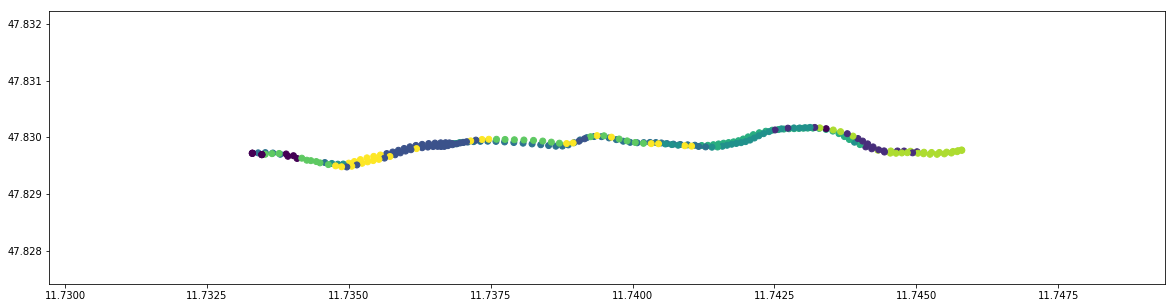

[['score_name', 'score_result'], ['adjusted_rand_score', 0.12213176249578583], ['adjusted_mutual_info_score', 0.2582180604405914], ['homogeneity_score', 0.31961901385032926], ['completeness_score', 0.3502466277329093], ['v_measure_score', 0.33423264252159834], ['fowlkes_mallows_score', 0.22296583152802374], ['silhouette_score', 0.036696538370306675], ['davies_bouldin_score', 3.633756902780581], ['calinski_harabasz_score', 13.547884957821744]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (239, 15)
(239, 152, 6) data.shape


Model: "sequential_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_______________

Epoch 73/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7828
Epoch 74/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7825
Epoch 75/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7825
Epoch 76/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7822
Epoch 77/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7822
Epoch 78/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7821
Epoch 79/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7820
Epoch 80/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7818
Epoch 81/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7818
Epoch 82/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7816
Epoch 83/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7815
Epoch 84/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7815
Epoch 85/500
8/8 [========================

8/8 [==============================] - 0s 11ms/step - loss: 0.7455
Epoch 276/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7455
Epoch 277/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7454
Epoch 278/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7453
Epoch 279/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7455
Epoch 280/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7456
Epoch 281/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7458
Epoch 282/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7455
Epoch 283/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7453
Epoch 284/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7454
Epoch 285/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7453
Epoch 286/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7455
Epoch 287/500
8/8 [========================

8/8 [==============================] - 0s 10ms/step - loss: 0.7391
Epoch 478/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7391
Epoch 479/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7391
Epoch 480/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7392
Epoch 481/500
8/8 [==============================] - 0s 14ms/step - loss: 0.7392
Epoch 482/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7392
Epoch 483/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7393
Epoch 484/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7393
Epoch 485/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7393
Epoch 486/500
8/8 [==============================] - 0s 12ms/step - loss: 0.7393
Epoch 487/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7393
Epoch 488/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7394
Epoch 489/500
8/8 [========================

<Figure size 1200x400 with 0 Axes>

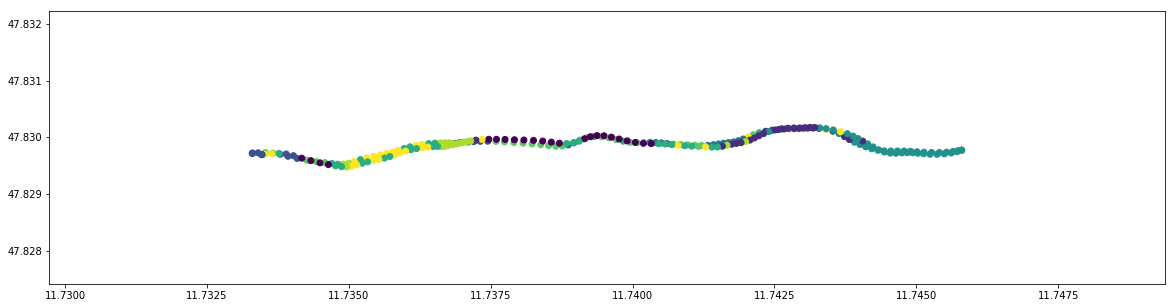

[['score_name', 'score_result'], ['adjusted_rand_score', 0.08216904129031107], ['adjusted_mutual_info_score', 0.20387448291667193], ['homogeneity_score', 0.27358227687808384], ['completeness_score', 0.29877755619042], ['v_measure_score', 0.2856253684484583], ['fowlkes_mallows_score', 0.1871886240595907], ['silhouette_score', 0.03874840908899457], ['davies_bouldin_score', 3.558716033519624], ['calinski_harabasz_score', 12.64568470963507]]
----------------------------------------------------------------
window_length: 150
sub_sample_length: 150
clusters: 9
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([44, 14, 16, 17, 17, 15, 11, 49,  6, 13,  7,  6, 24]))


<Figure size 1200x400 with 0 Axes>

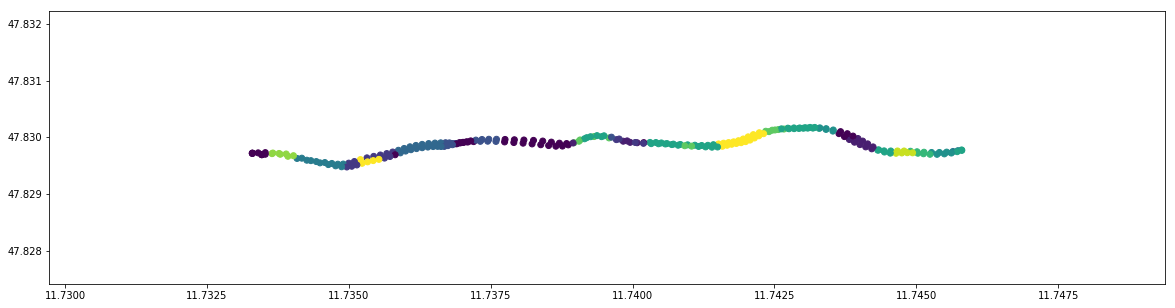


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15  15  15  15  15  15  15  15  15  15]
Input Shape: (152, 6)
(239, 152, 6) data.shape


Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 19, 128)           24704     
_________________________________________________________________
flatten_110 (Flatten)        (None, 2432)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                36495     
____________________________________________________________

8/8 [==============================] - 0s 10ms/step - loss: 0.7657
Epoch 180/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7651
Epoch 181/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7647
Epoch 182/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7641
Epoch 183/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7639
Epoch 184/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7636
Epoch 185/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7635
Epoch 186/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7635
Epoch 187/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7632
Epoch 188/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7630
Epoch 189/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7629
Epoch 190/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7626
Epoch 191/500
8/8 [=========================

8/8 [==============================] - 0s 12ms/step - loss: 0.6997
Epoch 382/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6994
Epoch 383/500
8/8 [==============================] - 0s 12ms/step - loss: 0.6991
Epoch 384/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6990
Epoch 385/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6987
Epoch 386/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6984
Epoch 387/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6982
Epoch 388/500
8/8 [==============================] - 0s 12ms/step - loss: 0.6980
Epoch 389/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6982
Epoch 390/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6980
Epoch 391/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6982
Epoch 392/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6982
Epoch 393/500
8/8 [========================

<Figure size 1200x400 with 0 Axes>

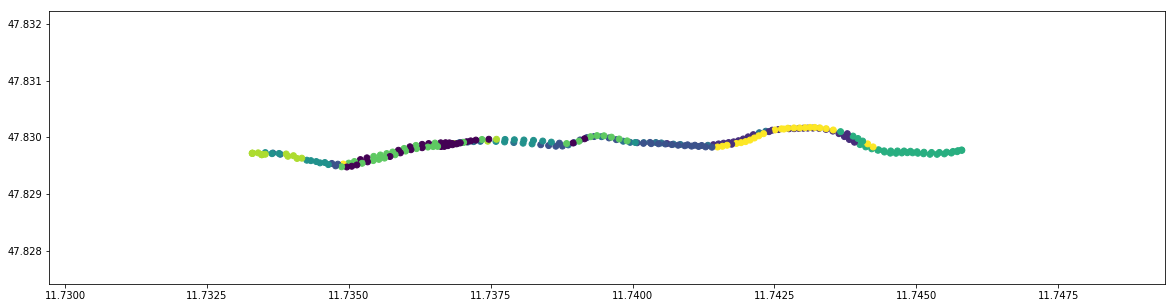

[['score_name', 'score_result'], ['adjusted_rand_score', 0.10191100680687885], ['adjusted_mutual_info_score', 0.24322081099601459], ['homogeneity_score', 0.30866327686671413], ['completeness_score', 0.3339232647126622], ['v_measure_score', 0.3207967874798999], ['fowlkes_mallows_score', 0.2023898741509487], ['silhouette_score', 0.03729394528504974], ['davies_bouldin_score', 3.8240664551555303], ['calinski_harabasz_score', 13.223715715362435]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (239, 15)
(239, 152, 6) data.shape


Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 76, 32)            992       
_________________________________________________________________
conv2 (Conv1D)               (None, 38, 64)            10304     
____________

Epoch 175/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7714
Epoch 176/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7713
Epoch 177/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7711
Epoch 178/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7709
Epoch 179/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7708
Epoch 180/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7708
Epoch 181/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7707
Epoch 182/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7706
Epoch 183/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7706
Epoch 184/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7705
Epoch 185/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7704
Epoch 186/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7703
Epoch 187/500
8/8 [===========

8/8 [==============================] - 0s 11ms/step - loss: 0.7659
Epoch 378/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7659
Epoch 379/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7659
Epoch 380/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7658
Epoch 381/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7658
Epoch 382/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7658
Epoch 383/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7658
Epoch 384/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7658
Epoch 385/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7658
Epoch 386/500
8/8 [==============================] - 0s 9ms/step - loss: 0.7658
Epoch 387/500
8/8 [==============================] - 0s 11ms/step - loss: 0.7658
Epoch 388/500
8/8 [==============================] - 0s 10ms/step - loss: 0.7658
Epoch 389/500
8/8 [==========================

<Figure size 1200x400 with 0 Axes>

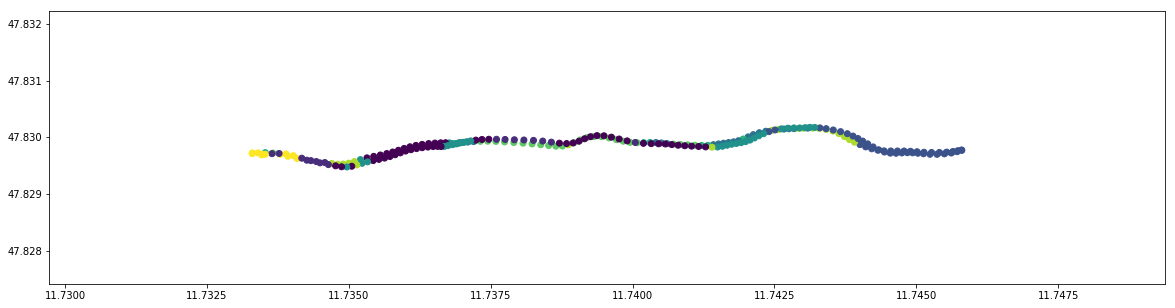

[['score_name', 'score_result'], ['adjusted_rand_score', 0.09530958585252537], ['adjusted_mutual_info_score', 0.24312467689680037], ['homogeneity_score', 0.30150785161811294], ['completeness_score', 0.3429659974381056], ['v_measure_score', 0.32090345082909977], ['fowlkes_mallows_score', 0.20796330551257877], ['silhouette_score', 0.04679358745156386], ['davies_bouldin_score', 3.390596809358109], ['calinski_harabasz_score', 12.07892014093364]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 25
clusters: 9
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([24, 10, 11,  5,  8,  8,  1, 26,  6,  3,  2,  2, 12]))


<Figure size 1200x400 with 0 Axes>

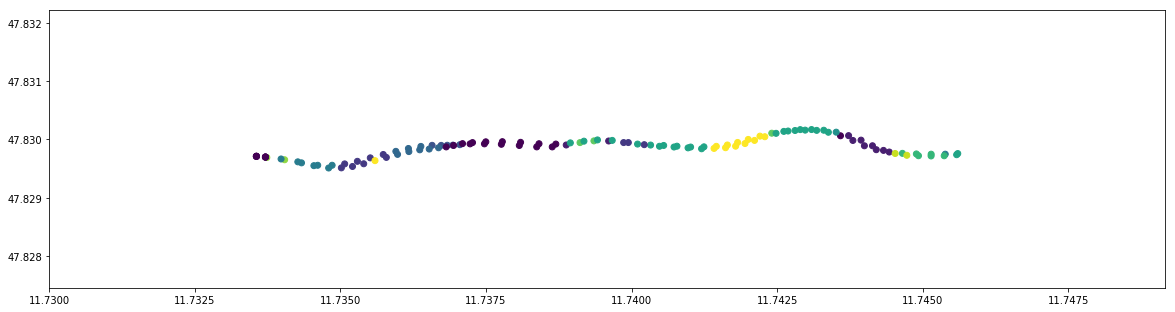


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15  15  15  15  15  15  15  15  15  15  15]
Input Shape: (300, 6)
(118, 300, 6) data.shape


Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________________________
flatten_112 (Flatten)        (None, 4736)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                71055     
________________________________________________________

4/4 [==============================] - 0s 12ms/step - loss: 0.7167
Epoch 180/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7151
Epoch 181/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7138
Epoch 182/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7126
Epoch 183/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7113
Epoch 184/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7100
Epoch 185/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7087
Epoch 186/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7079
Epoch 187/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7069
Epoch 188/500
4/4 [==============================] - 0s 16ms/step - loss: 0.7057
Epoch 189/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7049
Epoch 190/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7041
Epoch 191/500
4/4 [=======================

4/4 [==============================] - 0s 15ms/step - loss: 0.6370
Epoch 382/500
4/4 [==============================] - 0s 16ms/step - loss: 0.6369
Epoch 383/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6364
Epoch 384/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6361
Epoch 385/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6366
Epoch 386/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6358
Epoch 387/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6358
Epoch 388/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6351
Epoch 389/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6349
Epoch 390/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6350
Epoch 391/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6350
Epoch 392/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6350
Epoch 393/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

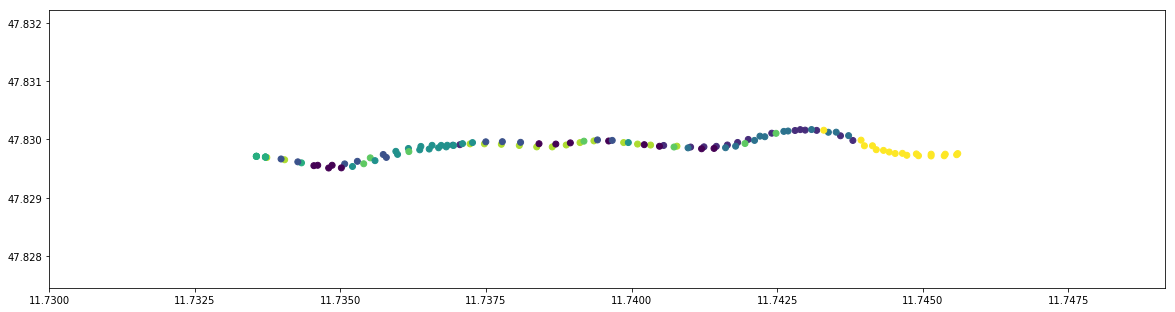

[['score_name', 'score_result'], ['adjusted_rand_score', 0.12754388690383722], ['adjusted_mutual_info_score', 0.2552673942068159], ['homogeneity_score', 0.3906305368134234], ['completeness_score', 0.4052606561802314], ['v_measure_score', 0.39781113063354656], ['fowlkes_mallows_score', 0.22995388257294883], ['silhouette_score', 0.0538471628096894], ['davies_bouldin_score', 3.110472270818503], ['calinski_harabasz_score', 6.820279782211567]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (118, 15)
(118, 300, 6) data.shape


Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
___________

Epoch 73/500
4/4 [==============================] - 0s 12ms/step - loss: 0.8219
Epoch 74/500
4/4 [==============================] - 0s 13ms/step - loss: 0.8221
Epoch 75/500
4/4 [==============================] - 0s 13ms/step - loss: 0.8217
Epoch 76/500
4/4 [==============================] - 0s 14ms/step - loss: 0.8214
Epoch 77/500
4/4 [==============================] - 0s 12ms/step - loss: 0.8218
Epoch 78/500
4/4 [==============================] - 0s 11ms/step - loss: 0.8217
Epoch 79/500
4/4 [==============================] - 0s 15ms/step - loss: 0.8212
Epoch 80/500
4/4 [==============================] - 0s 14ms/step - loss: 0.8217
Epoch 81/500
4/4 [==============================] - 0s 15ms/step - loss: 0.8221
Epoch 82/500
4/4 [==============================] - 0s 15ms/step - loss: 0.8212
Epoch 83/500
4/4 [==============================] - 0s 14ms/step - loss: 0.8212
Epoch 84/500
4/4 [==============================] - 0s 14ms/step - loss: 0.8208
Epoch 85/500
4/4 [======================

4/4 [==============================] - 0s 14ms/step - loss: 0.7234
Epoch 276/500
4/4 [==============================] - 0s 18ms/step - loss: 0.7232
Epoch 277/500
4/4 [==============================] - 0s 19ms/step - loss: 0.7228
Epoch 278/500
4/4 [==============================] - 0s 15ms/step - loss: 0.7227
Epoch 279/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7225
Epoch 280/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7223
Epoch 281/500
4/4 [==============================] - 0s 17ms/step - loss: 0.7222
Epoch 282/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7220
Epoch 283/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7219
Epoch 284/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7216
Epoch 285/500
4/4 [==============================] - 0s 18ms/step - loss: 0.7215
Epoch 286/500
4/4 [==============================] - 0s 18ms/step - loss: 0.7213
Epoch 287/500
4/4 [=======================

4/4 [==============================] - 0s 13ms/step - loss: 0.7112
Epoch 478/500
4/4 [==============================] - 0s 17ms/step - loss: 0.7112
Epoch 479/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7112
Epoch 480/500
4/4 [==============================] - 0s 15ms/step - loss: 0.7111
Epoch 481/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7111
Epoch 482/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7111
Epoch 483/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7111
Epoch 484/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7111
Epoch 485/500
4/4 [==============================] - 0s 15ms/step - loss: 0.7111
Epoch 486/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7111
Epoch 487/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7111
Epoch 488/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7112
Epoch 489/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

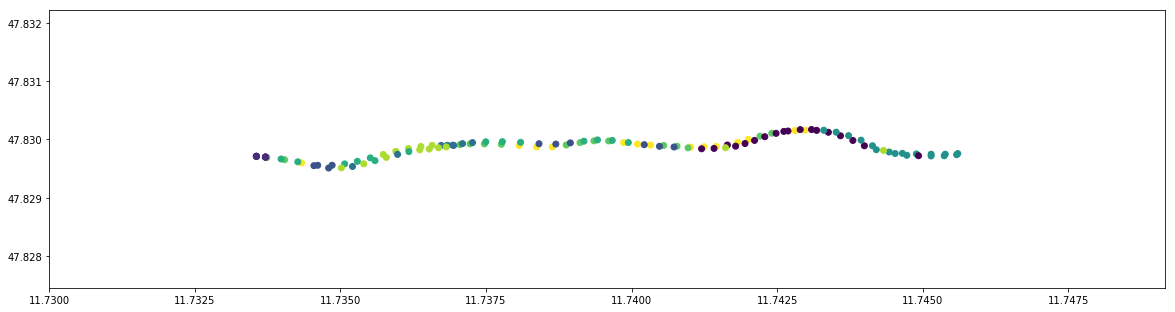

[['score_name', 'score_result'], ['adjusted_rand_score', 0.11612466350964189], ['adjusted_mutual_info_score', 0.23679385148920046], ['homogeneity_score', 0.3759413465425641], ['completeness_score', 0.390104902900024], ['v_measure_score', 0.38289218854816026], ['fowlkes_mallows_score', 0.2199200758938677], ['silhouette_score', 0.050994047417623034], ['davies_bouldin_score', 3.060691911945285], ['calinski_harabasz_score', 6.7847929618302905]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 75
clusters: 9
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([24, 10, 11,  5,  8,  8,  1, 26,  6,  3,  2,  2, 12]))


<Figure size 1200x400 with 0 Axes>

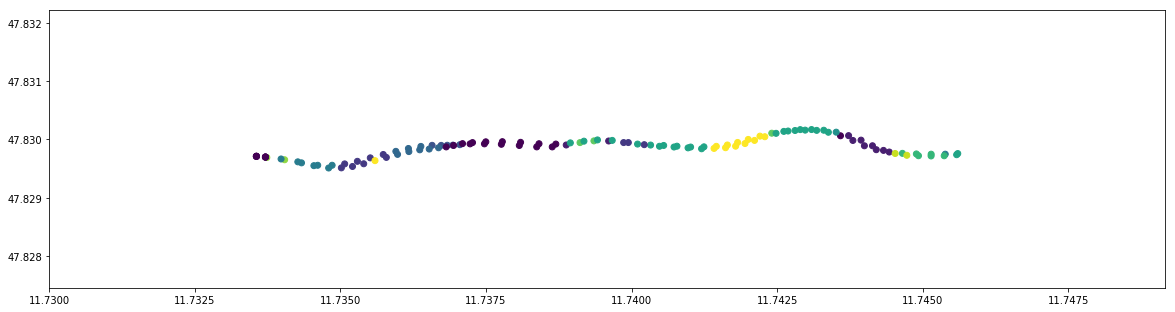


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15  15  15  15  15  15  15  15  15  15  15  15]
Input Shape: (300, 6)
(118, 300, 6) data.shape


Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________________________
flatten_114 (Flatten)        (None, 4736)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                71055     
____________________________________________________

4/4 [==============================] - 0s 12ms/step - loss: 0.6653
Epoch 180/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6644
Epoch 181/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6634
Epoch 182/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6622
Epoch 183/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6607
Epoch 184/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6592
Epoch 185/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6587
Epoch 186/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6579
Epoch 187/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6566
Epoch 188/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6551
Epoch 189/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6542
Epoch 190/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6531
Epoch 191/500
4/4 [=======================

4/4 [==============================] - 0s 14ms/step - loss: 0.5937
Epoch 382/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5936
Epoch 383/500
4/4 [==============================] - 0s 14ms/step - loss: 0.5937
Epoch 384/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5935
Epoch 385/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5935
Epoch 386/500
4/4 [==============================] - 0s 14ms/step - loss: 0.5933
Epoch 387/500
4/4 [==============================] - 0s 14ms/step - loss: 0.5933
Epoch 388/500
4/4 [==============================] - 0s 15ms/step - loss: 0.5932
Epoch 389/500
4/4 [==============================] - 0s 15ms/step - loss: 0.5932
Epoch 390/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5932
Epoch 391/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5933
Epoch 392/500
4/4 [==============================] - 0s 16ms/step - loss: 0.5931
Epoch 393/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

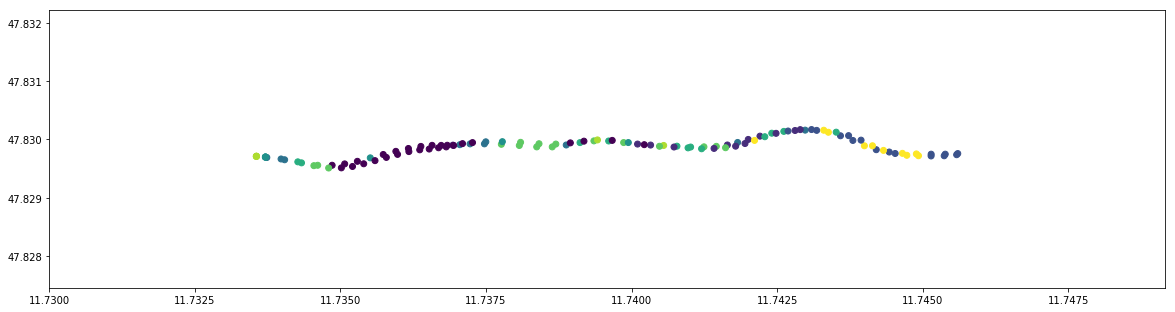

[['score_name', 'score_result'], ['adjusted_rand_score', 0.10288297989326105], ['adjusted_mutual_info_score', 0.2224451380911216], ['homogeneity_score', 0.358357081038147], ['completeness_score', 0.3833779531065951], ['v_measure_score', 0.3704455038127523], ['fowlkes_mallows_score', 0.2160114891049189], ['silhouette_score', 0.030681036756650293], ['davies_bouldin_score', 3.3156571727996913], ['calinski_harabasz_score', 5.440537858514535]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (118, 15)
(118, 300, 6) data.shape


Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_______

4/4 [==============================] - 0s 15ms/step - loss: 0.7450
Epoch 174/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7451
Epoch 175/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7453
Epoch 176/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7458
Epoch 177/500
4/4 [==============================] - 0s 15ms/step - loss: 0.7456
Epoch 178/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7451
Epoch 179/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7447
Epoch 180/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7445
Epoch 181/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7437
Epoch 182/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7430
Epoch 183/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7425
Epoch 184/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7423
Epoch 185/500
4/4 [=======================

4/4 [==============================] - 0s 12ms/step - loss: 0.7172
Epoch 376/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7171
Epoch 377/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7171
Epoch 378/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7170
Epoch 379/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7169
Epoch 380/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7168
Epoch 381/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7168
Epoch 382/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7167
Epoch 383/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7167
Epoch 384/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7166
Epoch 385/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7166
Epoch 386/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7165
Epoch 387/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

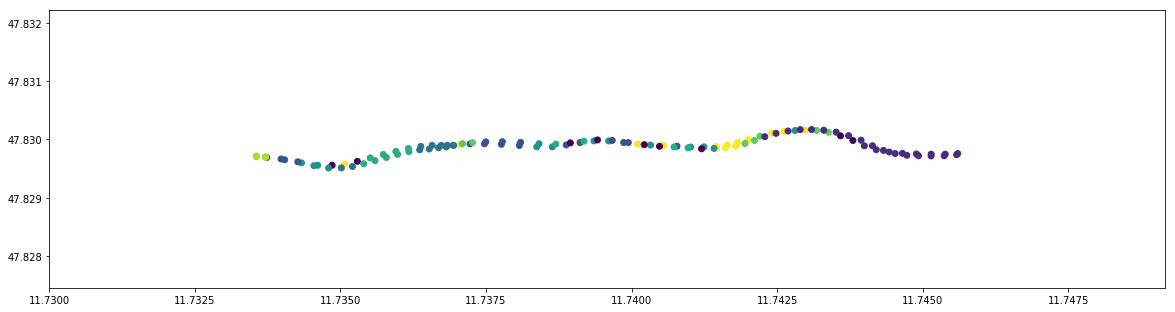

[['score_name', 'score_result'], ['adjusted_rand_score', 0.11156202419403928], ['adjusted_mutual_info_score', 0.23227037532122677], ['homogeneity_score', 0.36949053364555096], ['completeness_score', 0.3891269089549984], ['v_measure_score', 0.37905458317106705], ['fowlkes_mallows_score', 0.21986604618225455], ['silhouette_score', 0.05583623965189374], ['davies_bouldin_score', 2.961996680520665], ['calinski_harabasz_score', 6.460424932950399]]
----------------------------------------------------------------
window_length: 300
sub_sample_length: 150
clusters: 9
Ground truth
y (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([24, 10, 11,  5,  8,  8,  1, 26,  6,  3,  2,  2, 12]))


<Figure size 1200x400 with 0 Axes>

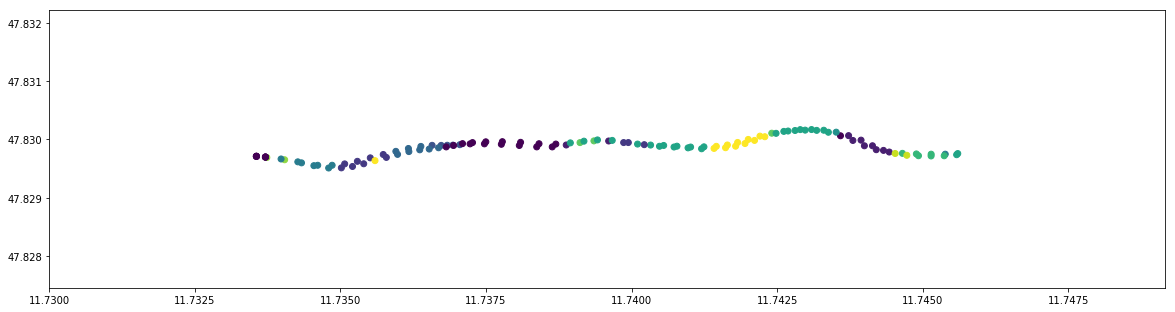


---- Cael2 ----
Filters: [ 32  64 128  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15  15  15  15  15  15  15  15  15  15  15  15  15]
Input Shape: (300, 6)
(118, 300, 6) data.shape


Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     
_________________________________________________________________
conv3 (Conv1D)               (None, 37, 128)           24704     
_________________________________________________________________
flatten_116 (Flatten)        (None, 4736)              0         
_________________________________________________________________
raw_embedding (Dense)        (None, 15)                71055     
________________________________________________

4/4 [==============================] - 0s 13ms/step - loss: 0.7309
Epoch 180/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7305
Epoch 181/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7299
Epoch 182/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7299
Epoch 183/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7299
Epoch 184/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7298
Epoch 185/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7296
Epoch 186/500
4/4 [==============================] - 0s 15ms/step - loss: 0.7293
Epoch 187/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7301
Epoch 188/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7291
Epoch 189/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7284
Epoch 190/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7284
Epoch 191/500
4/4 [=======================

4/4 [==============================] - 0s 13ms/step - loss: 0.7133
Epoch 382/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7132
Epoch 383/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7133
Epoch 384/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7133
Epoch 385/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7132
Epoch 386/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7131
Epoch 387/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7131
Epoch 388/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7130
Epoch 389/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7130
Epoch 390/500
4/4 [==============================] - 0s 15ms/step - loss: 0.7130
Epoch 391/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7130
Epoch 392/500
4/4 [==============================] - 0s 15ms/step - loss: 0.7130
Epoch 393/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

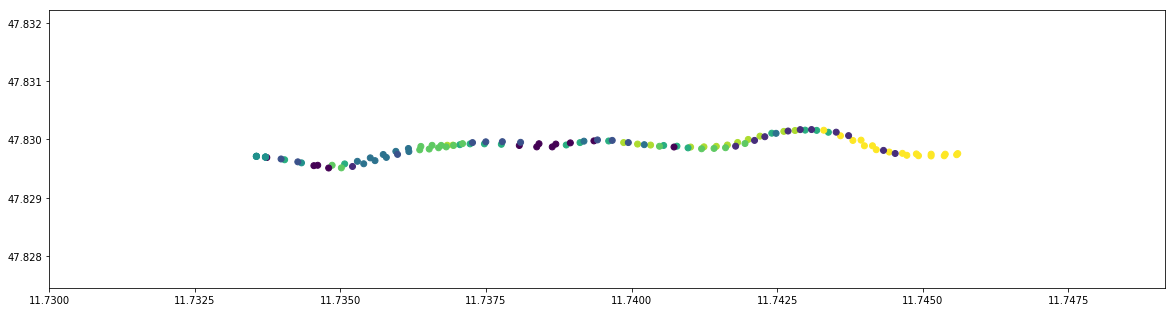

[['score_name', 'score_result'], ['adjusted_rand_score', 0.10721302502561399], ['adjusted_mutual_info_score', 0.21796316798300475], ['homogeneity_score', 0.36239496614218486], ['completeness_score', 0.3739399776509755], ['v_measure_score', 0.36807696465401235], ['fowlkes_mallows_score', 0.21101011235578304], ['silhouette_score', 0.03540672492516651], ['davies_bouldin_score', 3.194743468834022], ['calinski_harabasz_score', 6.019274863913272]]

---- Cael2fi ----
Filters: [32, 64, 128, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Input Shape: (118, 15)
(118, 300, 6) data.shape


Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 150, 32)           992       
_________________________________________________________________
conv2 (Conv1D)               (None, 75, 64)            10304     


4/4 [==============================] - 0s 13ms/step - loss: 0.7165
Epoch 174/500
4/4 [==============================] - 0s 15ms/step - loss: 0.7154
Epoch 175/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7143
Epoch 176/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7133
Epoch 177/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7124
Epoch 178/500
4/4 [==============================] - 0s 10ms/step - loss: 0.7113
Epoch 179/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7106
Epoch 180/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7100
Epoch 181/500
4/4 [==============================] - 0s 14ms/step - loss: 0.7090
Epoch 182/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7080
Epoch 183/500
4/4 [==============================] - 0s 13ms/step - loss: 0.7074
Epoch 184/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7064
Epoch 185/500
4/4 [=======================

4/4 [==============================] - 0s 14ms/step - loss: 0.6535
Epoch 376/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6533
Epoch 377/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6533
Epoch 378/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6532
Epoch 379/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6529
Epoch 380/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6527
Epoch 381/500
4/4 [==============================] - 0s 12ms/step - loss: 0.6526
Epoch 382/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6524
Epoch 383/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6524
Epoch 384/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6522
Epoch 385/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6520
Epoch 386/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6520
Epoch 387/500
4/4 [=======================

<Figure size 1200x400 with 0 Axes>

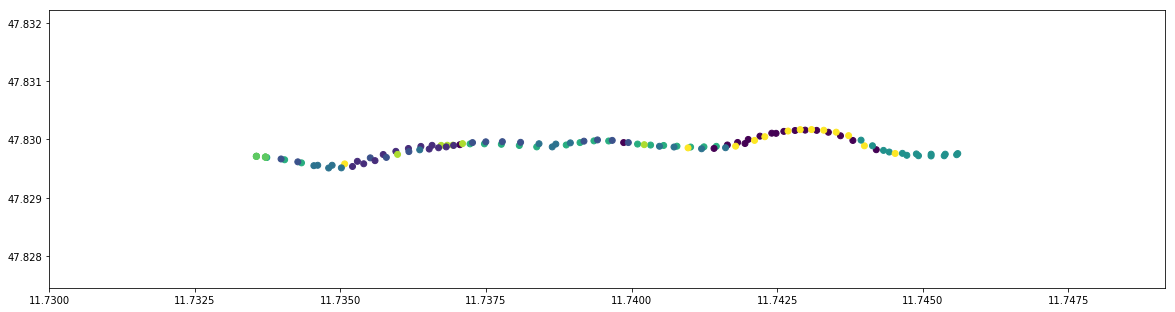

[['score_name', 'score_result'], ['adjusted_rand_score', 0.1029401928795452], ['adjusted_mutual_info_score', 0.2142956112404514], ['homogeneity_score', 0.35672647370975885], ['completeness_score', 0.3721133612301806], ['v_measure_score', 0.36425749748671943], ['fowlkes_mallows_score', 0.20923807400512145], ['silhouette_score', 0.055353274598108], ['davies_bouldin_score', 3.0935579518258782], ['calinski_harabasz_score', 6.959577427443841]]


In [72]:
from keras.initializers import VarianceScaling
from keras.optimizers import SGD

mtb_classifier.train_and_compare_unsupervised_clusterings(
    mtb_data_provider, 
    nums_clusters=nums_clusters, 
    prefix=prefix, 
    run_dec=False,
    run_fidec=False,
    run_dcec=False,
    run_fidcec=False,
    run_classical_raw=False,
    run_classical_raw_fi=False,
    run_classical_features=False,
    run_cael2 = True,
    run_cael2fi = True,
    cael2_filters=[32, 64, 128],
#    dec_dims=[500, 1000, 3000, 7],
#    dcec_filters=[32, 64, 128],
#    pretrain_epochs = 300,
#    maxiter = 6e4,
#    dec_dims=[500, 500, 2000, 7],
#    dcec_filters=[32, 64, 128],
#    update_interval = 140,
#    pretrain_epochs = 300,
#    maxiter = 2e4,
#    init=VarianceScaling(scale=1. / 3., mode='fan_in', distribution='uniform'),
#    pretrain_optimizer=SGD(lr=1, momentum=0.9),
#    maxiter=1,
    window_lengths=window_lengths, 
    sub_sample_lengths=sub_sample_lengths)

### Evaluation

In [73]:
def plot_scores(score_keys, window_lengths, sub_sample_lengths, scores):
    for score_key in score_keys:
        for window_length in window_lengths:
            for sub_sample_length in sub_sample_lengths:
                if sub_sample_length >= window_length:
                    continue

                window_prefix = "%s_%s_%s" % (score_key, str(window_length), str(sub_sample_length))

                figure(1, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
                legend = []
                has_data = False
                for key, score_array in scores.items():
                    if window_prefix in key:
                        has_data = True
                        plt.scatter(x=nums_clusters, y=score_array)
                        legend.append(key)
                
                if has_data:
                    print(window_prefix)
                    plt.legend(legend)
                    plt.show()

In [74]:
def plot_track(prefix, window_length, sub_sample_length, eval_prefixes, experiment_prefix):
    data_prefix = "%s_%s_%s" % (prefix, str(window_length), str(sub_sample_length))
    filename_features = "data/%s_features.npy" % data_prefix
    filename_labels = "data/%s_labels.npy" % data_prefix
    filename_raw = "data/%s_raw.npy" % data_prefix

    feature_file = np.load(filename_features)
    labels = np.load(filename_labels)
    labels = LabelEncoder().fit_transform(labels)
    raw_file = np.load(filename_raw)

    print('---- Ground Truth ----')
    geometry = gpd.points_from_xy(feature_file[:, -1], feature_file[:, -2])
    gdf = GeoDataFrame(geometry=geometry)
    gdf.plot(c=labels, figsize=(20, 30))
    plt.show()

    for eval_prefix in eval_prefixes:
        print('---- %s ----' % eval_prefix)
        filename_y_pred = "evaluation/%s_%s_y_pred.npy" % (experiment_prefix, eval_prefix)
        y_pred = np.load(filename_y_pred)
        gdf = GeoDataFrame(geometry=geometry)
        gdf.plot(c=y_pred, figsize=(20, 30))
        plt.show()

In [81]:
eval_prefixes = ['cael2', 'cael2fi', 'classical_raw', 'classical_raw_fi', 'classical_features', 'dcec', 'fidcec', 'dec', 'fidec']
score_keys = ['adjusted_rand_score', 'adjusted_mutual_info_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'fowlkes_mallows_score', 'silhouette_score', 'davies_bouldin_score', 'calinski_harabasz_score']
score_keys_filter = ['adjusted_rand_score']#, 'robustness']

In [82]:
def process_results(eval_prefixes, score_keys, score_keys_filter, verbose=True):
    scores = dict()

    for num_clusters in nums_clusters:
        for window_length in window_lengths:
            for sub_sample_length in sub_sample_lengths:
                if sub_sample_length >= window_length:
                    continue

                experiment_prefix = "%s_%s_%s_%s" % (prefix, str(window_length), str(sub_sample_length), str(num_clusters))

                results_complete = None
                for eval_prefix in eval_prefixes:
                    filename_scores = "evaluation/%s_%s_score.csv" % (experiment_prefix, eval_prefix)
                    results = pd.read_csv(filename_scores).values.T
                    results_complete = results if results_complete is None else np.vstack((results_complete, results[-1]))

                    for i in range(len(score_keys)):
                        score_prefix = "%s_%s_%s_%s" % (eval_prefix, score_keys[i], str(window_length), str(sub_sample_length))
                        if not score_prefix in scores:
                            scores[score_prefix] = []
                        scores[score_prefix].append(results[-1][i])


                    # -------- ROBUSTNESS --------
                    if 'robustness' in score_keys_filter:
                        data_prefix = "%s_%s_%s" % (prefix, str(window_length), str(sub_sample_length))
                        filename_y_pred = "evaluation/%s_%s_y_pred.npy" % (experiment_prefix, eval_prefix)
                        filename_features = "data/%s_features.npy" % data_prefix
                        feature_file = np.load(filename_features)
                        y_pred = np.load(filename_y_pred)

                        latitudes, longitudes = feature_file[:, -1], feature_file[:, -2]
                        y_pred_1 = []
                        y_pred_2 = []
                        min_position_delta = int(len(y_pred)/3)

                        for i in range(len(y_pred) - min_position_delta):
                            for j in range(i + min_position_delta, len(y_pred)):
                                location1 = (latitudes[i], longitudes[i])
                                location2 = (latitudes[j], longitudes[j])

                                distance = geodesic(location1, location2).meters
                                if distance < 6:
                                    y_pred_1.append(y_pred[i])
                                    y_pred_2.append(y_pred[j])
                                    continue

                        robustness = metrics.adjusted_rand_score(y_pred_1, y_pred_2)
                        score_prefix = "%s_%s_%s_%s" % (eval_prefix, 'robustness', str(window_length), str(sub_sample_length))
                        if not score_prefix in scores:
                            scores[score_prefix] = []
                        scores[score_prefix].append(robustness)

                        #-----------

                results_complete = results_complete.T
                header = np.hstack(([''], eval_prefixes))
                results_complete = np.insert(results_complete, 0, header, axis=0)

                # --------------------- HEADERS ---------------------
                if verbose:
                    print("----------------------------------------------------------------")
                    print("window_length:", window_length)
                    print("sub_sample_length:", sub_sample_length)
                    print("clusters:", num_clusters)


                    # --------------------- TABLES ---------------------
                    print(pd.DataFrame(results_complete.T), "\n\n")


                    # --------------------- Track PLOTS ---------------------

                    plot_track(prefix, window_length, sub_sample_length, eval_prefixes, experiment_prefix)

    return scores


In [83]:
def plot_random_samples(prefix, eval_prefix, window_length, sub_sample_length, num_clusters, 
                        num_sub_plots=4,
                       plot_all_in_one=False,
                       plot_each_dimension=True):
    data_prefix = "%s_%s_%s" % (prefix, str(window_length), str(sub_sample_length))
    filename_features = "data/%s_features.npy" % data_prefix
    filename_labels = "data/%s_labels.npy" % data_prefix
    filename_raw = "data/%s_raw.npy" % data_prefix
    experiment_prefix = "%s_%s" % (data_prefix, str(num_clusters))

    feature_file = np.load(filename_features)
    labels = np.load(filename_labels)
    raw_file = np.load(filename_raw)

    #for eval_prefix in eval_prefixes:
    print('---- %s ----' % eval_prefix)
    filename_y_pred = "evaluation/%s_%s_y_pred.npy" % (experiment_prefix, eval_prefix)
    y_pred = np.load(filename_y_pred)

    # -------- Plot All Dimensions In One --------
    if plot_all_in_one:
        for cluster in range(num_clusters):
            mask = y_pred == cluster
            fig, axes = plt.subplots(1,4, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15,3))

            axes[0].set_ylabel('Cluster-%s: %s' % (str(cluster), str(np.sum(mask))))

            indices = np.arange(len(raw_file))[mask]
            raw_samples = raw_file[:, :, :-4][mask]

            indices, raw_samples = shuffle(indices, raw_samples)

            for i, sample, ax in zip(indices, raw_samples, axes):
                ax.plot(sample)
                ax.set_title('Sample: %s' % str(i))

        plt.legend(columns)
        plt.show()
        
    # -------- Plot Dimensions Individually --------
    if plot_each_dimension:
        for i in range(len(columns[:-3])):
            print(columns[i])
            for cluster in range(num_clusters):
                mask = y_pred == cluster
                fig, axes = plt.subplots(1,num_sub_plots, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15,3))

                axes[0].set_ylabel('Cluster-%s: %s' % (str(cluster), str(np.sum(mask))))

                indices = np.arange(len(raw_file))[mask]

                dimension_data = raw_file[:, :, i][mask]
                indices, dimension_data = shuffle(indices, dimension_data)

                for j, sample, ax in zip(indices, dimension_data, axes):
                    ax.set_ylim([np.min(dimension_data),np.max(dimension_data)]) # TODO: Make this min/max of the selected feature
                    ax.plot(sample if i < 3 else sample[0::25])
                    ax.set_title('Sample: %s' % str(j))
                plt.show()

In [84]:
scores = process_results(eval_prefixes, score_keys, score_keys_filter, verbose=False)

adjusted_rand_score_50_25


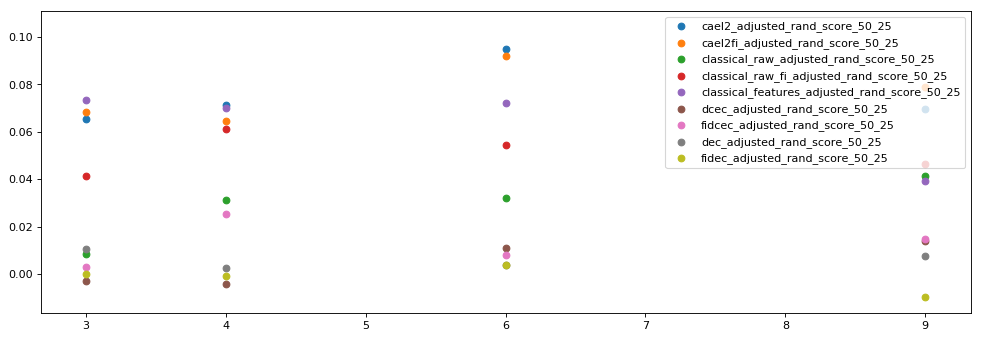

adjusted_rand_score_150_25


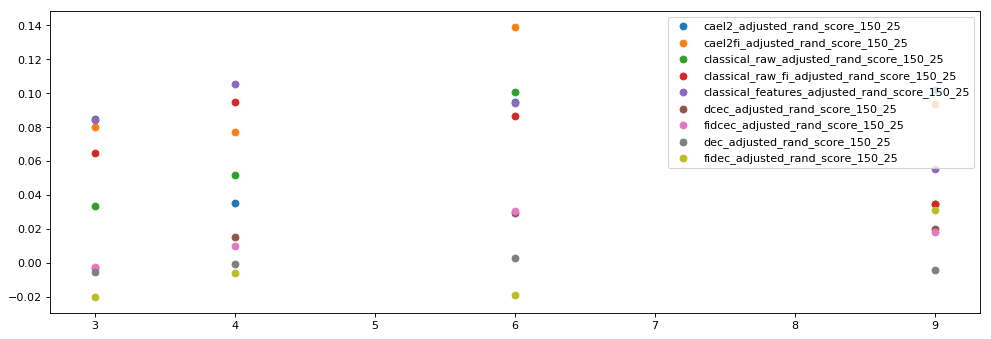

adjusted_rand_score_150_75


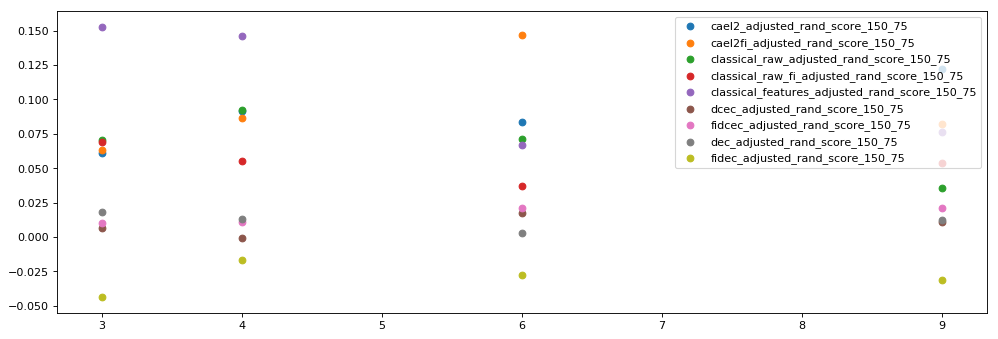

adjusted_rand_score_300_25


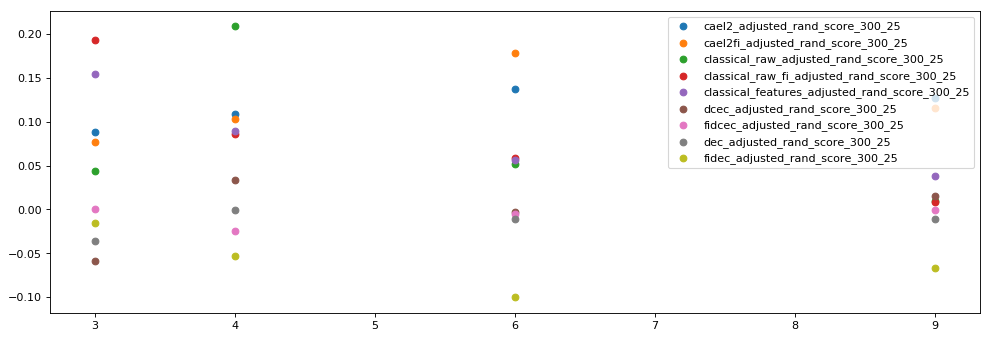

adjusted_rand_score_300_75


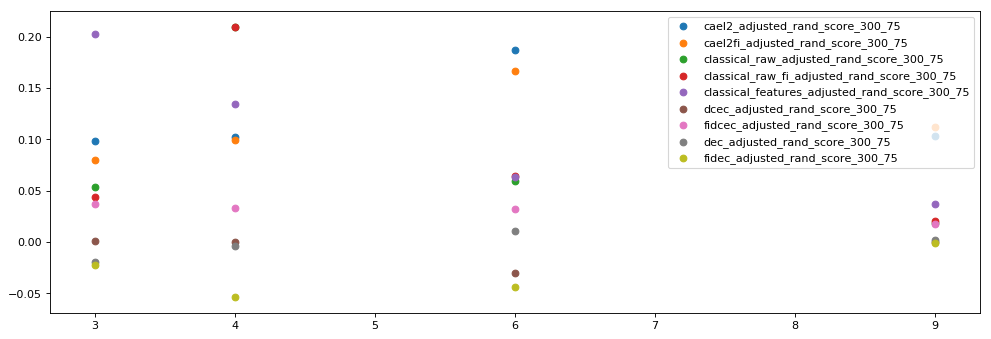

adjusted_rand_score_300_150


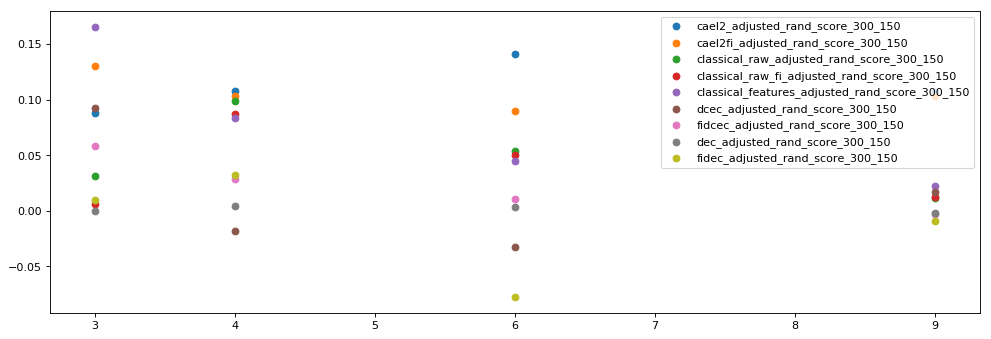

In [85]:
plot_scores(score_keys_filter, window_lengths, sub_sample_lengths, scores)

---- classical_raw_fi ----
SensorAccelerationX_HD


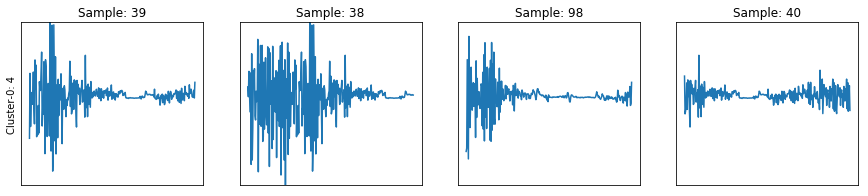

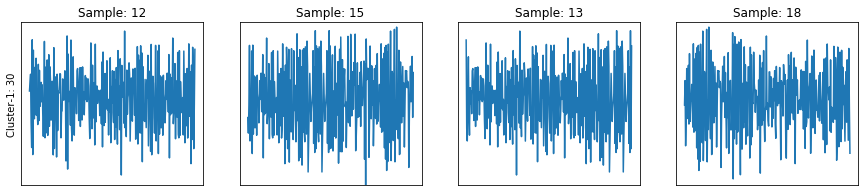

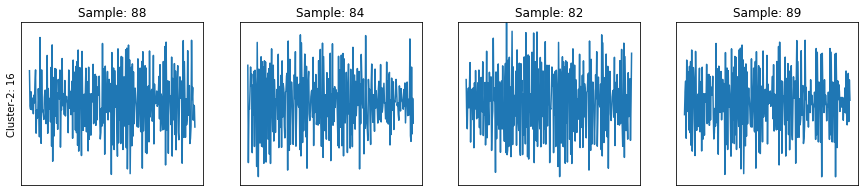

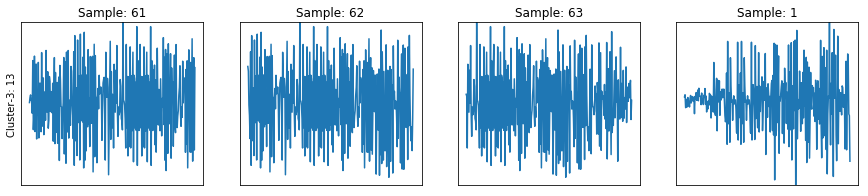

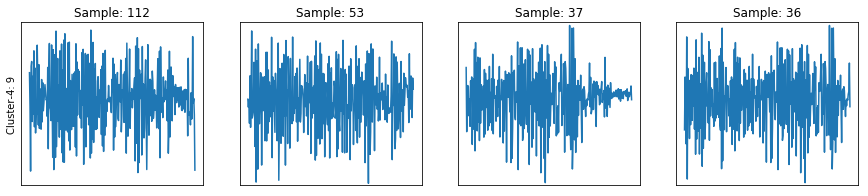

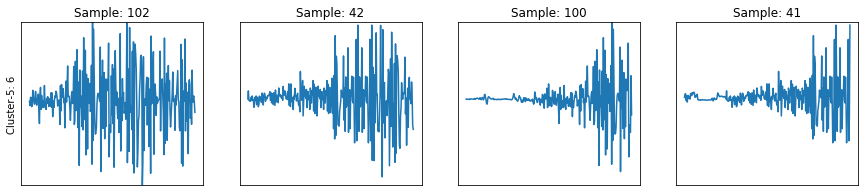

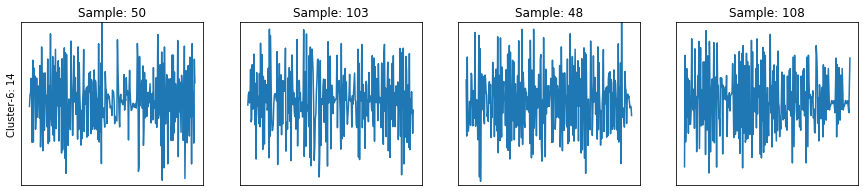

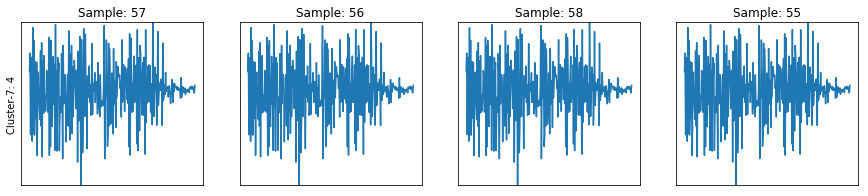

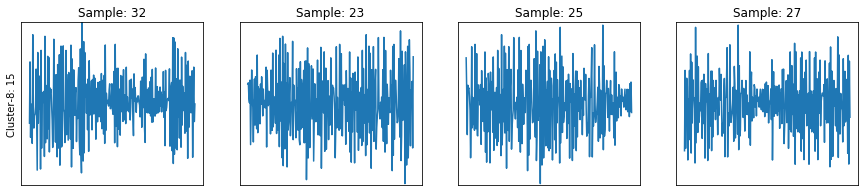

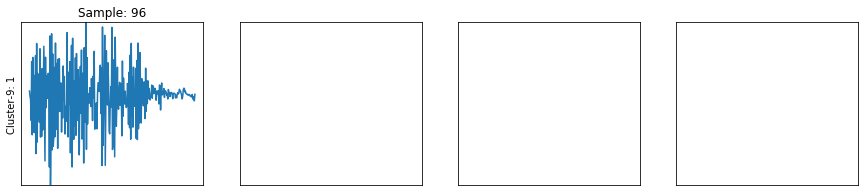

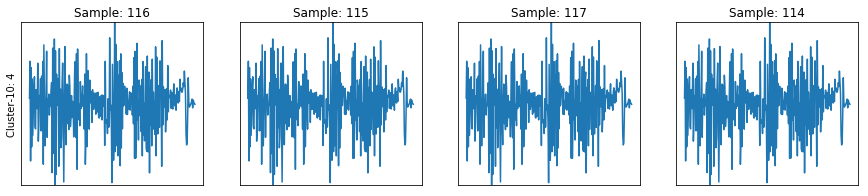

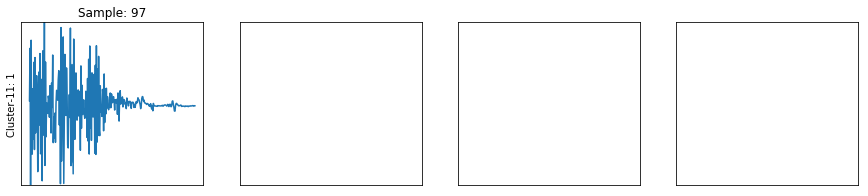

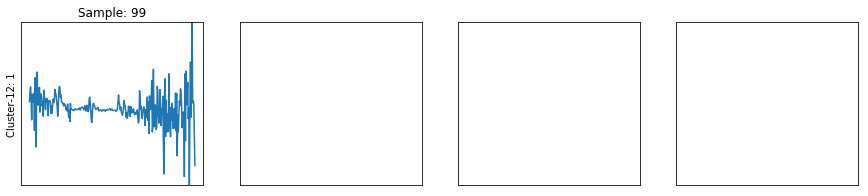

SensorAccelerationY_HD


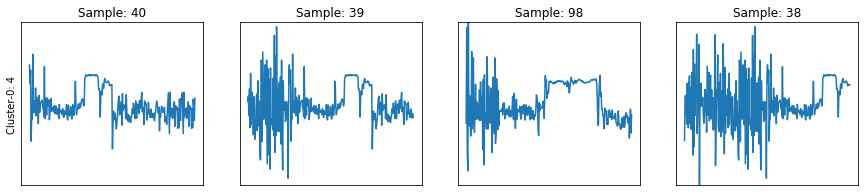

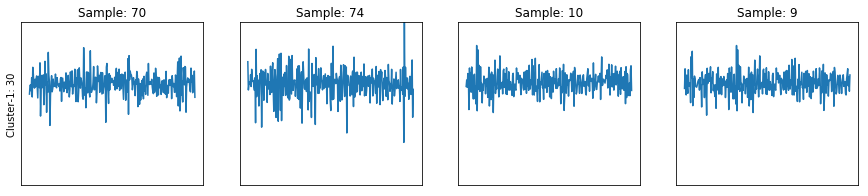

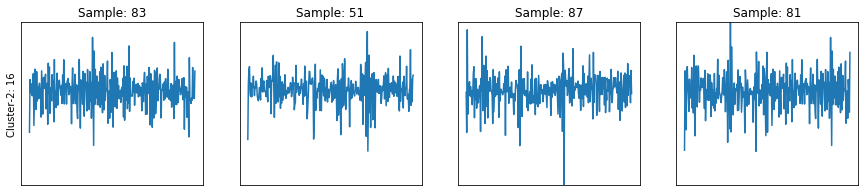

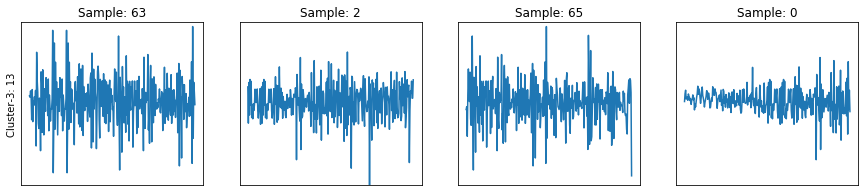

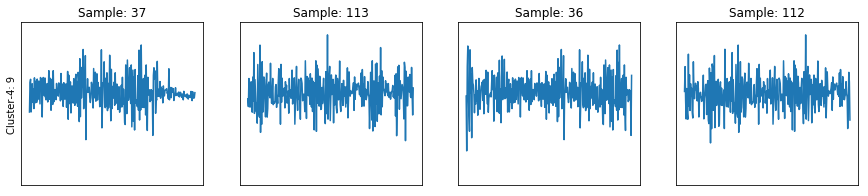

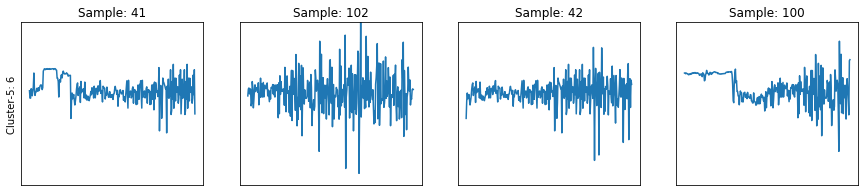

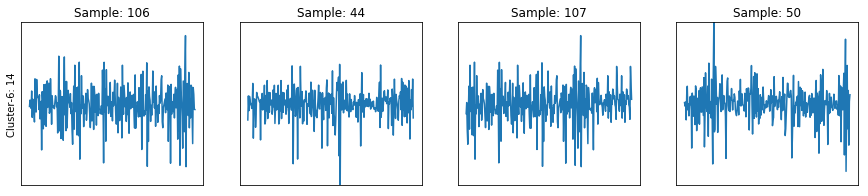

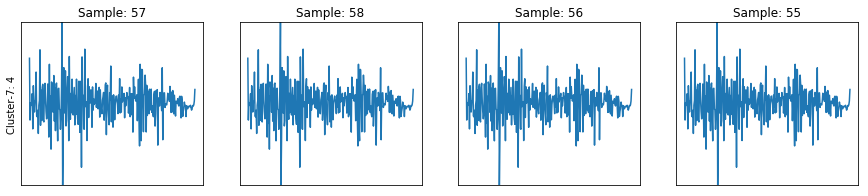

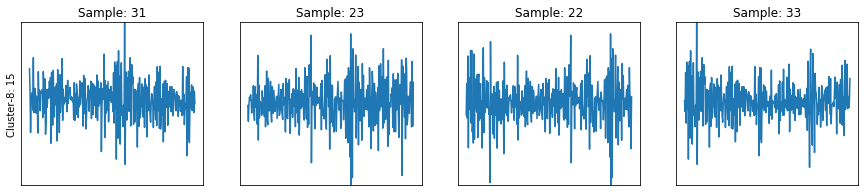

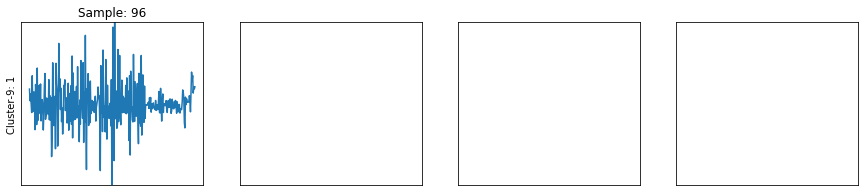

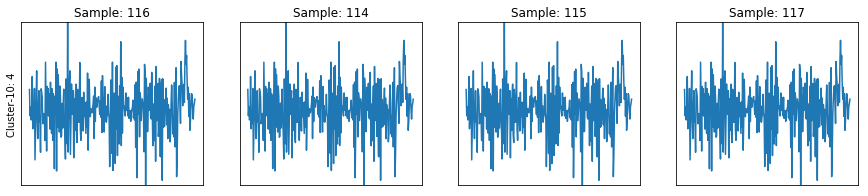

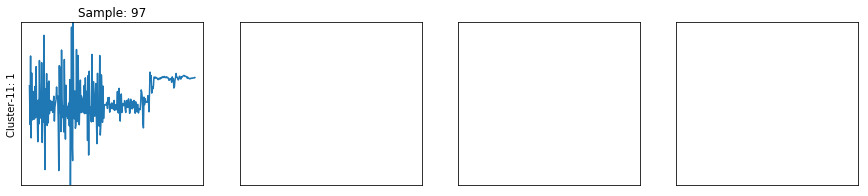

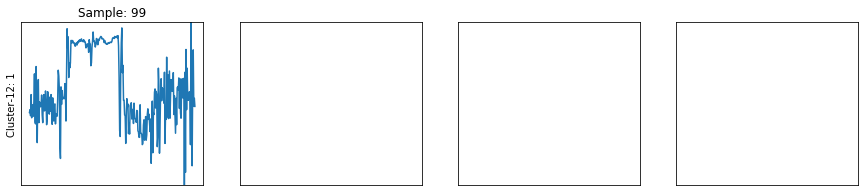

SensorAccelerationZ_HD


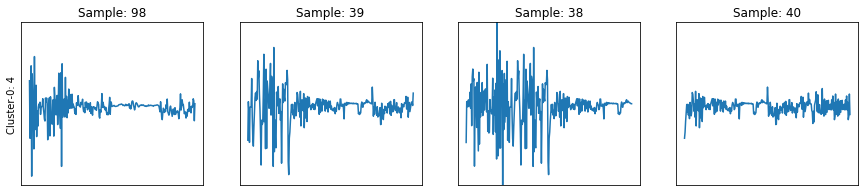

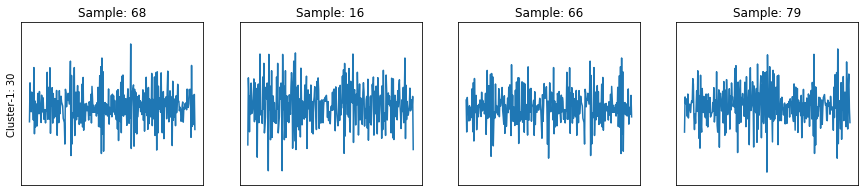

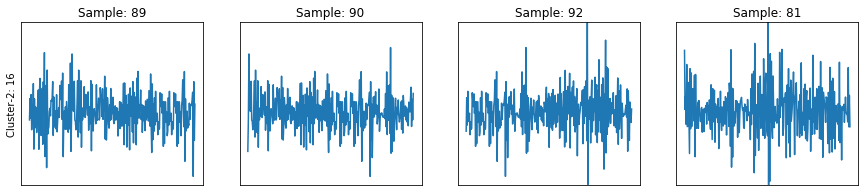

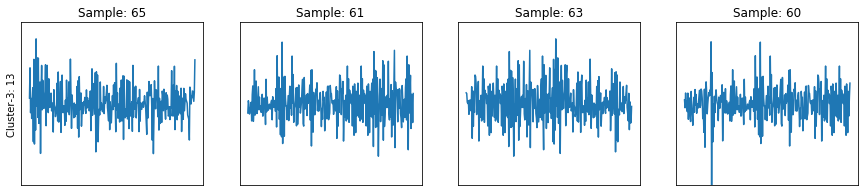

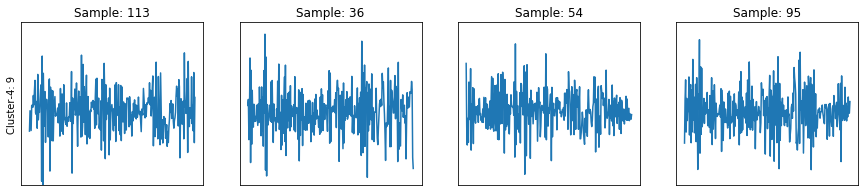

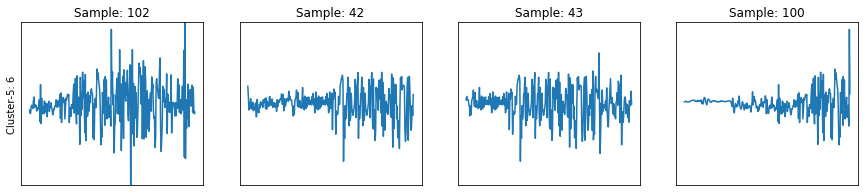

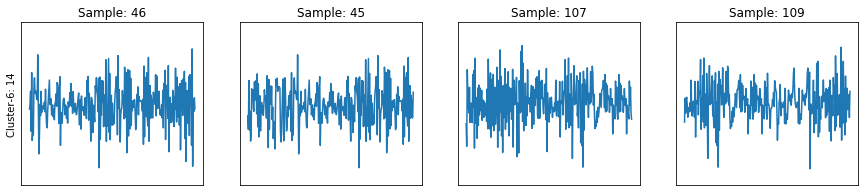

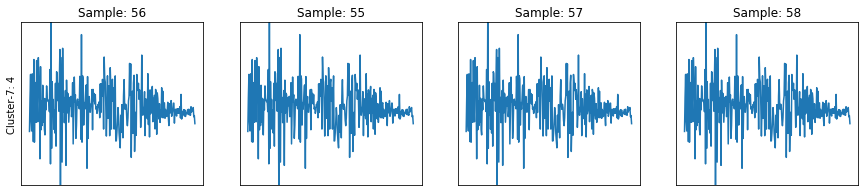

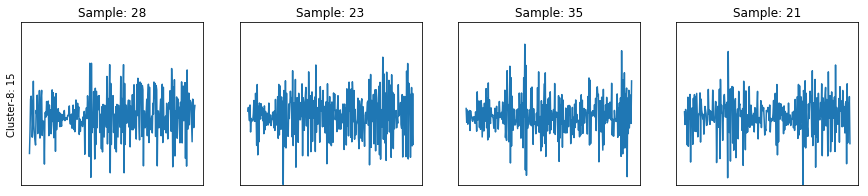

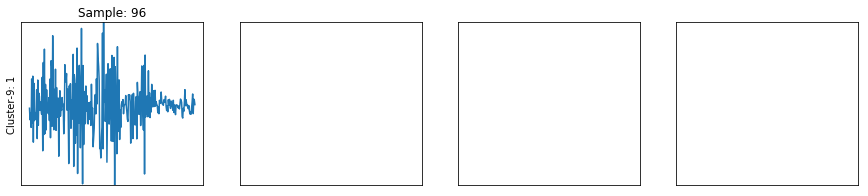

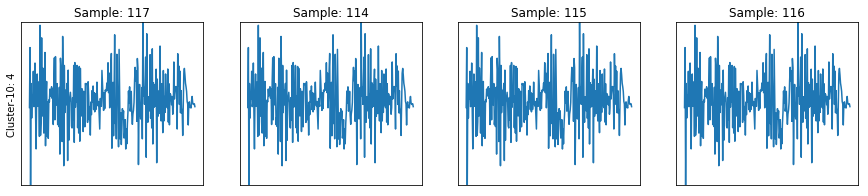

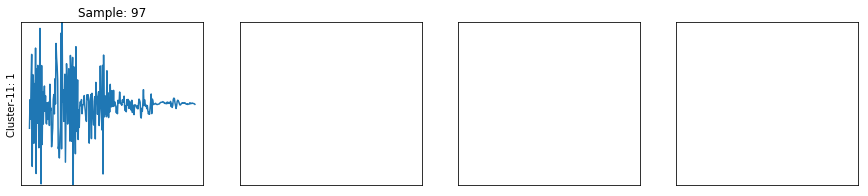

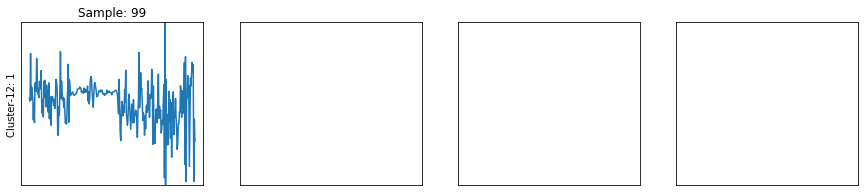

altitude


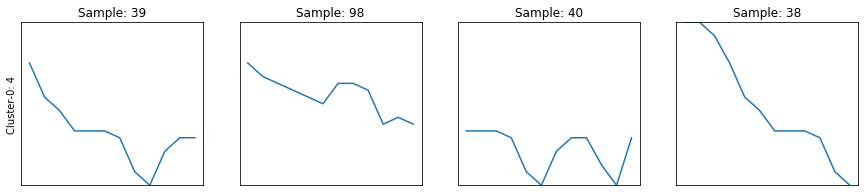

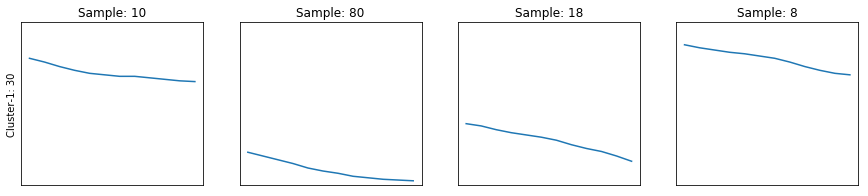

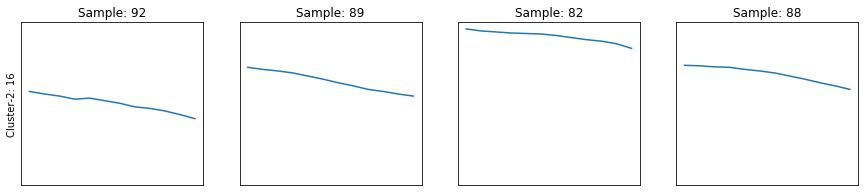

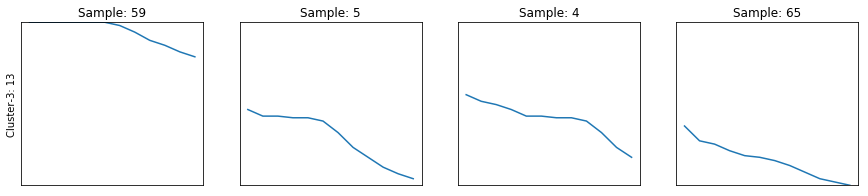

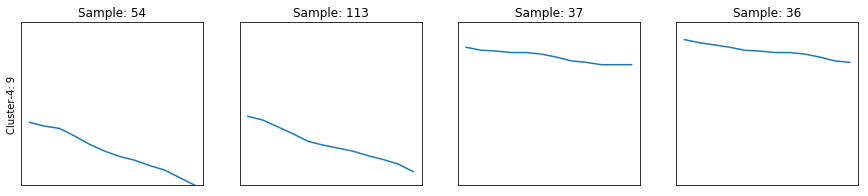

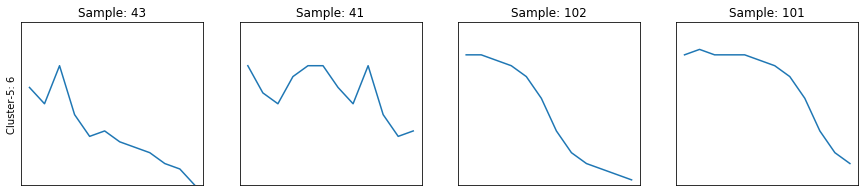

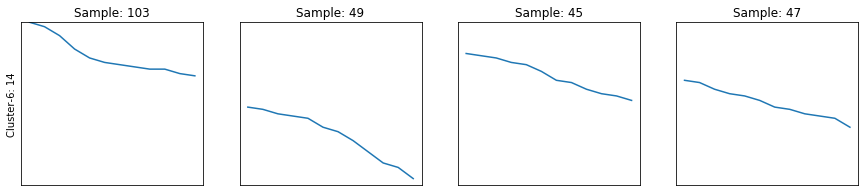

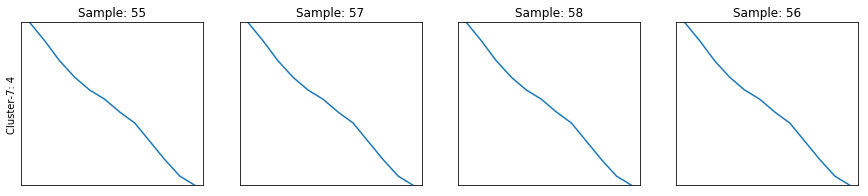

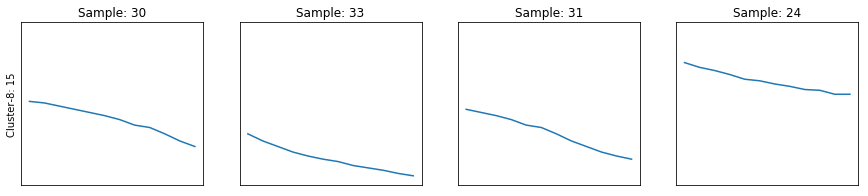

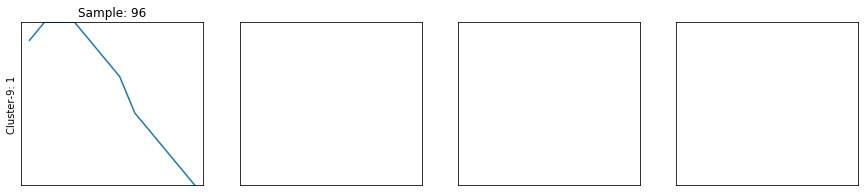

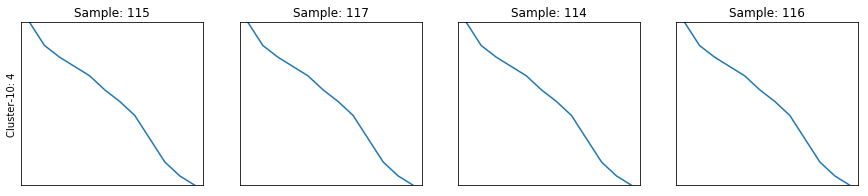

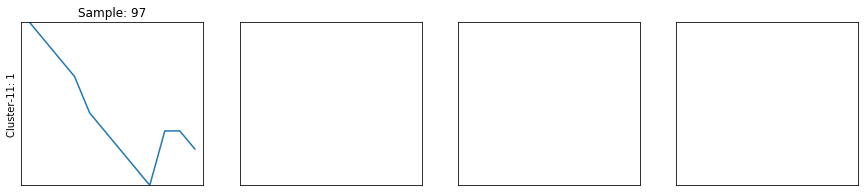

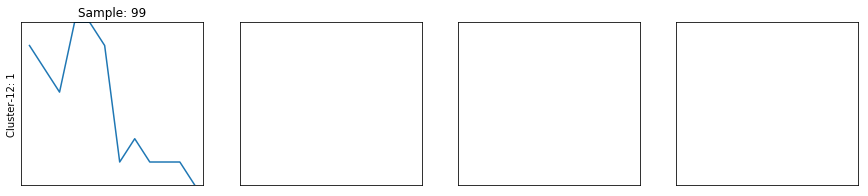

speed


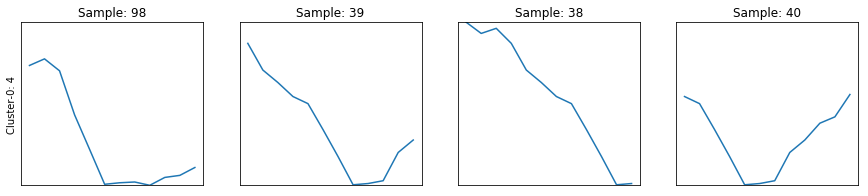

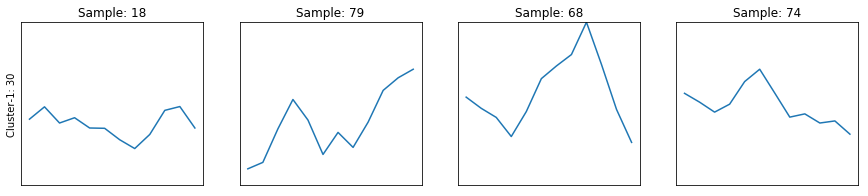

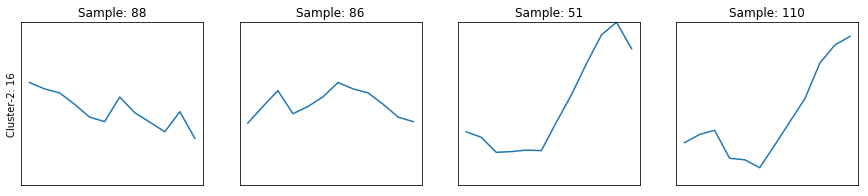

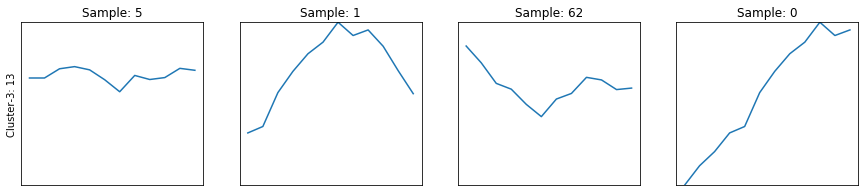

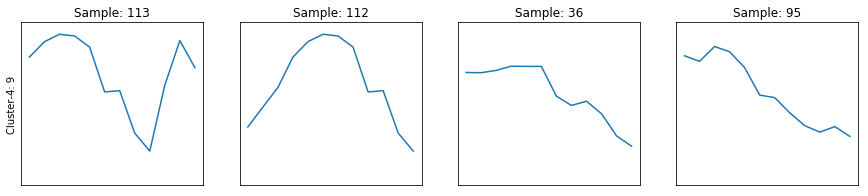

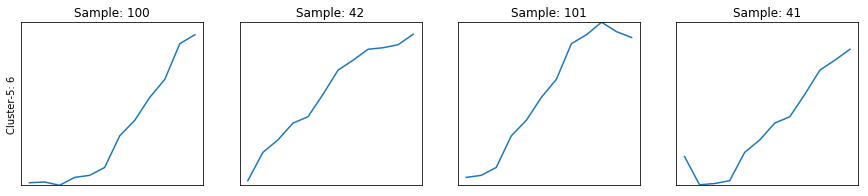

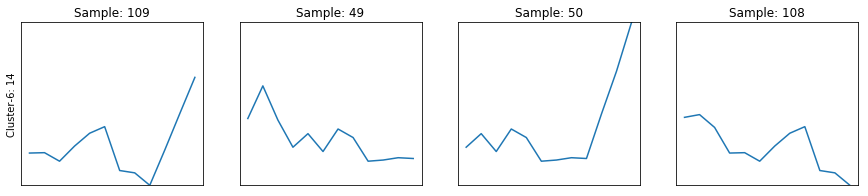

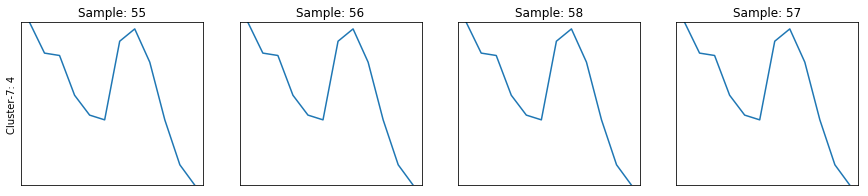

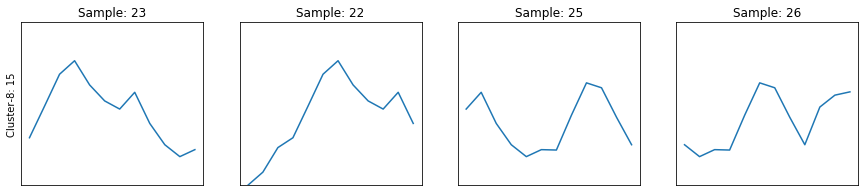

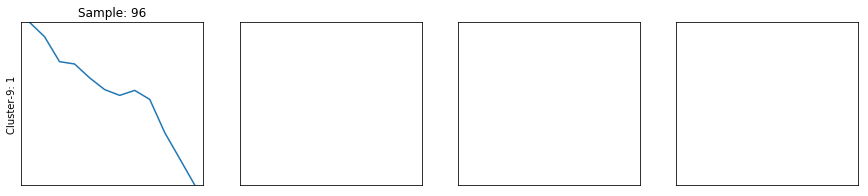

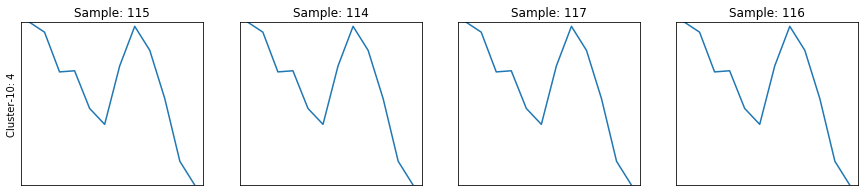

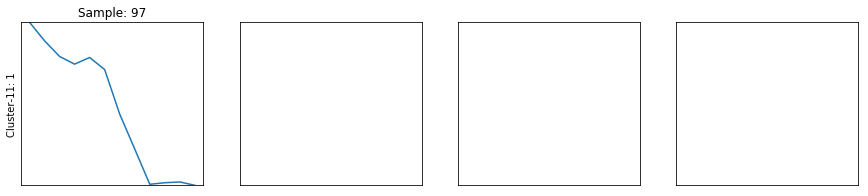

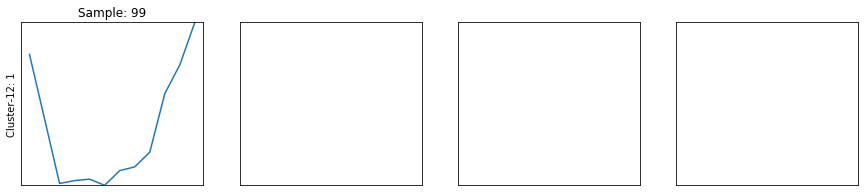

heart_rate


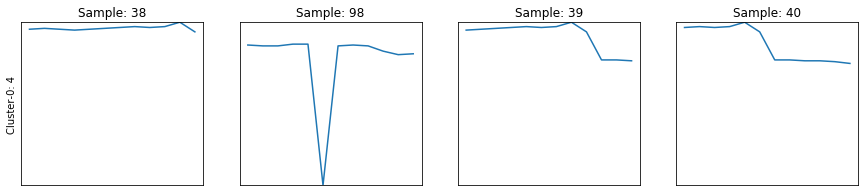

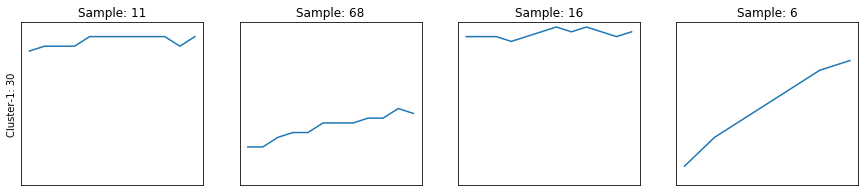

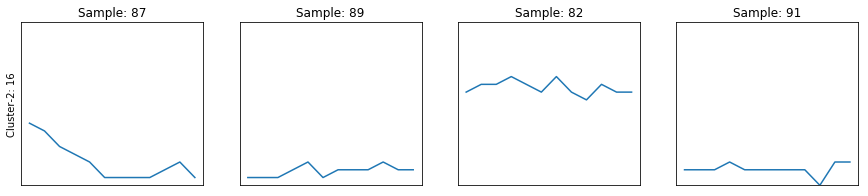

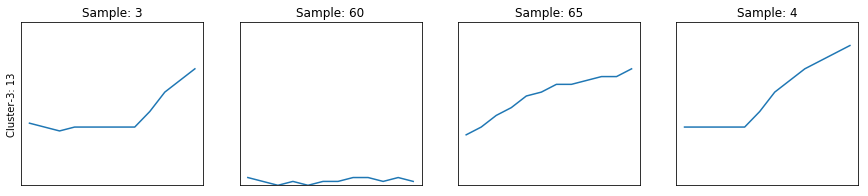

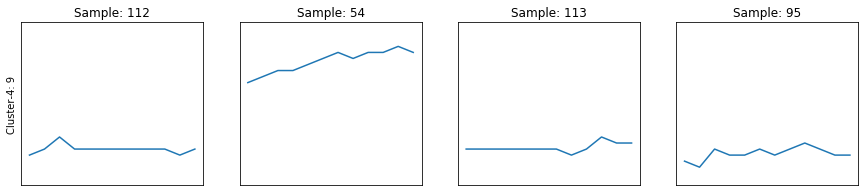

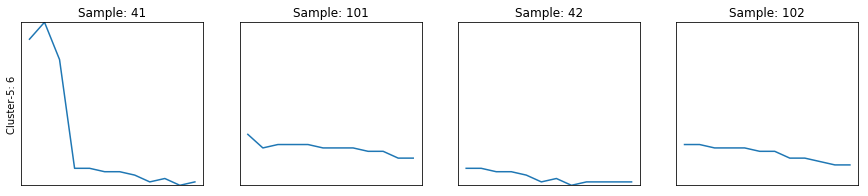

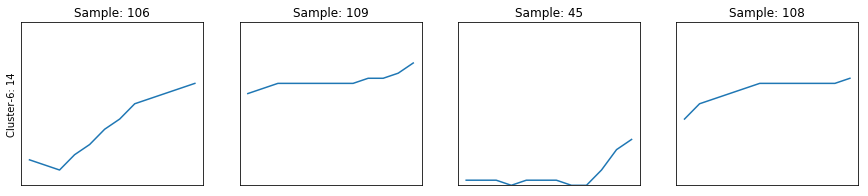

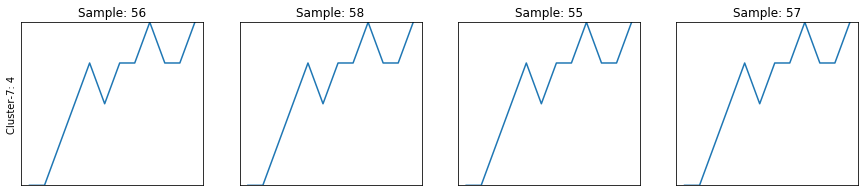

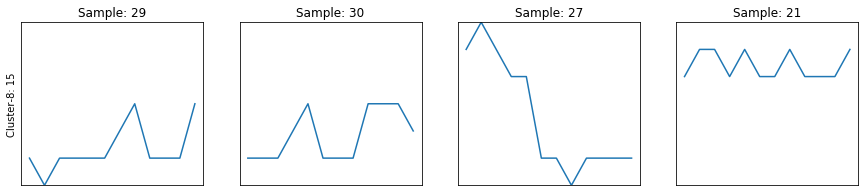

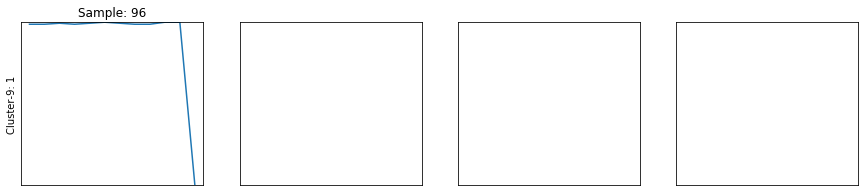

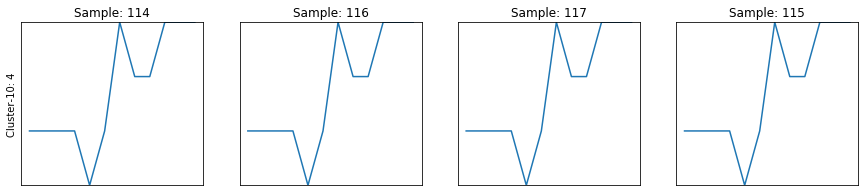

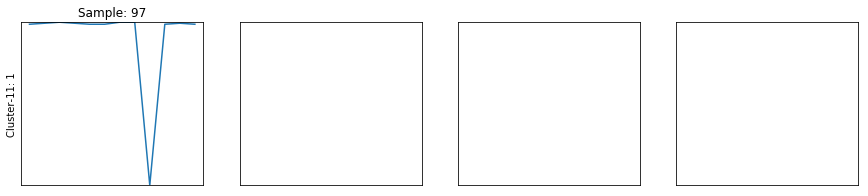

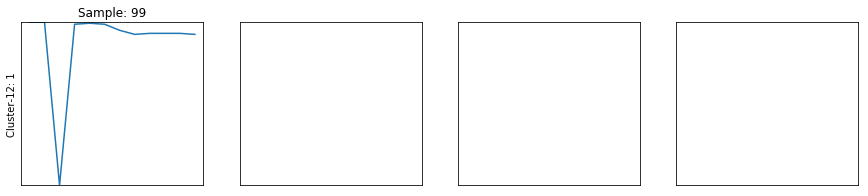

In [86]:
plot_random_samples(prefix, 'classical_raw_fi', 300, 150, 13)
# TODO: Write labels as text next to the plot